# **MIT License**
Copyright (c) 2023 Hemanth Saragadam

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# **Abstract:**
This dataset about olympics medals scored by the varius countries and sorted with various seasons and the total medal tally






# **Aim:**
In this assignment we aim to create a complete ML project with



*   Checking Data Quality
*   Feature Selection


*   Modeling - Training Models , Selecting Best Model ,Hyperparameter Tuning
*   Model Interpretibility





*   Reports and Visualizations






# **What question are you trying to answer? How did you frame it as an ML task?**
Here I am trying to predict the total number of medals scored by each country in the olympics.The medal tally consists of all the medals scored by the countries in each season like summer, winter , total and each category i.e gold, silver , bronze 


# **What is human-level performance on that task? What level of performance is needed?**
The human level tests on the data set are manually calculating each of the medals tally data and to verify it with the data we need excel data

In [92]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install fitter

import csv
import json
import logging
import optparse
import os
import random
import sys
import time
from datetime import datetime
from distutils.util import strtobool

# Importing all the libararies required for the assignment
import h2o
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psutil
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
from matplotlib.pyplot import figure

sns.set(rc={"figure.figsize": (16, 8)})

# Data Imputation
!pip install fancyimpute
from fancyimpute import IterativeImputer as MICE

# Model Interpretation
!pip install shap
import shap
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importing Data set**

In [93]:
from google.colab import files
uploaded = files.upload()

Saving olympics_medals_country_wise 2.csv to olympics_medals_country_wise 2 (1).csv


In [94]:
import io
medals_df_pandas = pd.read_csv(io.StringIO(uploaded['olympics_medals_country_wise 2.csv'].decode('utf-8')))

In [95]:
medals_df_pandas.head()
medals_df_pandas = medals_df_pandas.drop(["countries ","ioc_code "], axis=1)

# **Exploratory Data Analysis**


In [96]:
medals_df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   summer_participations  156 non-null    int64 
 1   summer_gold            156 non-null    object
 2   summer_silver          156 non-null    int64 
 3   summer_bronze          156 non-null    int64 
 4   summer_total           156 non-null    object
 5   winter_participations  156 non-null    int64 
 6   winter_gold            156 non-null    int64 
 7   winter_silver          156 non-null    int64 
 8   winter_bronze          156 non-null    int64 
 9   winter_total           156 non-null    int64 
 10  total_participation    156 non-null    int64 
 11  total_gold             156 non-null    object
 12  total_silver           156 non-null    int64 
 13  total_bronze           156 non-null    int64 
 14  total_total            156 non-null    object
dtypes: int64(11), object(4)

In [97]:
medals_df_pandas['summer_participations']= medals_df_pandas['summer_participations'].astype("category").cat.codes
medals_df_pandas['winter_participations'] = medals_df_pandas['winter_participations'].astype("category").cat.codes
medals_df_pandas['total_participation'] = medals_df_pandas['total_participation'].astype("category").cat.codes
medals_df_pandas['summer_gold'] = medals_df_pandas['summer_gold'].astype("category").cat.codes
medals_df_pandas['summer_total'] = medals_df_pandas['summer_total'].astype("category").cat.codes
medals_df_pandas['total_gold'] = medals_df_pandas['total_gold'].astype("category").cat.codes
medals_df_pandas['total_total '] = medals_df_pandas['total_total '].astype("category").cat.codes


In [98]:
medals_df_pandas.isnull().sum()

summer_participations    0
summer_gold              0
summer_silver            0
summer_bronze            0
summer_total             0
winter_participations    0
winter_gold              0
winter_silver            0
winter_bronze            0
winter_total             0
total_participation      0
total_gold               0
total_silver             0
total_bronze             0
total_total              0
dtype: int64

In [99]:
# Shape of the dataframe - Here, we have 1143 samples of data with 12 predictors and 1 result
medals_df_pandas.shape

(156, 15)

In [100]:
columns = list(medals_df_pandas.columns)
print(columns)  # Name of all predictors and result

['summer_participations', 'summer_gold', 'summer_silver', 'summer_bronze', 'summer_total', 'winter_participations', 'winter_gold', 'winter_silver', 'winter_bronze', 'winter_total', 'total_participation', 'total_gold', 'total_silver', 'total_bronze', 'total_total ']


Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 12.29it/s]


          sumsquare_error         aic         bic  kl_div  ks_statistic  \
chi2             0.457091  718.853535 -894.756162     inf      0.068354   
lognorm          0.457153  718.841240 -894.734821     inf      0.068901   
gamma            0.457195  718.582700 -894.720527     inf      0.068595   
norm             0.457800  716.043894 -899.564328     inf      0.067779   
rayleigh         0.458429  710.471165 -899.350106     inf      0.103666   

          ks_pvalue  
chi2       0.440206  
lognorm    0.430169  
gamma      0.435760  
norm       0.450880  
rayleigh   0.065066  


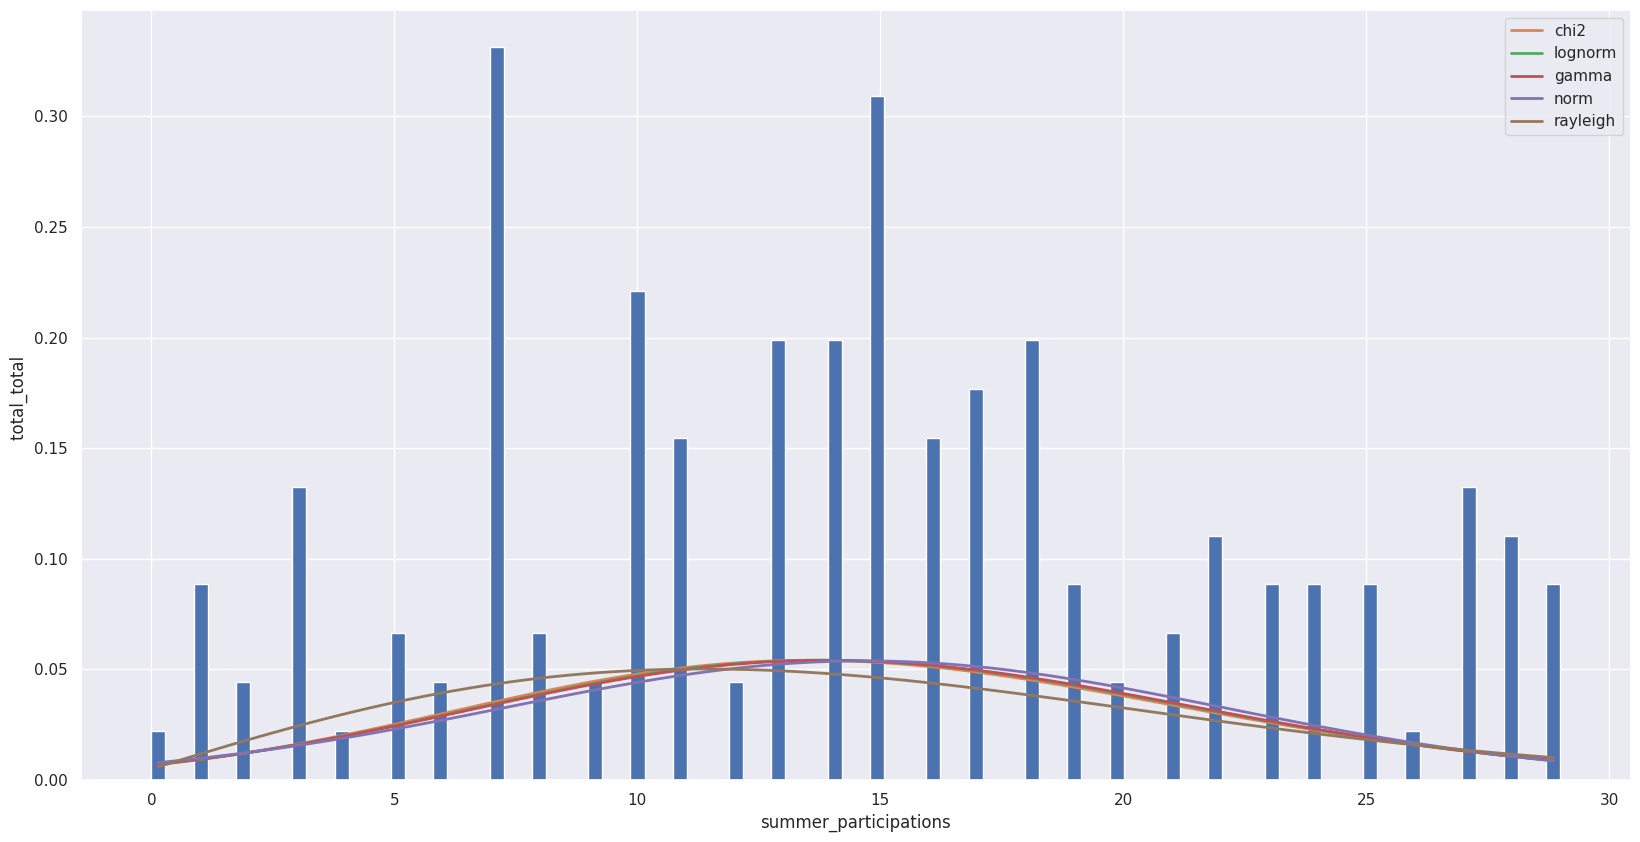

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 12.13it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
chi2             0.172309  1865.105098 -1046.948604     inf      0.470974   
lognorm          0.176371  1155.479945 -1043.313503     inf      0.327194   
exponpow         0.208597   947.707752 -1017.134592     inf      0.275641   
gamma            0.217086  1070.829947 -1010.912051     inf      0.336084   
expon            0.328409   882.009588  -951.383195     inf      0.328169   

             ks_pvalue  
chi2      2.871216e-32  
lognorm   2.252604e-15  
exponpow  5.733708e-11  
gamma     3.230775e-16  
expon     1.825603e-15  


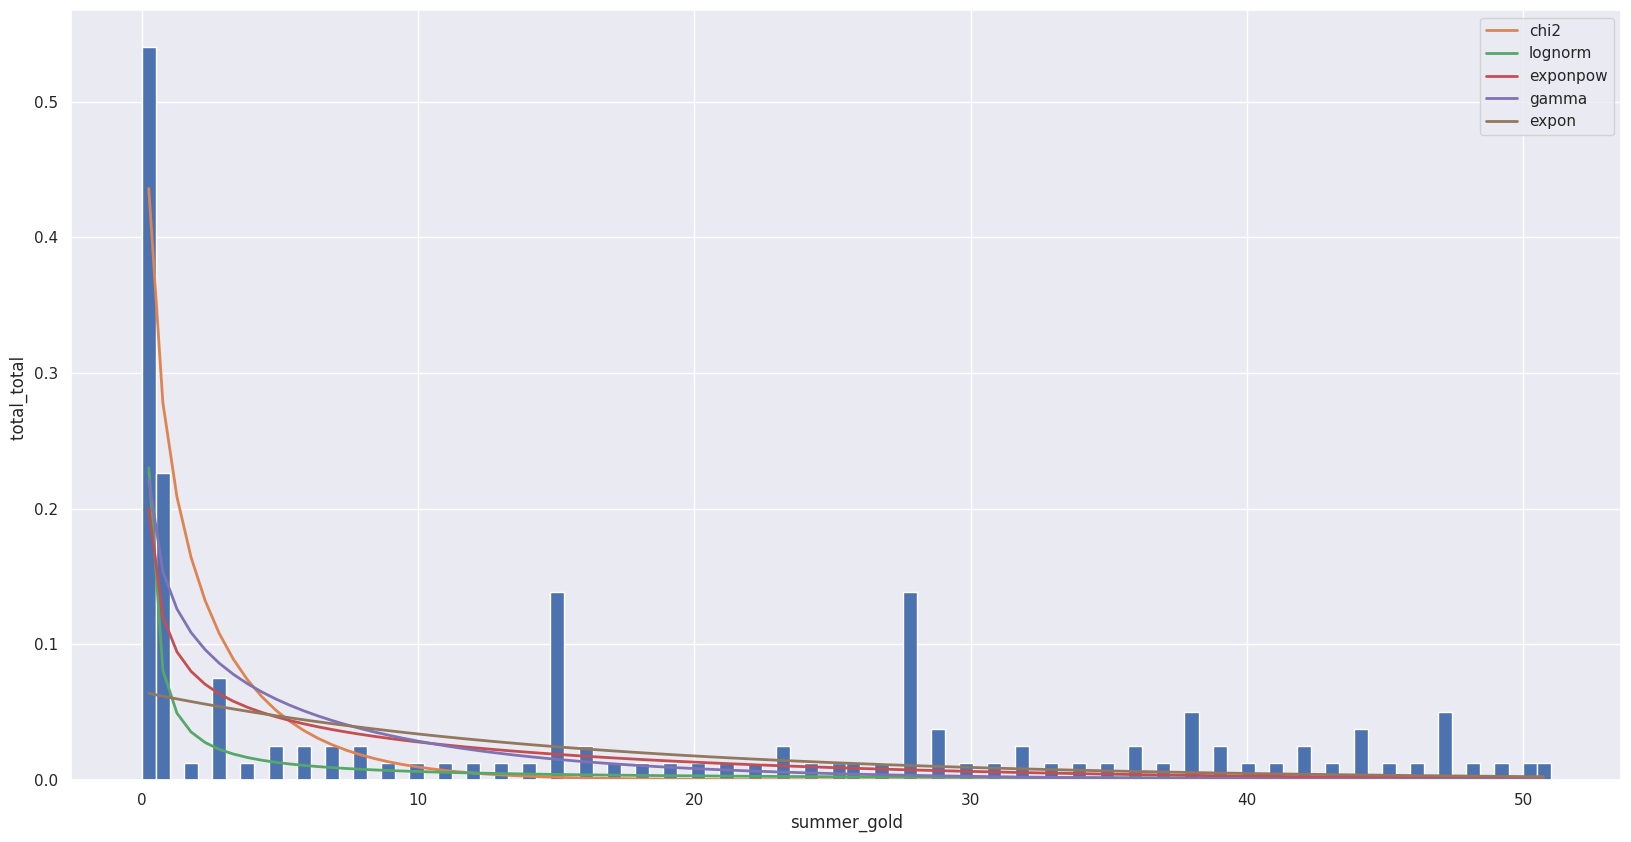

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  9.36it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
cauchy           0.000076  2241.255052 -2256.816080     inf      0.328949   
expon            0.002367  3102.983585 -1720.899329     inf      0.391743   
exponpow         0.002796  1604.898842 -1689.829996     inf      0.243937   
chi2             0.003327  1617.425423 -1662.719189     inf      0.504024   
lognorm          0.004142  1858.082520 -1628.525602     inf      0.380927   

             ks_pvalue  
cauchy    1.542266e-15  
expon     4.427659e-22  
exponpow  1.169305e-08  
chi2      3.255808e-37  
lognorm   7.342176e-21  


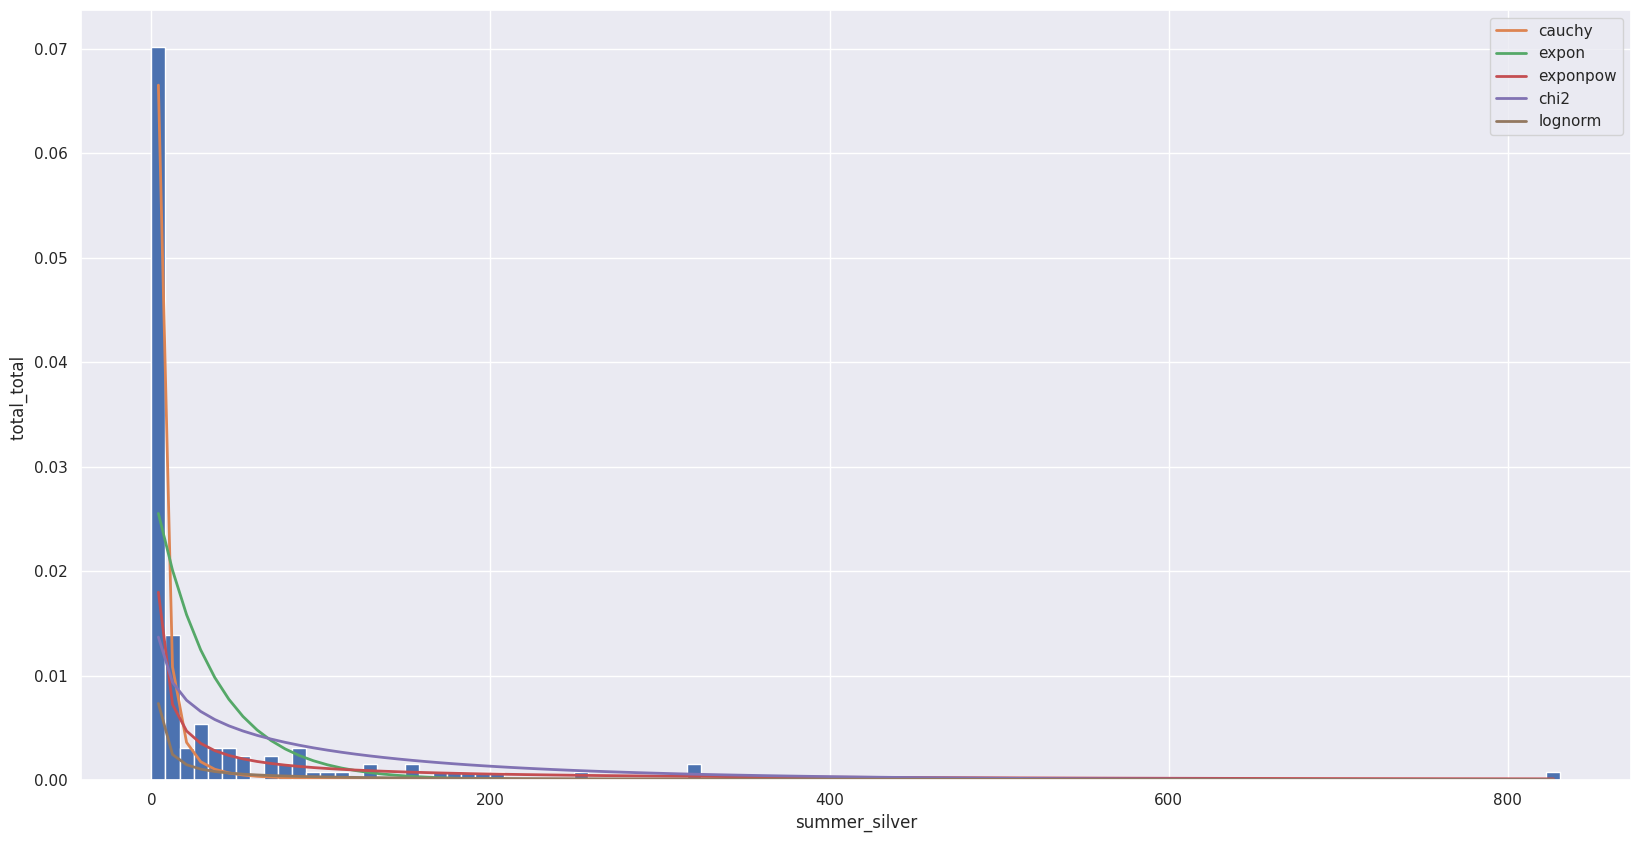

Fitting 10 distributions: 100%|██████████| 10/10 [00:02<00:00,  4.78it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
cauchy           0.000277  2126.966603 -2055.473662     inf      0.337626   
expon            0.002357  2683.972807 -1721.536072     inf      0.367474   
exponpow         0.002513  1587.784464 -1706.488644     inf      0.213402   
chi2             0.003147  1565.171943 -1671.373885     inf      0.439263   
lognorm          0.003924  1808.398603 -1636.957682     inf      0.414579   

             ks_pvalue  
cauchy    2.292924e-16  
expon     2.128712e-19  
exponpow  1.029637e-06  
chi2      6.428453e-28  
lognorm   8.705077e-25  


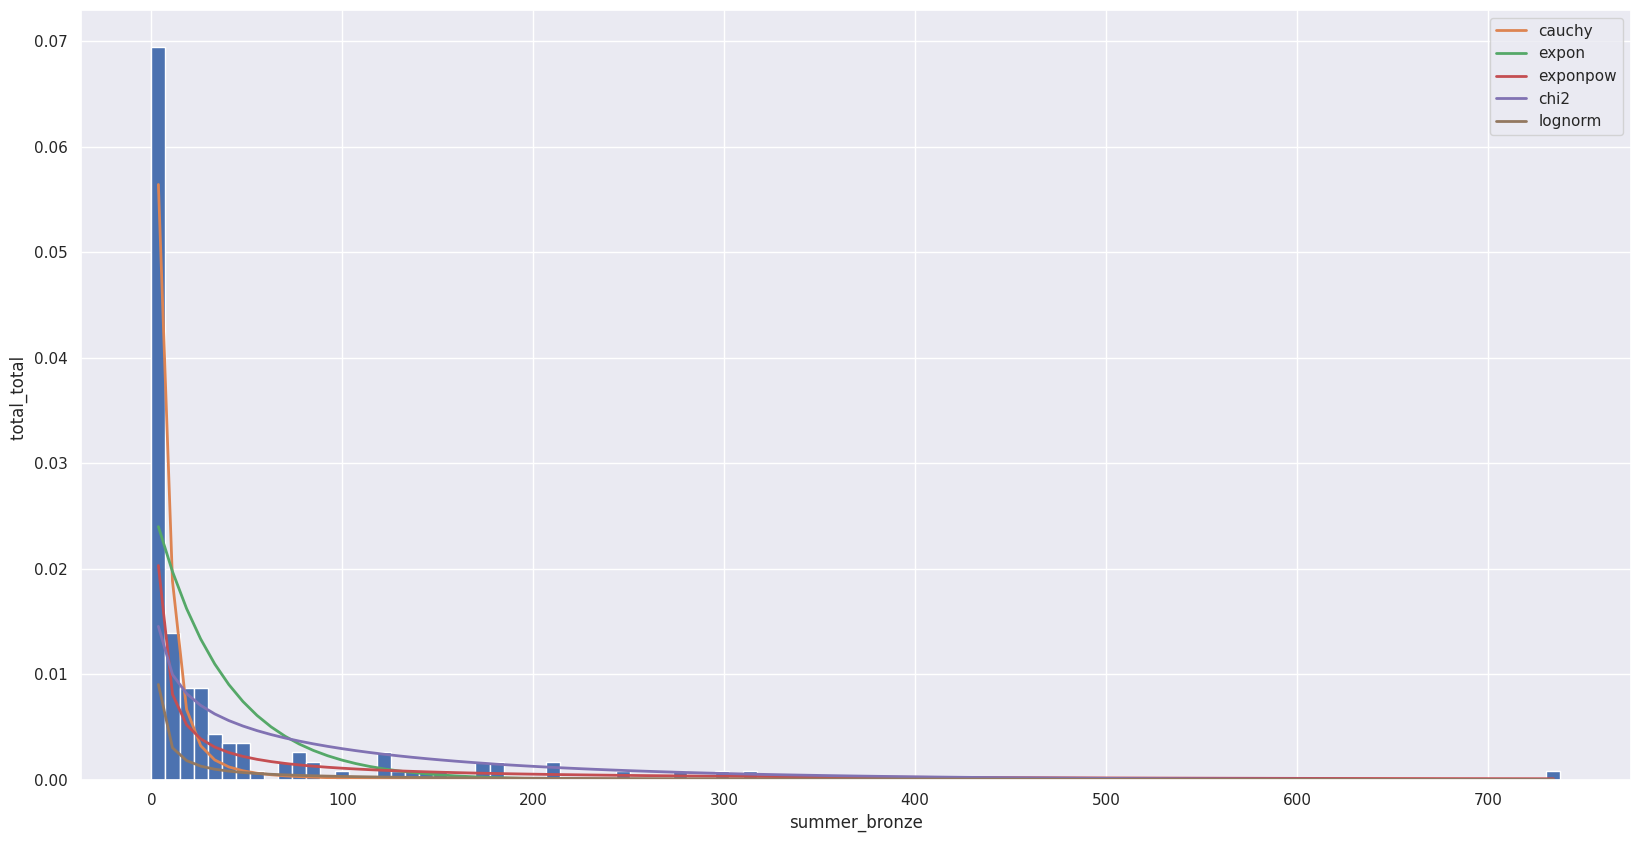

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  6.03it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
uniform          0.043581  887.768122 -1266.446416     inf      0.130522   
expon            0.043894  951.501026 -1265.330428     inf      0.176394   
rayleigh         0.045303  924.704137 -1260.402663     inf      0.103031   
gamma            0.045479  931.211659 -1254.746536     inf      0.079850   
norm             0.045480  928.704050 -1259.793659     inf      0.091181   

          ks_pvalue  
uniform    0.008896  
expon      0.000102  
rayleigh   0.067824  
gamma      0.258835  
norm       0.140414  


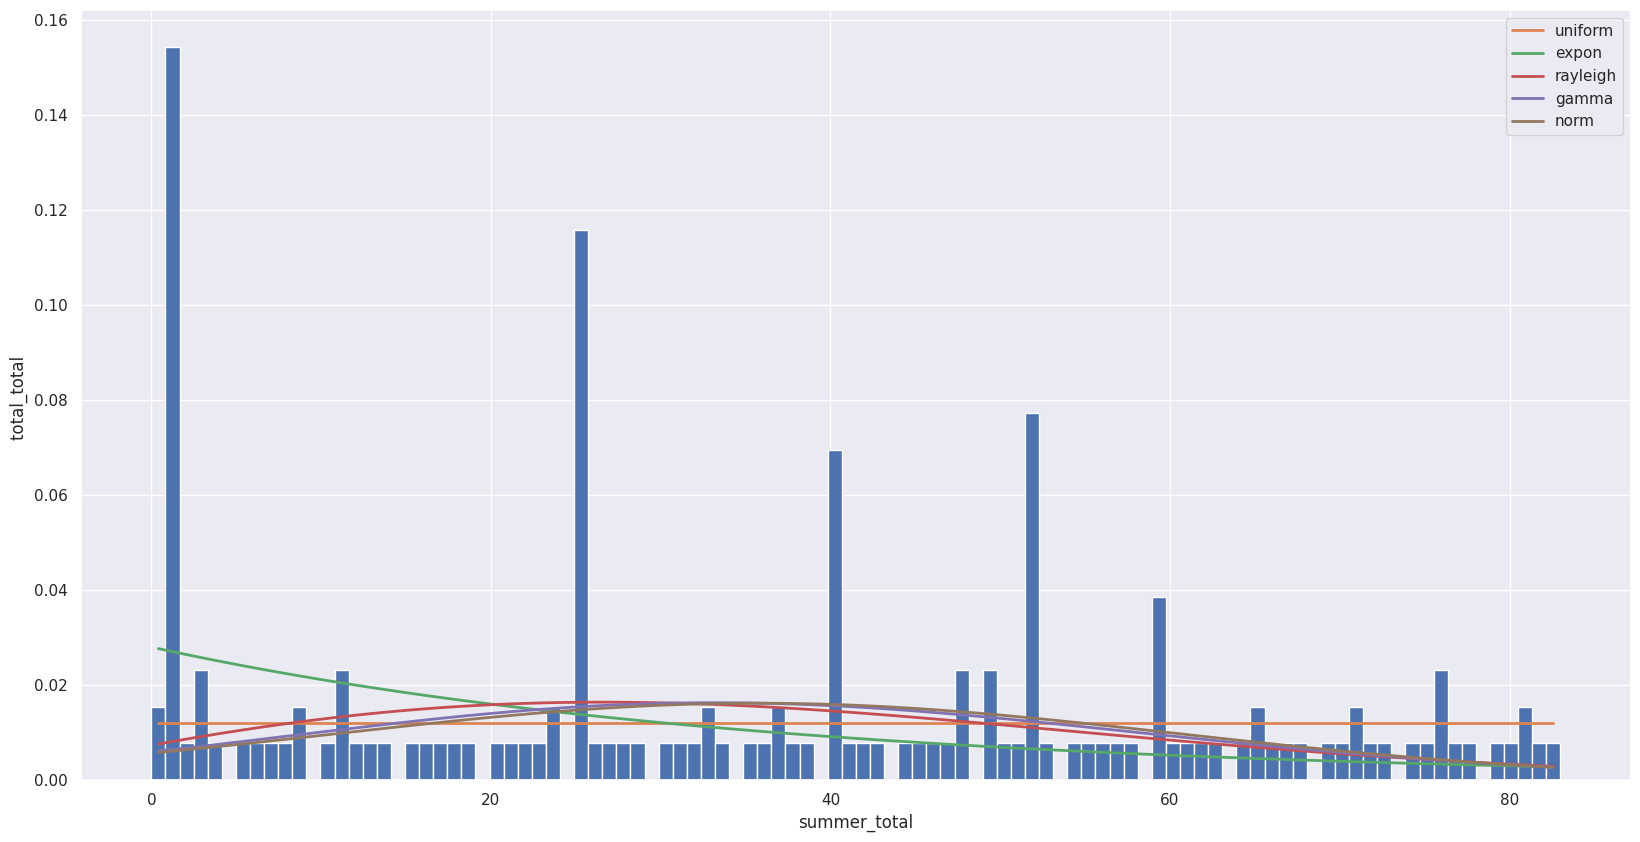

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  7.28it/s]


          sumsquare_error          aic         bic  kl_div  ks_statistic  \
gamma            0.950511  1068.689937 -780.545805     inf      0.434646   
exponpow         1.044478   833.473216 -765.839352     inf      0.275641   
chi2             1.329298  1012.877328 -728.222468     inf      0.381922   
lognorm          1.629797  1162.455410 -696.428955     inf      0.434897   
expon            1.793681   717.649677 -686.531679     inf      0.275641   

             ks_pvalue  
gamma     2.573333e-27  
exponpow  5.733711e-11  
chi2      5.691558e-21  
lognorm   2.388057e-27  
expon     5.733708e-11  


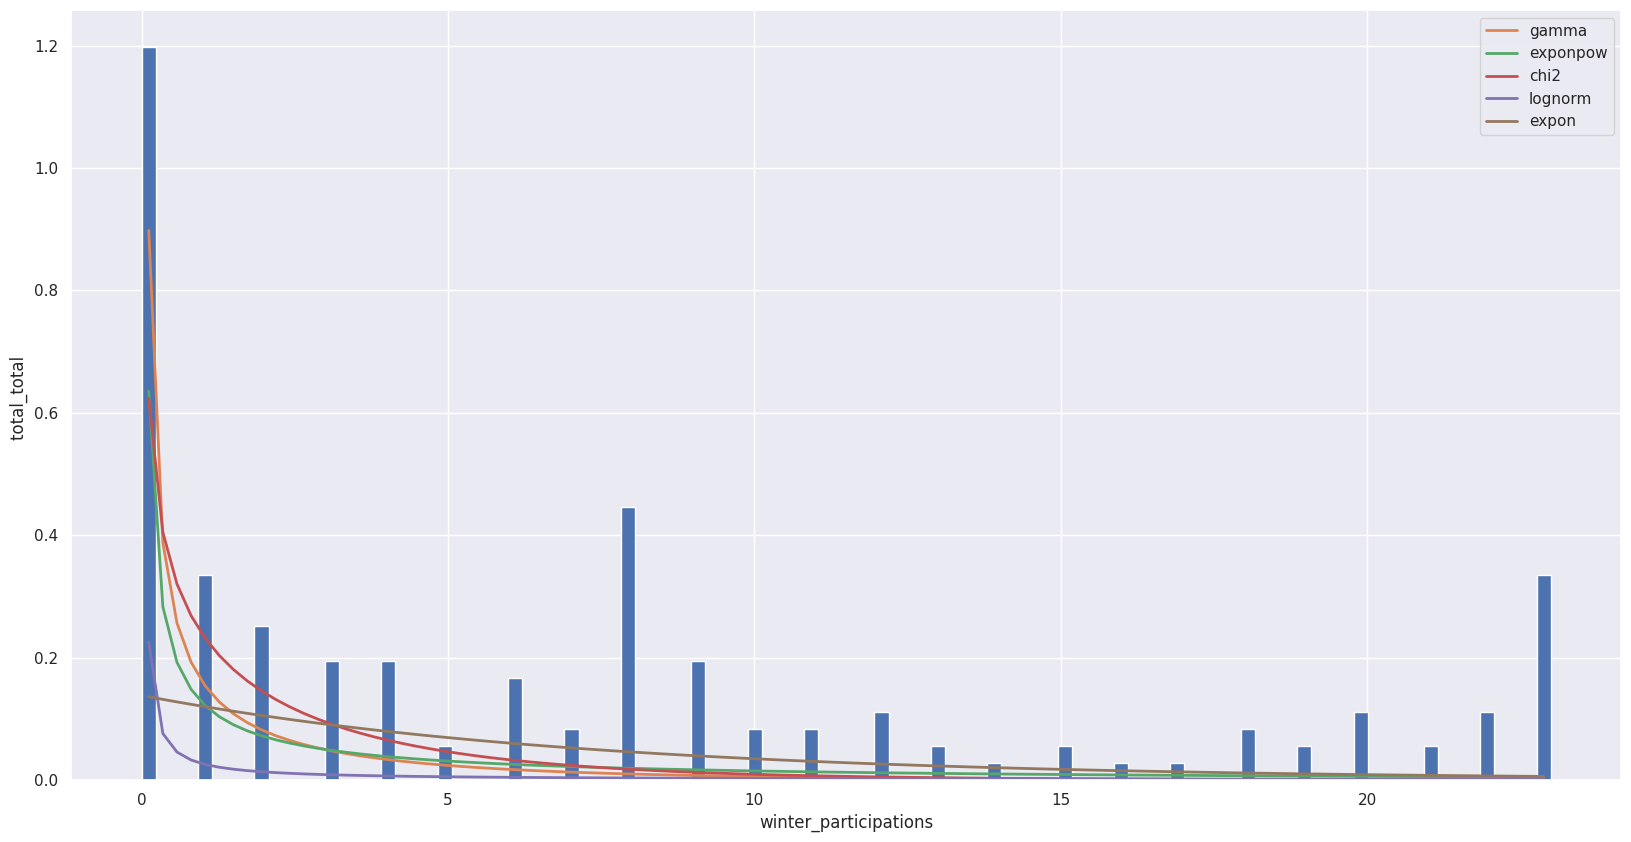

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  5.80it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma            0.172753  1237.071196 -1046.546785     inf      0.730769   
expon            0.175572  2378.799635 -1049.072331     inf      0.730769   
lognorm          0.205881  1457.167911 -1019.179465     inf      0.730769   
chi2             0.214118  1170.047577 -1013.059380     inf      0.730769   
exponpow         0.220219  1485.800284 -1008.676444     inf      0.721043   

             ks_pvalue  
gamma     1.387502e-85  
expon     1.387502e-85  
lognorm   1.387630e-85  
chi2      1.387502e-85  
exponpow  7.854994e-83  


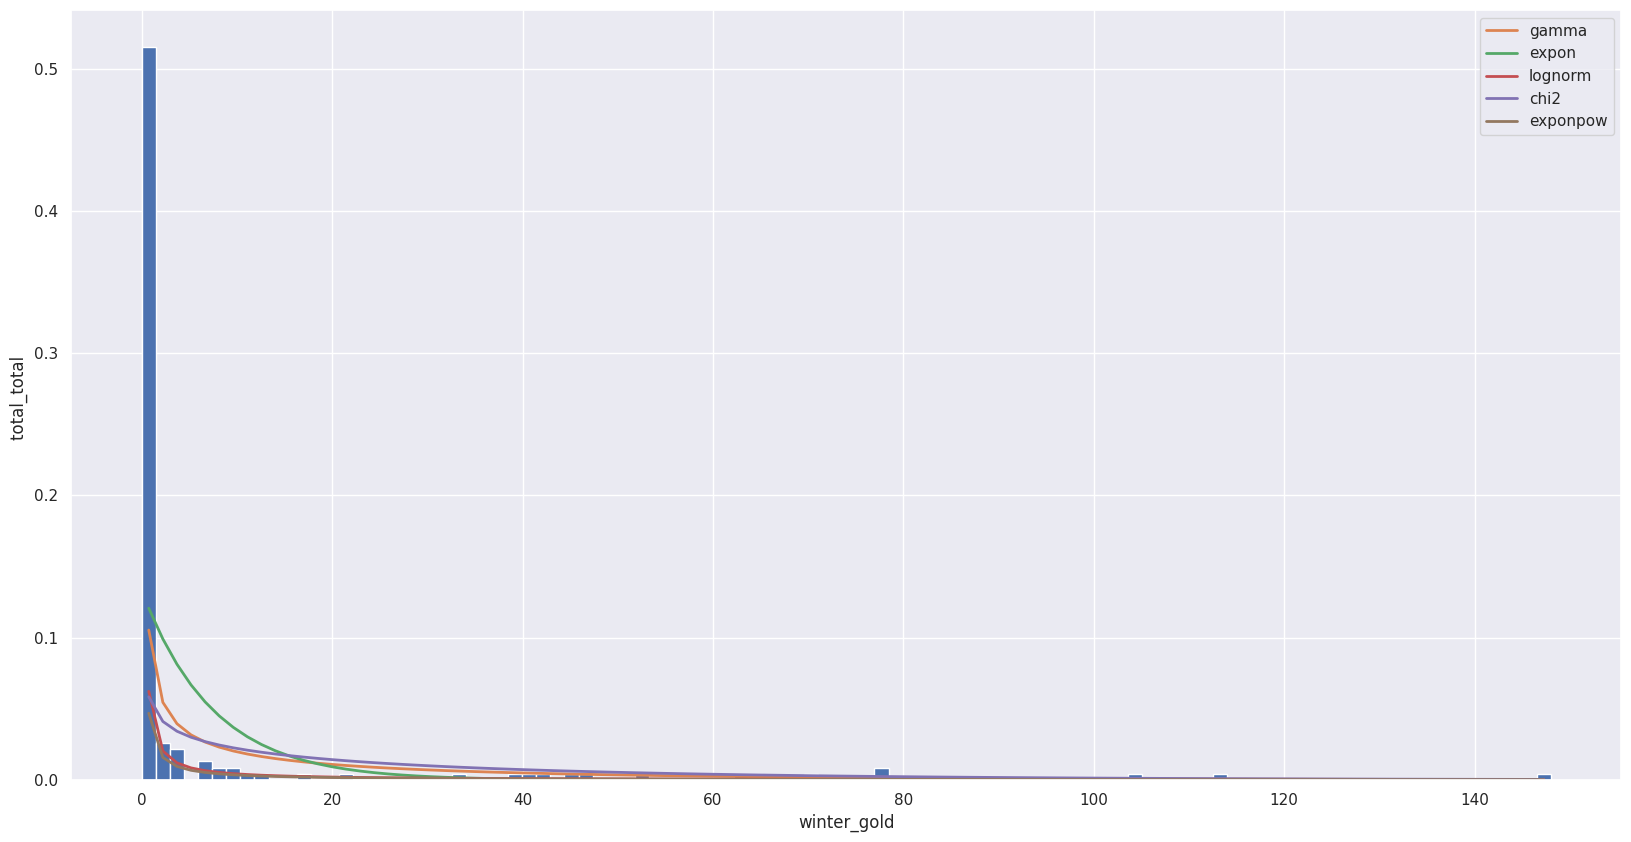

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  7.94it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma            0.196708  1198.067539 -1026.289697     inf      0.711538   
expon            0.203352  2183.008294 -1026.157197     inf      0.711538   
chi2             0.243211  1134.819789  -993.184781     inf      0.711538   
exponpow         0.269194  1564.192279  -977.350592     inf      0.650760   
rayleigh         0.281861  1913.020943  -975.226867     inf      0.459178   

             ks_pvalue  
gamma     3.220250e-80  
expon     3.220250e-80  
chi2      3.220250e-80  
exponpow  4.304553e-65  
rayleigh  1.319119e-30  


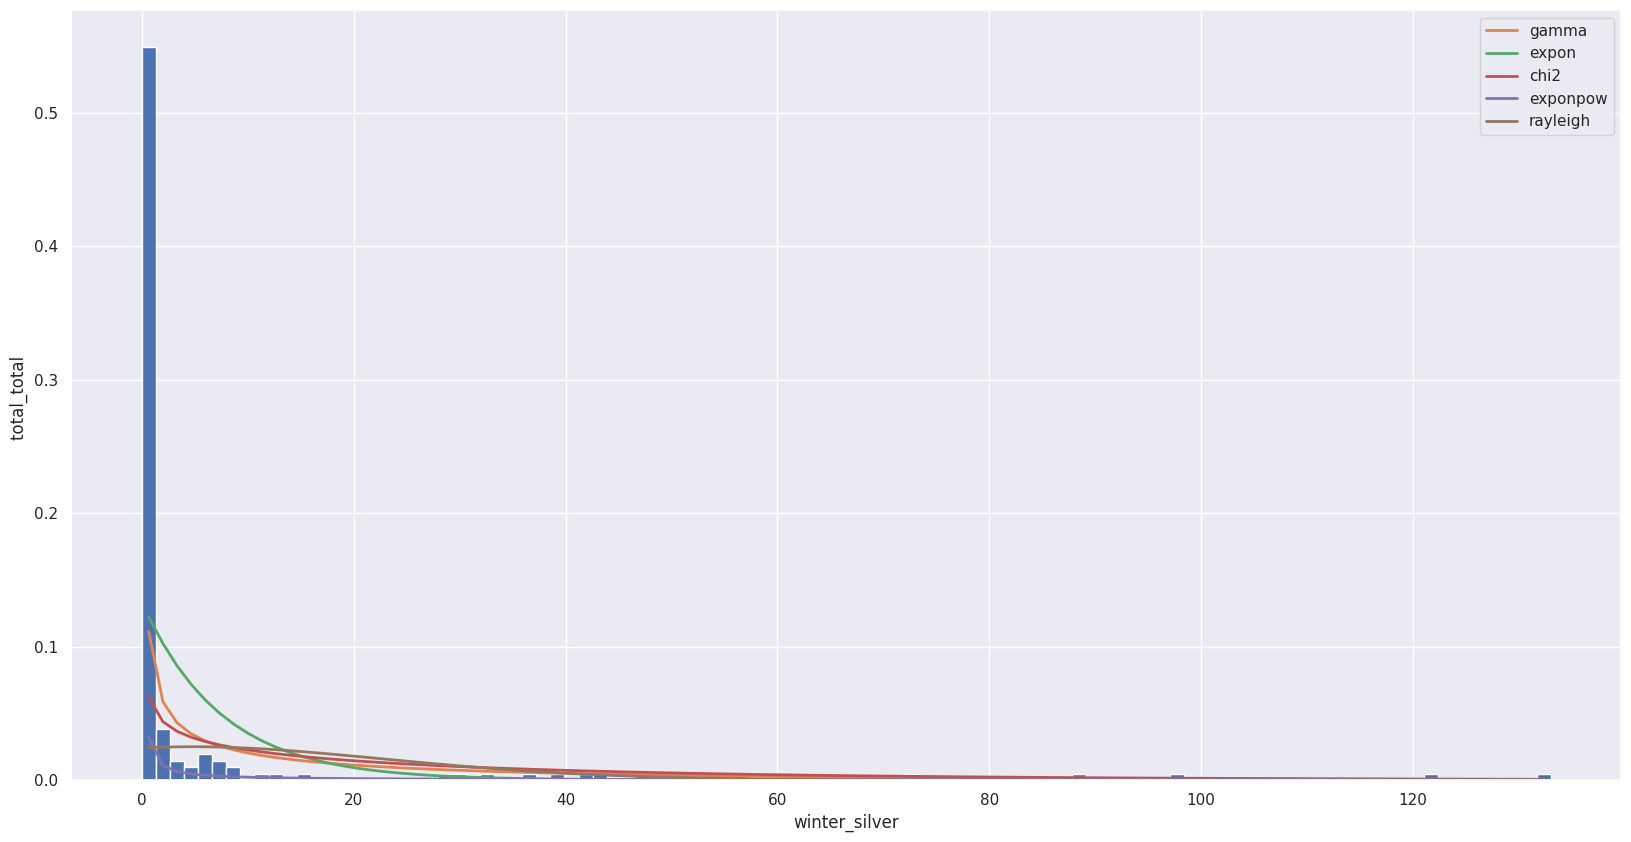

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  9.63it/s]


          sumsquare_error          aic         bic  kl_div  ks_statistic  \
expon            0.253586  2071.586066 -991.717903     inf      0.717949   
gamma            0.257392  1160.871333 -984.344052     inf      0.717949   
chi2             0.292130  1119.470377 -964.594732     inf      0.717949   
exponpow         0.320621  1548.326110 -950.077121     inf      0.657242   
rayleigh         0.336443  1862.537727 -947.612811     inf      0.450037   

             ks_pvalue  
expon     5.673411e-82  
gamma     5.673411e-82  
chi2      5.673411e-82  
exponpow  1.377841e-66  
rayleigh  2.356180e-29  


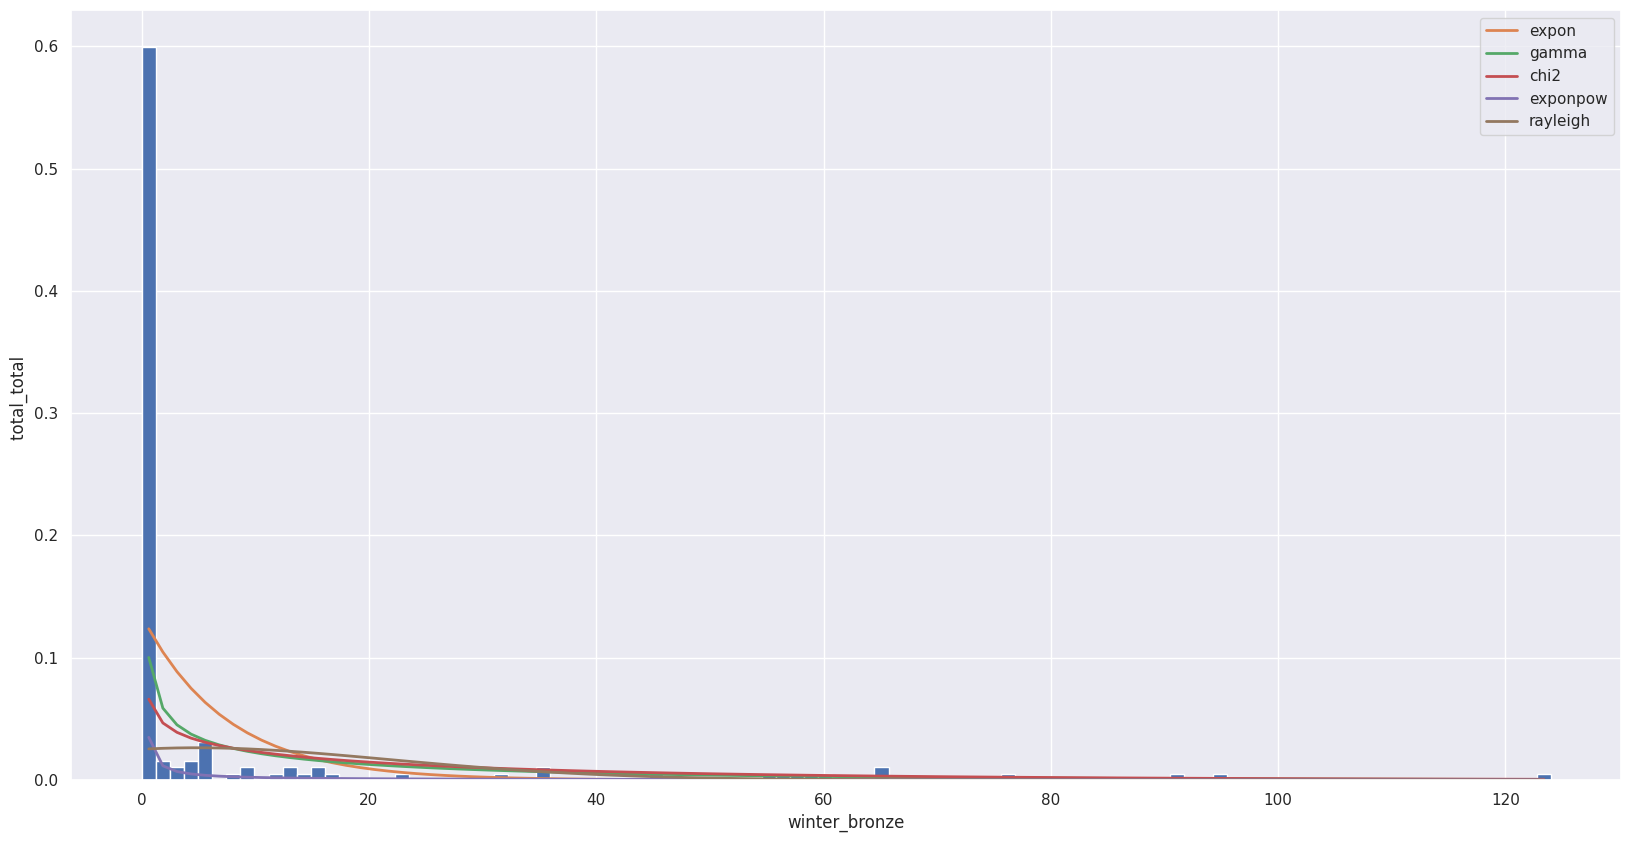

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 10.19it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma            0.022132  1419.428522 -1367.099217     inf      0.698718   
expon            0.022322  2431.275305 -1370.816288     inf      0.698718   
chi2             0.026654  1363.369425 -1338.101840     inf      0.698718   
exponpow         0.029590  1787.354996 -1321.795114     inf      0.640187   
rayleigh         0.030904  2195.658526 -1320.071819     inf      0.452189   

             ks_pvalue  
gamma     8.282758e-77  
expon     8.282758e-77  
chi2      8.282758e-77  
exponpow  1.040325e-62  
rayleigh  1.202912e-29  


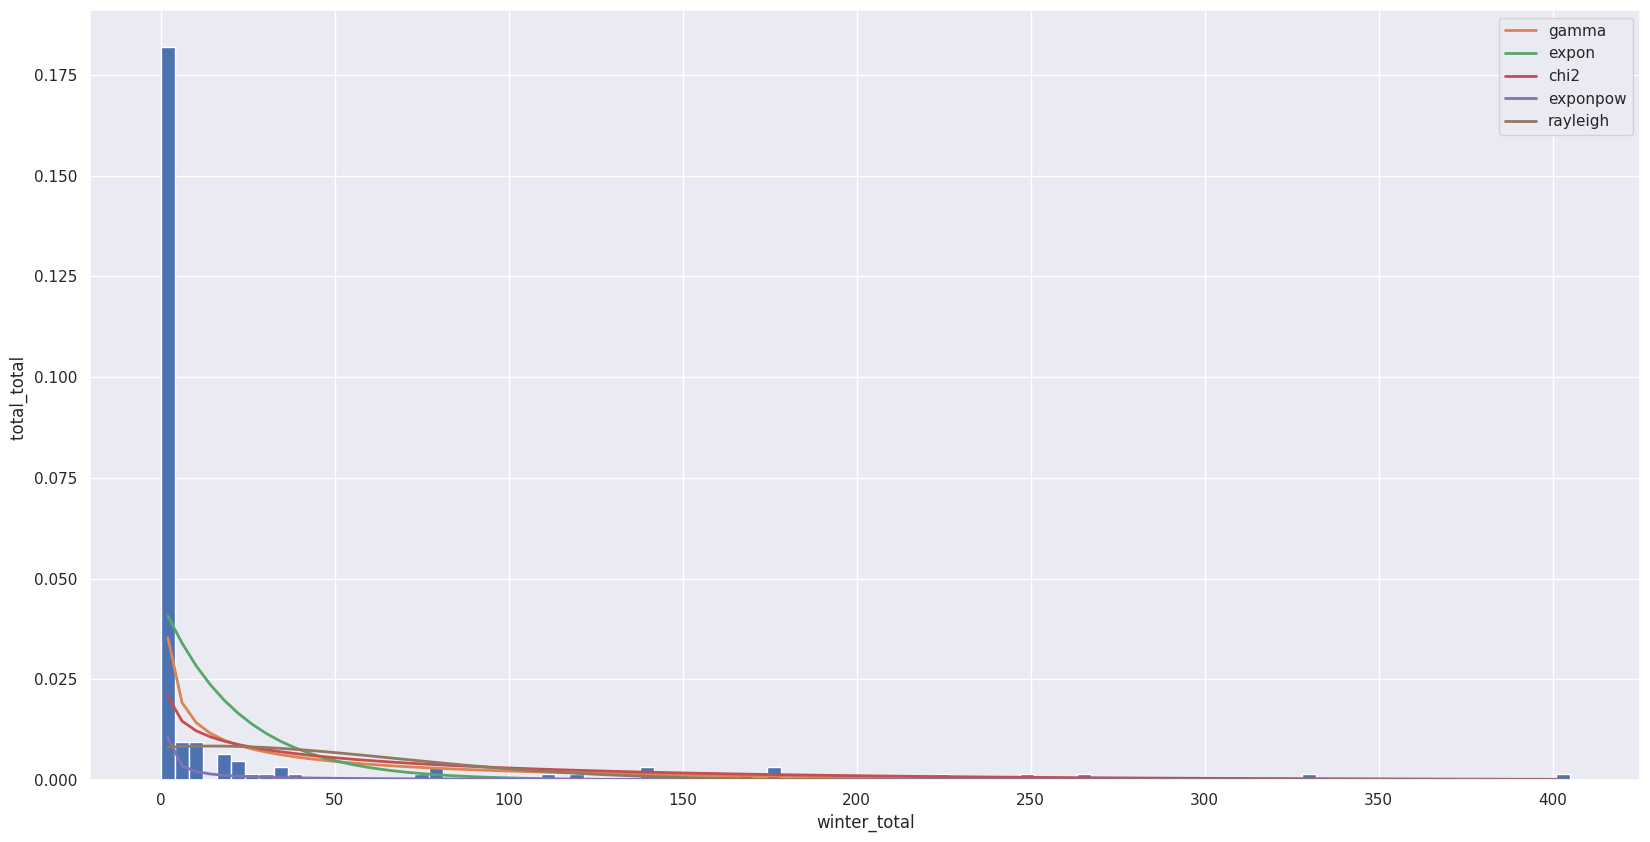

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 12.20it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
cauchy           0.105360  909.525643 -1128.736214     inf      0.130624   
chi2             0.106373  824.116405 -1122.192731     inf      0.081019   
gamma            0.106373  824.116364 -1122.192726     inf      0.081019   
rayleigh         0.108527  814.207038 -1124.115360     inf      0.130587   
norm             0.112968  821.204348 -1117.858841     inf      0.156526   

          ks_pvalue  
cauchy     0.008821  
chi2       0.243957  
gamma      0.243961  
rayleigh   0.008848  
norm       0.000836  


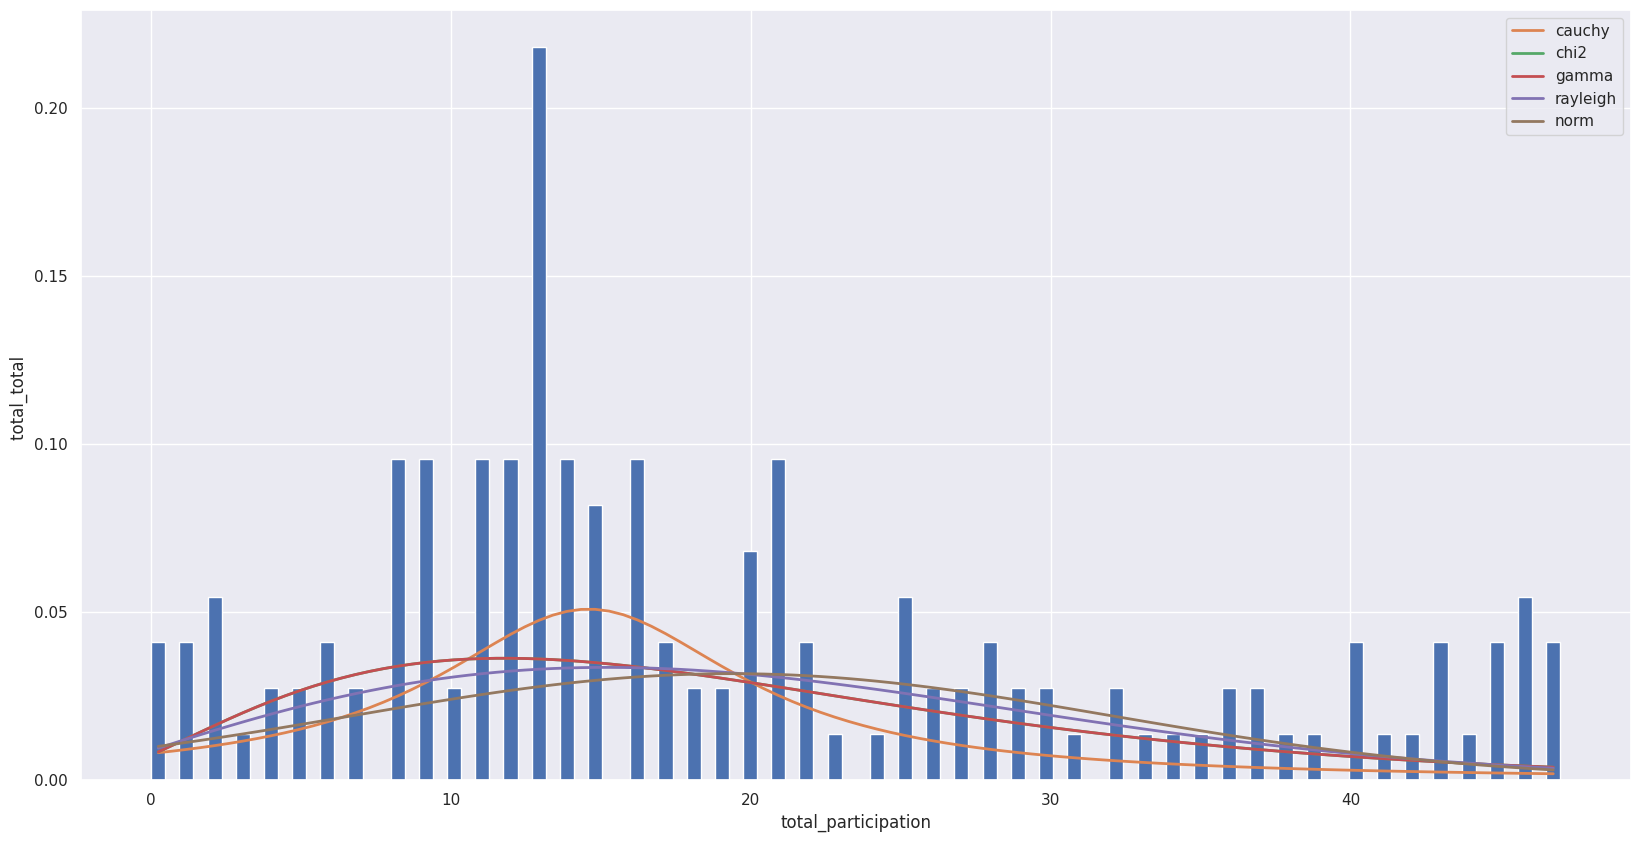

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  8.29it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
exponpow         0.127720  1037.138660 -1093.663247     inf      0.262820   
gamma            0.152963  1069.611139 -1065.527304     inf      0.367095   
lognorm          0.170176  1227.198656 -1048.891626     inf      0.375547   
chi2             0.235952   936.247848  -997.911805     inf      0.291532   
expon            0.259917   893.027612  -987.870980     inf      0.324239   

             ks_pvalue  
exponpow  5.350432e-10  
gamma     2.335530e-19  
lognorm   2.869903e-20  
chi2      3.071809e-12  
expon     4.241116e-15  


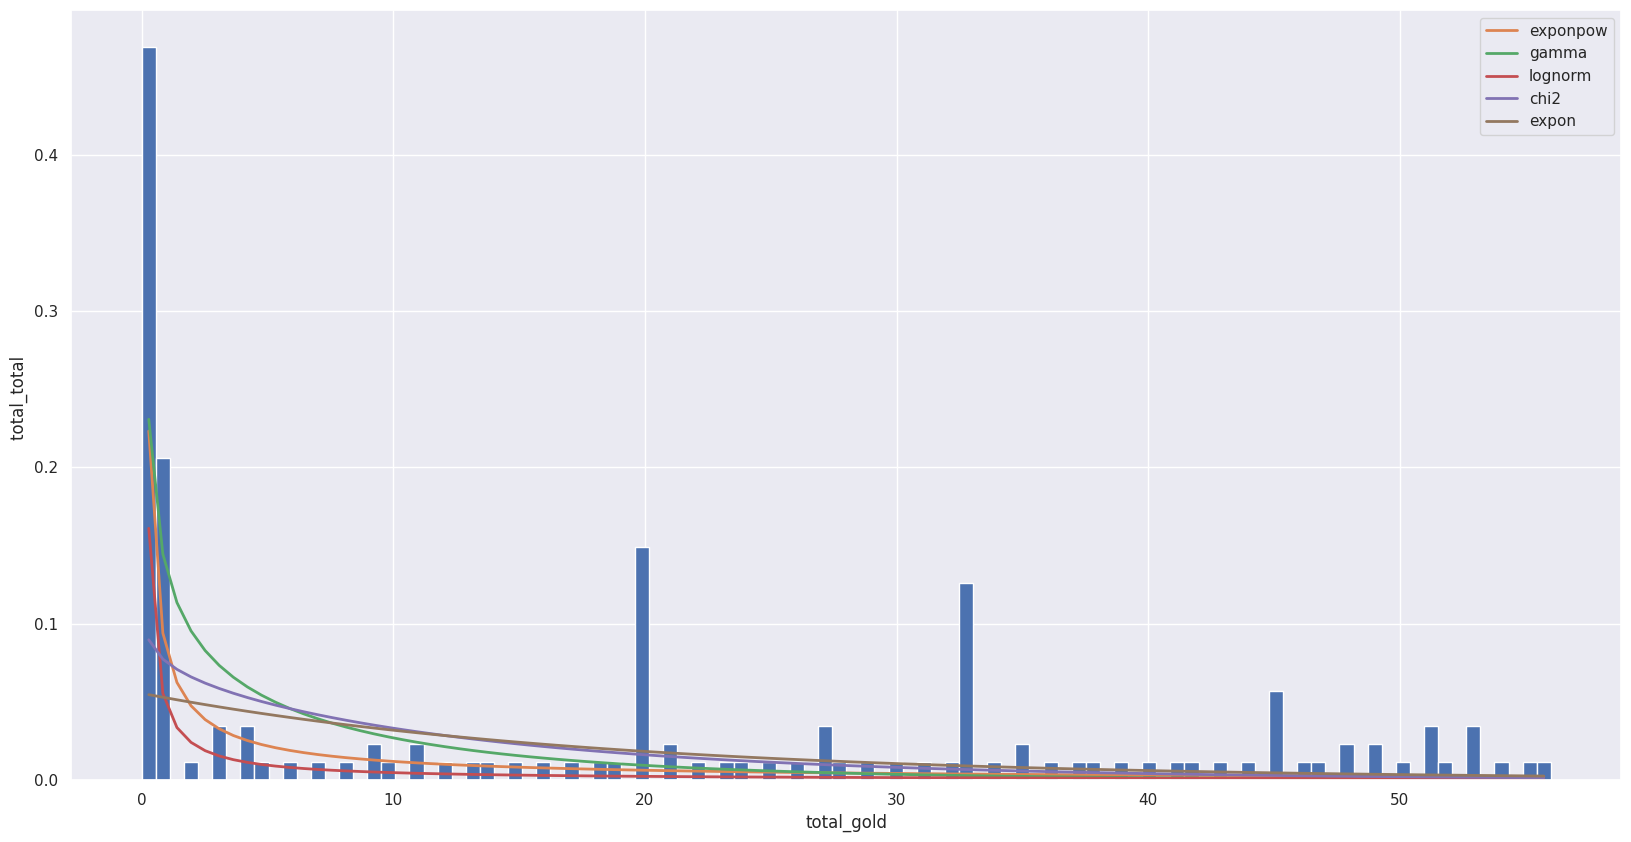

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  7.35it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
cauchy           0.000055  2289.992015 -2306.903353     inf      0.327575   
expon            0.002005  3007.406970 -1746.759197     inf      0.411483   
exponpow         0.002144  1608.690176 -1731.293960     inf      0.268981   
chi2             0.002629  1629.519824 -1699.439302     inf      0.495712   
lognorm          0.002797  1830.428944 -1689.766128     inf      0.374733   

             ks_pvalue  
cauchy    2.075056e-15  
expon     2.076017e-24  
exponpow  1.855438e-10  
chi2      6.270124e-36  
lognorm   3.520236e-20  


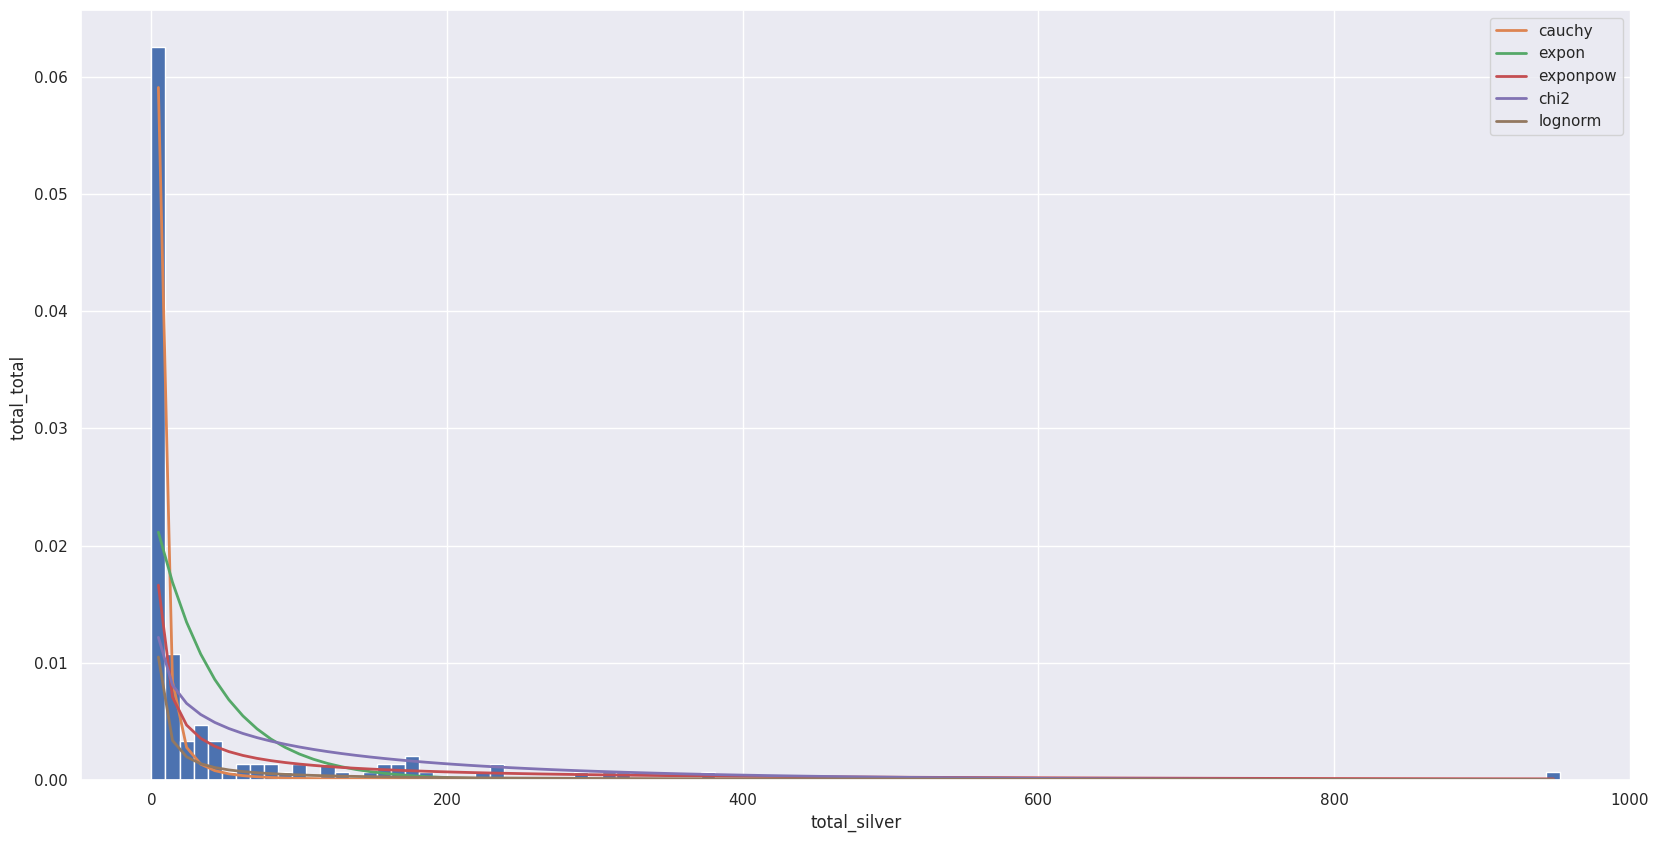

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  8.53it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
cauchy           0.000206  2158.257240 -2101.468972     inf      0.336961   
expon            0.002097  2608.487650 -1739.802424     inf      0.370468   
chi2             0.002606  1573.432597 -1700.792634     inf      0.445460   
exponpow         0.002839  1481.952434 -1687.444347     inf      0.499112   
lognorm          0.002952  1785.781772 -1681.370639     inf      0.377929   

             ks_pvalue  
cauchy    2.658812e-16  
expon     1.018402e-19  
chi2      9.714140e-29  
exponpow  1.884876e-36  
lognorm   1.573699e-20  


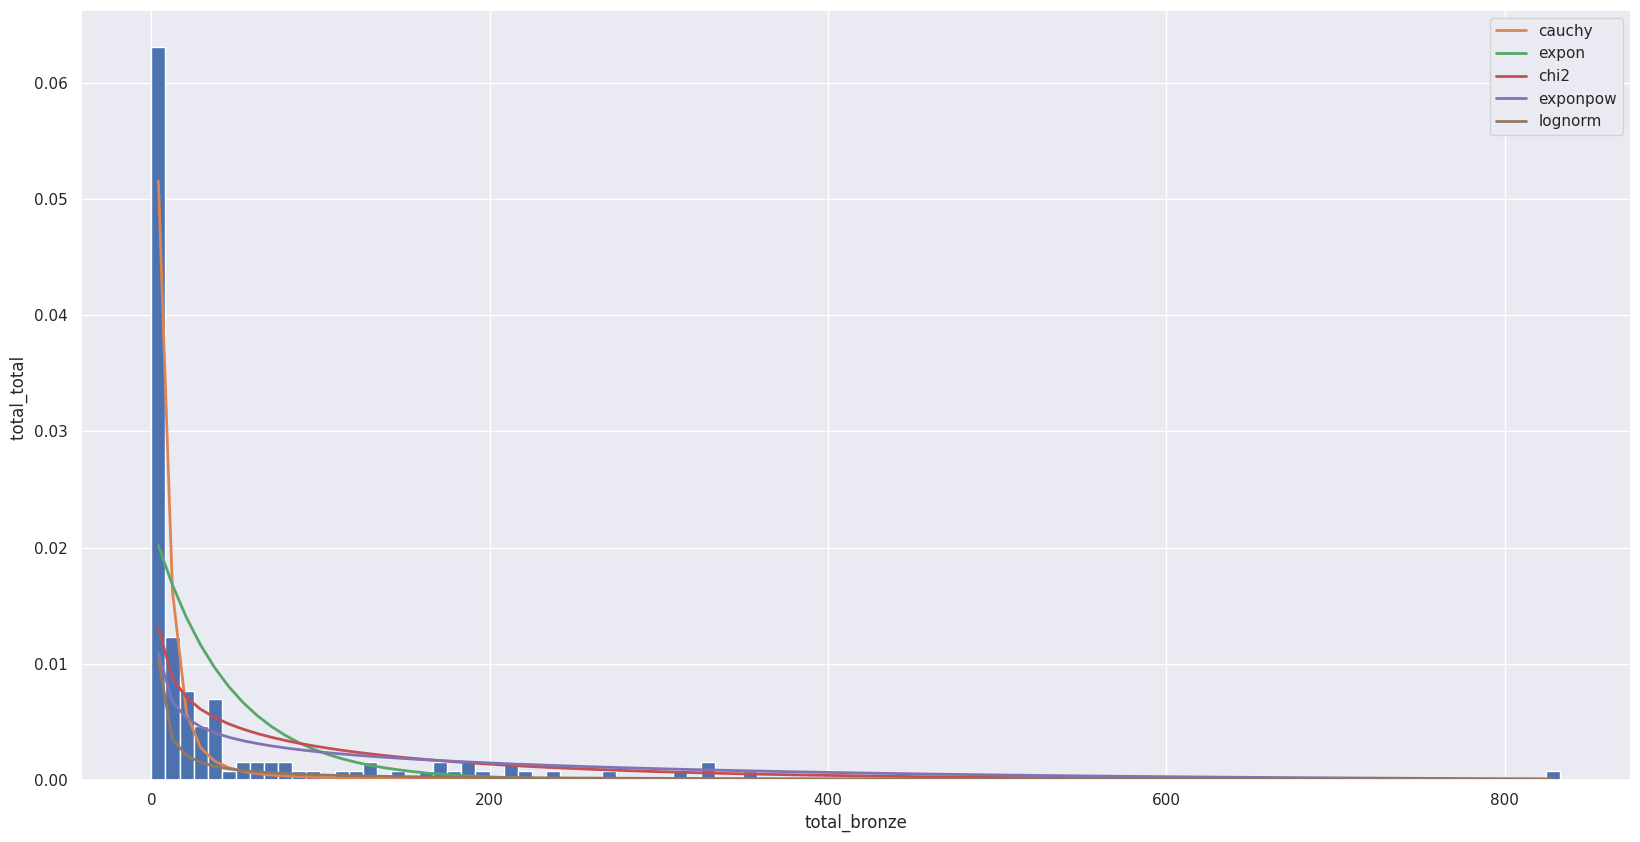

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 12.40it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
exponpow         0.032658  1344.897182 -1306.406564     inf      0.673613   
lognorm          0.040540  1424.449840 -1272.680885     inf      0.432165   
uniform          0.043342   887.768122 -1267.302809     inf      0.136160   
expon            0.043392   951.733841 -1267.124348     inf      0.179754   
rayleigh         0.045007   925.630156 -1261.425055     inf      0.100292   

             ks_pvalue  
exponpow  1.756318e-70  
lognorm   5.383724e-27  
uniform   5.526652e-03  
expon     6.992537e-05  
rayleigh  8.088348e-02  


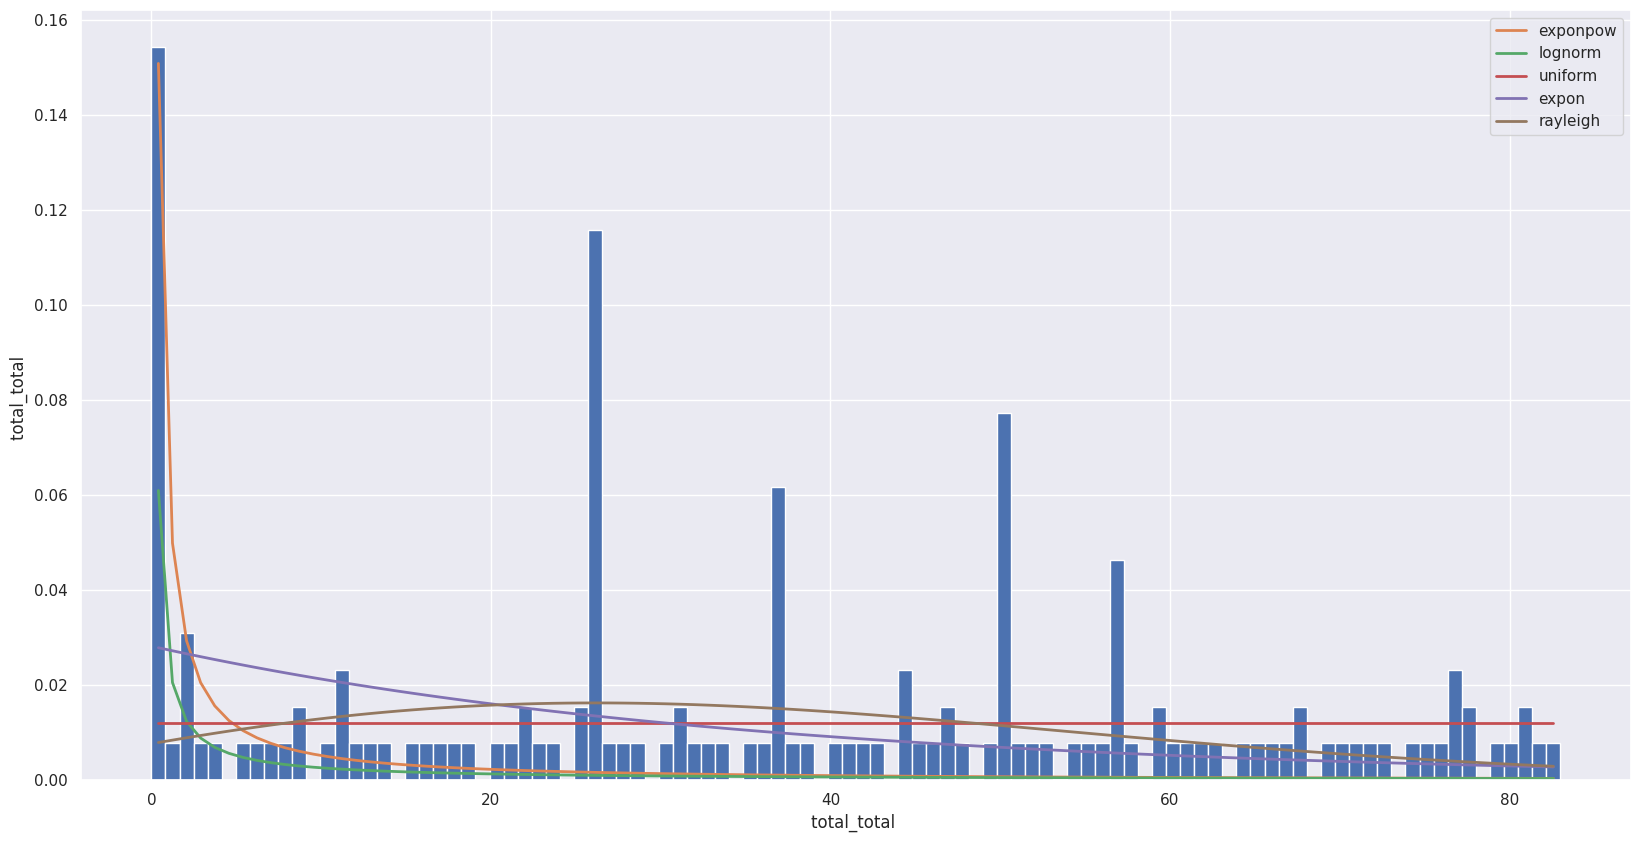

In [101]:
plt.rcParams["figure.figsize"] = (20, 10)
for i in medals_df_pandas.columns:
    values = medals_df_pandas[i].values
    f = Fitter(values, distributions=get_common_distributions())
    f.fit()
    print(f.summary())
    plt.ylabel("total_total ")
    plt.xlabel(i)
    plt.show()

<Axes: >

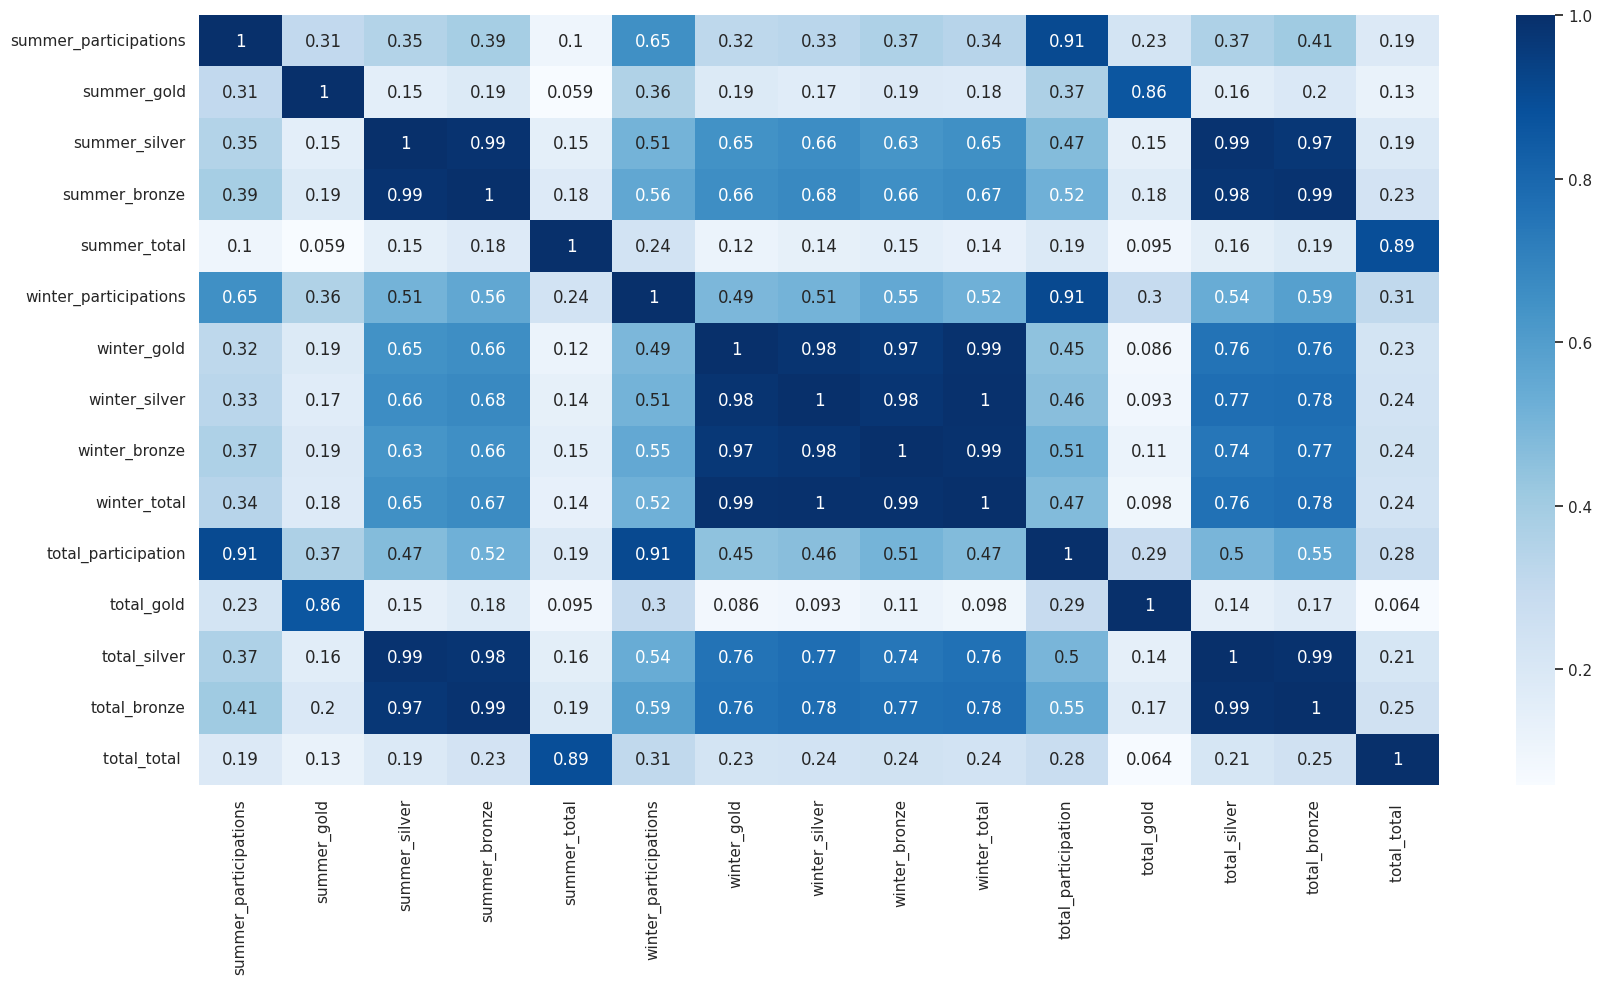

In [102]:
plt.rcParams["figure.figsize"] = (20, 10)
sns.heatmap(
    medals_df_pandas.corr(), annot=True, cmap="Blues"
)  # Heatmap showing correlation between the attributes.

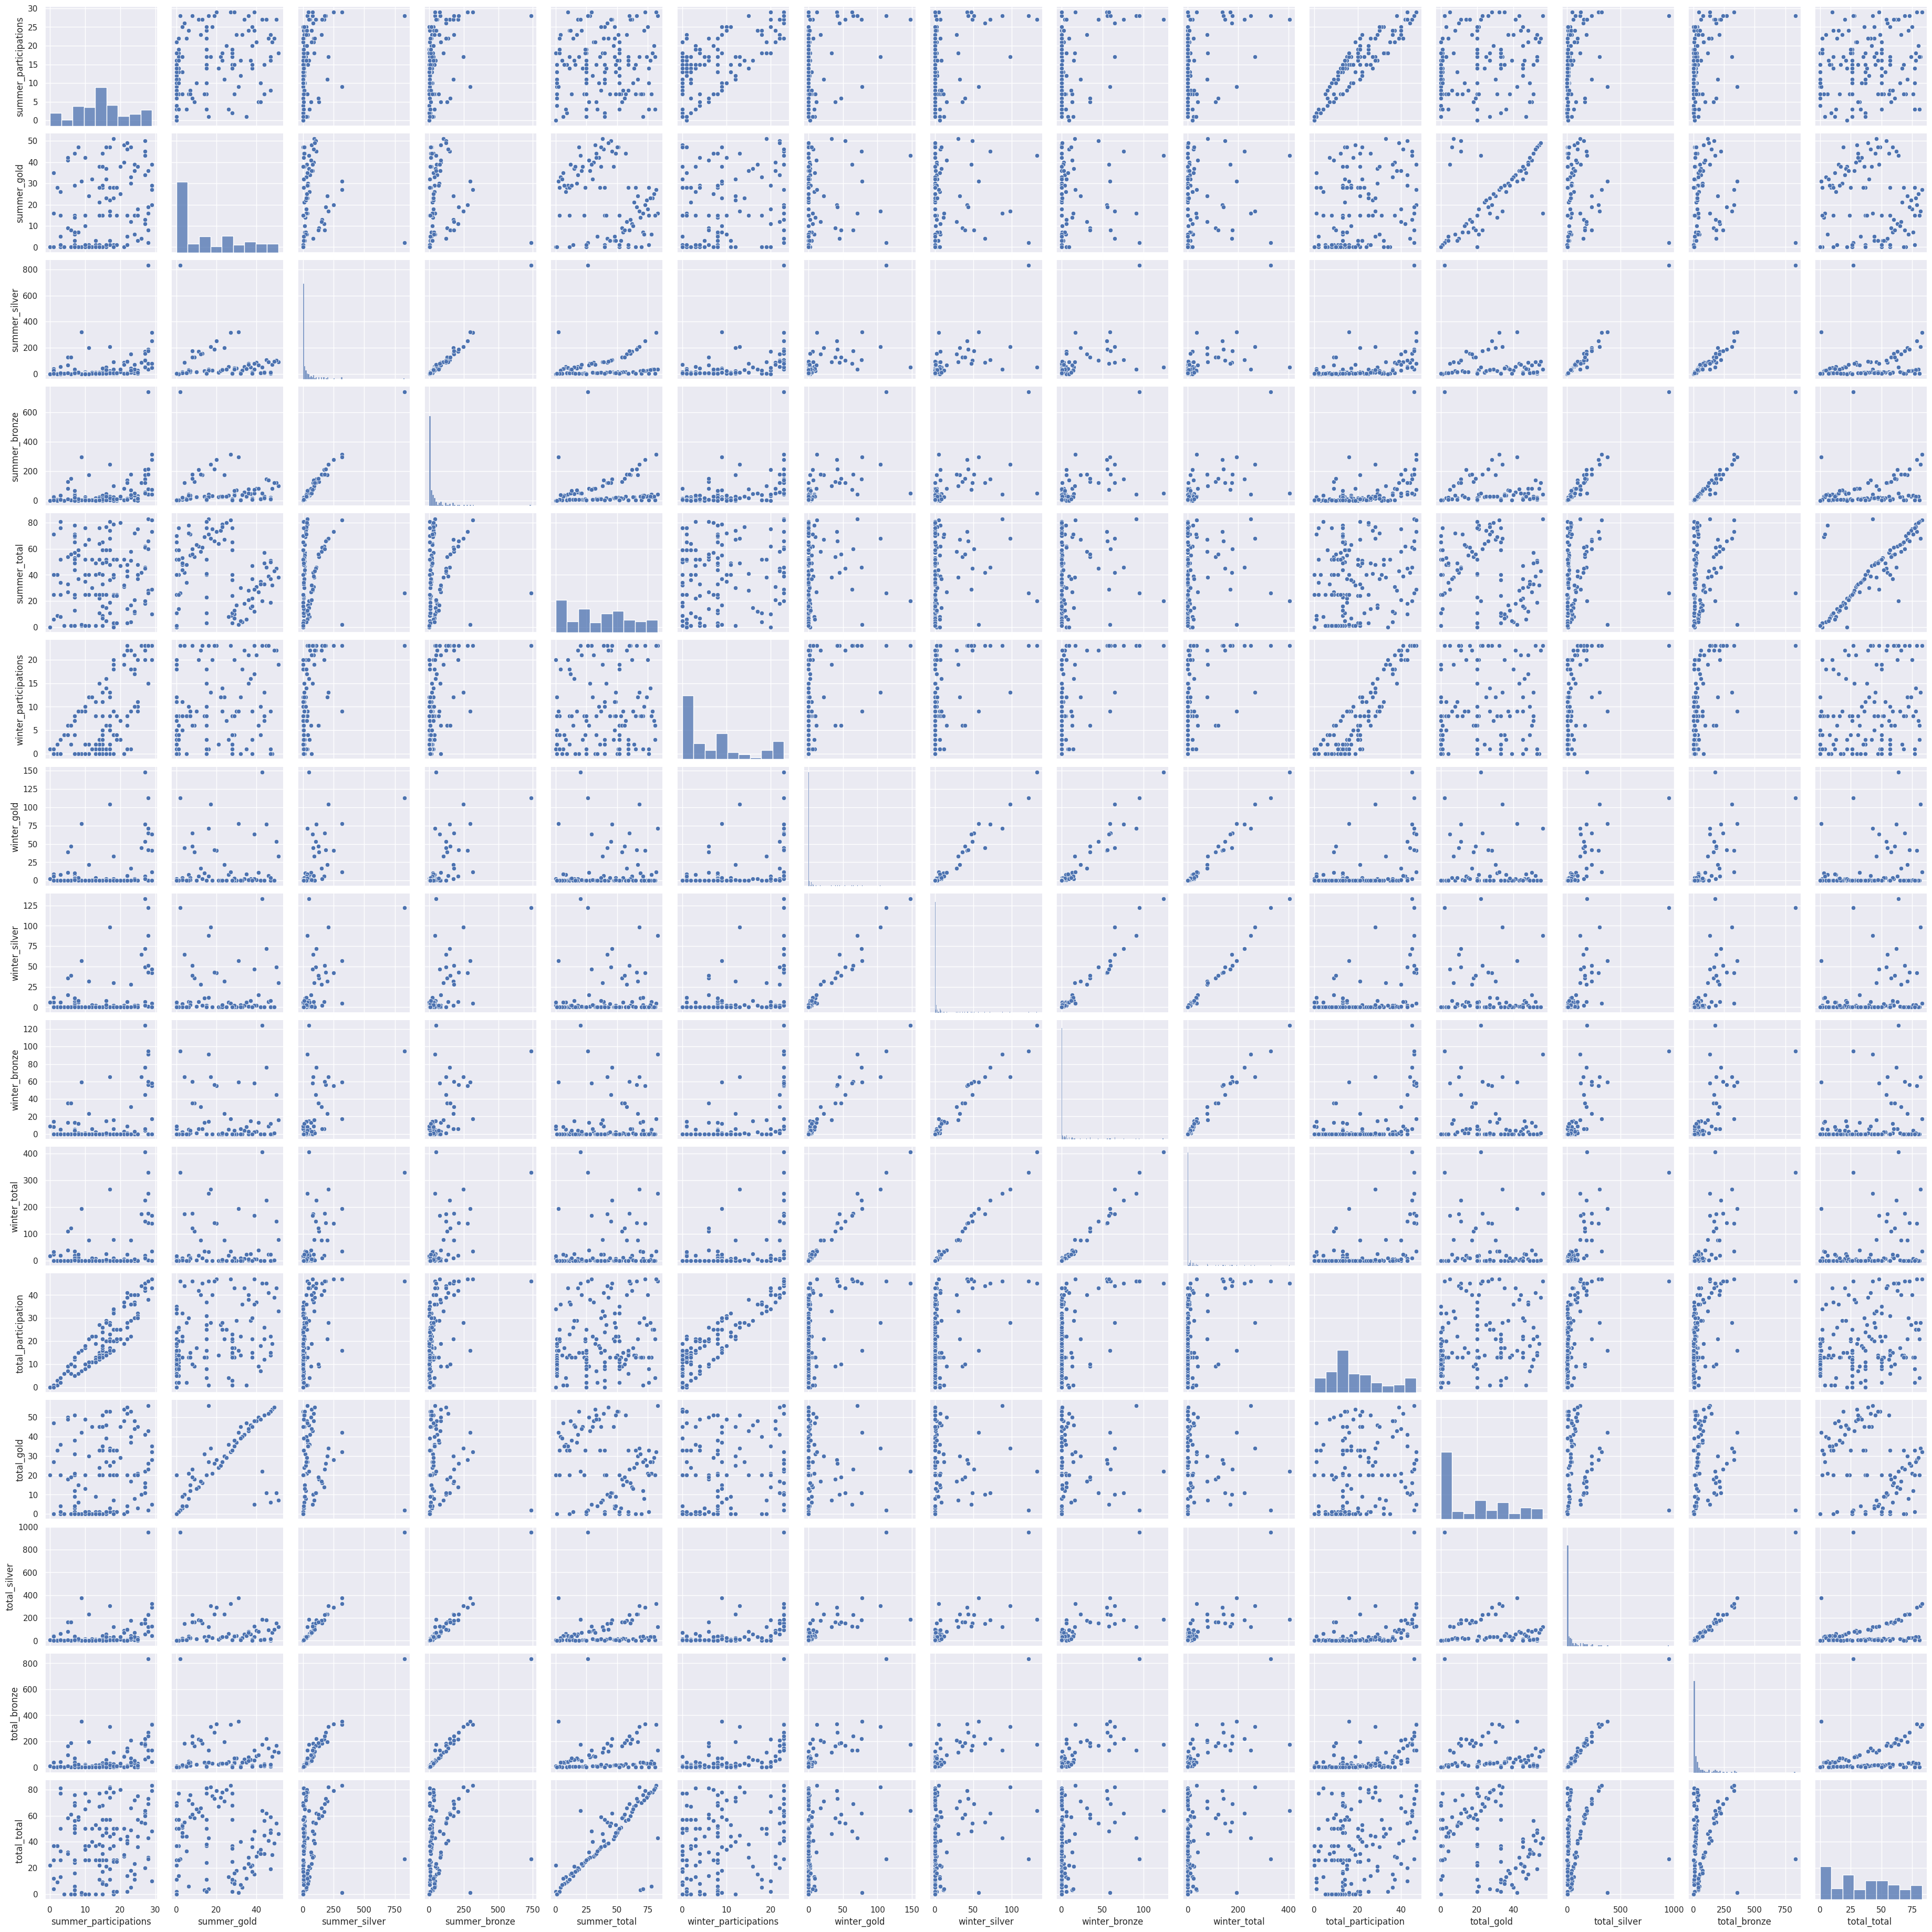

In [103]:
# All attributes are plotted against each other to see the pattern of distribution
sns.pairplot(medals_df_pandas)

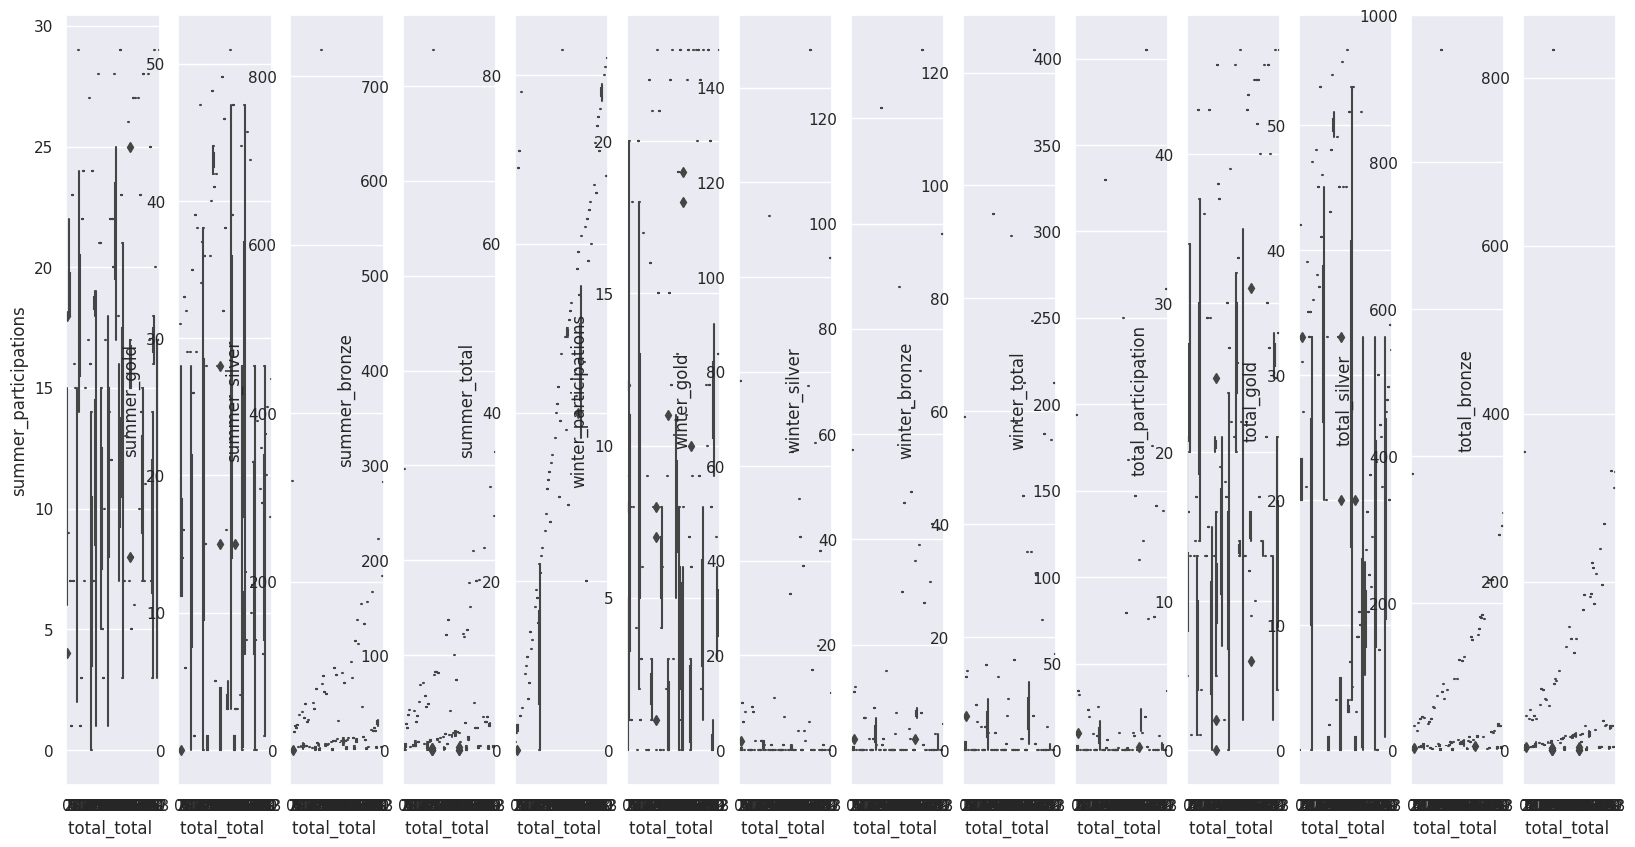

In [104]:
names = medals_df_pandas[
    [
        'summer_participations', 'summer_gold', 'summer_silver', 'summer_bronze', 'summer_total', 'winter_participations', 'winter_gold', 'winter_silver', 'winter_bronze', 'winter_total', 'total_participation', 'total_gold', 'total_silver', 'total_bronze', 'total_total ',
    ]
].columns.drop("total_total ")
ncols = len(names)
fig, axes = plt.subplots(1, ncols)
for name, ax in zip(names, axes.flatten()):
    sns.boxplot(
        y=name,
        x="total_total ",
        data=medals_df_pandas[
            [
                'summer_participations', 'summer_gold', 'summer_silver', 'summer_bronze', 'summer_total', 'winter_participations', 'winter_gold', 'winter_silver', 'winter_bronze', 'winter_total', 'total_participation', 'total_gold', 'total_silver', 'total_bronze', 'total_total ',
            ]
        ],
        orient="v",
        ax=ax,
    )
plt.rcParams["figure.figsize"] = (12, 16)


# **What kind of data exploration did you do?**
# **Preliminary findings from the EDA.**

Datatype Check - All the features in the dataset are Integers/ Float.
Missing Data Check - Our Dataset Didn't had any missing values in any of the features.
Distribution of training data - I checked the probability distribution of each and every feature in the training dataset
Correlation Check - I performed a correlation check on the dataset using heatmap and pirplot, the findings from it was that the didn't had any significant multi colinearity issues.

# **Data Cleaning**
This dataset was relatively cleaner with no missing values. But handing missing values is one of the most important tasks in any Data Science project.
# **Handling Missing Data**
In any ML modeling task, one of the very important task is to check if we have any missing values in our dataset. If there are missing values in the dataset it can horribly change the results and make our model inefficient.
But there are ways to tackle this problem, we will discuss these methods in a bit detail below


# **How to handle missing data - Data Imputation techniques**
Delete rows with missing data
Fill the missing data points by either mean/mode/median
Model a regression with rest of the feature as input and the missing value as the target i.e. MICE Imputation
Our dataset doesn't have any missing values, lets deliberately create some missing values and have a comparative analysis of how effectively each method is recovering the data back.

We will remove 1%, 5% and 10% of the data from alcohol in our dataset and see how well Mean Imputation and MICE imputation will recover the data back



In [105]:
df_imputation = medals_df_pandas.copy()
# Creating three extra coloumns of Alcohol for performing Data Imputation techniques
df_imputation["summer_gold_1_percent"] = df_imputation[["summer_gold"]]
df_imputation["summer_gold_5_percent"] = df_imputation[["summer_gold"]]
df_imputation["summer_gold_10_percent"] = df_imputation[["summer_gold"]]

In [106]:
# Function to calculate percentage of missing data in dataset
def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame(
        {"column_name": dataframe.columns, "percent_missing": percent_missing}
    )
    return missing_value_df


# Function to create missing values
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac=percent).index, col] = np.nan


# Modified function to impute data using mean imputation
def mean_impute(train_df):
    mm_impute_train_df = train_df.copy()  # Make a copy of dataframe for imputation
    mm_impute_train_df["_1_percent"] = mm_impute_train_df[
        "summer_gold_1_percent"
    ].fillna(mm_impute_train_df["summer_gold"].mean())
    mm_impute_train_df["alcohol_5_percent"] = mm_impute_train_df[
        "summer_gold_5_percent"
    ].fillna(mm_impute_train_df["summer_gold"].mean())
    mm_impute_train_df["summer_gold_10_percent"] = mm_impute_train_df[
        "summer_gold_10_percent"
    ].fillna(mm_impute_train_df["summer_gold"].mean())
    return mm_impute_train_df


# Function to impute data using MICE method
def mice_impute(train_df):
    mice_imputed_train_df = pd.DataFrame(
        MICE().fit_transform(train_df), columns=list(train_df.columns)
    )
    return mice_imputed_train_df


# Function to calculate how well the data has been recovered after performing data imputation
def percentage_change(l1, l2):
    percent_change = abs(l2 - l1) / (l1 + 0.000000001)
    avg_change = (percent_change.sum() / percent_change.count()) * 100
    return avg_change

In [107]:
# Checking for % missing values in dataset
print(get_percent_missing(df_imputation))

                                   column_name  percent_missing
summer_participations    summer_participations              0.0
summer_gold                        summer_gold              0.0
summer_silver                    summer_silver              0.0
summer_bronze                    summer_bronze              0.0
summer_total                      summer_total              0.0
winter_participations    winter_participations              0.0
winter_gold                        winter_gold              0.0
winter_silver                    winter_silver              0.0
winter_bronze                    winter_bronze              0.0
winter_total                      winter_total              0.0
total_participation        total_participation              0.0
total_gold                          total_gold              0.0
total_silver                      total_silver              0.0
total_bronze                      total_bronze              0.0
total_total                       total_

In [108]:
# Creating missing values in respected coloumns to perform data imputation
create_missing(df_imputation, 0.01, "summer_gold_1_percent")
create_missing(df_imputation, 0.05, "summer_gold_5_percent")
create_missing(df_imputation, 0.1, "summer_gold_10_percent")

In [109]:
# Performing Mean Imputation
mm_imputed_df_imputation = mean_impute(df_imputation)

For MICE imputation, we have to be carefull and create three different dataframes for all three configuration, because MICE imputation uses all features in the data to predict(impute) the missing value. Having all coloumns in one dataframe can lead to the issue of co-linearity which will mislead the regression model and result in bad imputati

In [110]:
# Dataframe for 1% missing value
df_imputation_1_percent = df_imputation.drop(
    ["summer_gold", "summer_gold_5_percent", "summer_gold_10_percent"], axis=1
)
# Dataframe for 5% missing value
df_imputation_5_percent = df_imputation.drop(
    ["summer_gold", "summer_gold_1_percent", "summer_gold_10_percent"], axis=1
)
# Dataframe for 10% missing value
df_imputation_10_percent = df_imputation.drop(
    ["summer_gold", "summer_gold_1_percent", "summer_gold_5_percent"], axis=1
)

# Performing Imputation on Dataframe with 1% missing values
mice_imputed_df_imputation_1_percent = mice_impute(df_imputation_1_percent)
# Performing Imputation on Dataframe with 5% missing values
mice_imputed_df_imputation_5_percent = mice_impute(df_imputation_5_percent)
# Performing Imputation on Dataframe with 10% missing values
mice_imputed_df_imputation_10_percent = mice_impute(df_imputation_10_percent)

Lets see how our imputation methods have recovered the data

In [111]:
# This is the average % error on residuals for 1% missing data imputed using Mean Imputation
print("Average % error on residuals for 1% missing data imputed using Mean Imputation")
print(
    percentage_change(
        mm_imputed_df_imputation["summer_gold"],
        mm_imputed_df_imputation["summer_gold_1_percent"],
    )
)

# This is the average % error on residuals for 1% missing data imputed using MICE Imputation
print("Average % error on residuals for 1% missing data imputed using MICE Imputation")
print(
    percentage_change(
        df_imputation["summer_gold"],
        mice_imputed_df_imputation_1_percent["summer_gold_1_percent"],
    )
)

# This is the average % error on residuals for 5% missing data imputed using Mean Imputation
print("Average % error on residuals for 5% missing data imputed using Mean Imputation")
print(
    percentage_change(
        mm_imputed_df_imputation["summer_gold"],
        mm_imputed_df_imputation["summer_gold_5_percent"],
    )
)

# This is the average % error on residuals for 5% missing data imputed using MICE Imputation
print("Average % error on residuals for 5% missing data imputed using MICE Imputation")
print(
    percentage_change(
        df_imputation["summer_gold"],
        mice_imputed_df_imputation_5_percent["summer_gold_5_percent"],
    )
)

# This is the average % error on residuals for 10% missing data imputed using Mean Imputation
print("Average % error on residuals for 10% missing data imputed using Mean Imputation")
print(
    percentage_change(
        mm_imputed_df_imputation["summer_gold"],
        mm_imputed_df_imputation["summer_gold_10_percent"],
    )
)

# This is the average % error on residuals for 10% missing data imputed using MICE Imputation
print("Average % error on residuals for 10% missing data imputed using MICE Imputation")
print(
    percentage_change(
        df_imputation["summer_gold"],
        mice_imputed_df_imputation_10_percent["summer_gold_10_percent"],
    )
)

Average % error on residuals for 1% missing data imputed using Mean Imputation
0.0
Average % error on residuals for 1% missing data imputed using MICE Imputation
0.9324620284019085
Average % error on residuals for 5% missing data imputed using Mean Imputation
0.0
Average % error on residuals for 5% missing data imputed using MICE Imputation
2372698021.1339264
Average % error on residuals for 10% missing data imputed using Mean Imputation
59245562151.123215
Average % error on residuals for 10% missing data imputed using MICE Imputation
4043898059.723696


In [112]:
medals_df_pandas = medals_df_pandas.rename(columns={'total_total ': 'total_total'})

# **Interpreting the Imputation Methods**
From the above 6 readings we can conclude that the MICE imputation works well when compared to the Mean imputation method as the imputed value is a function of rest of the features.
We can also observe that the % error of residuals increase as the missing data points increase. From this we can conclude that if we have less missing data in the dataset, more perfectly it is imputed back by the imputation method.
# **Why Imputing data is always better than deleting the row ?**
For obvious reason - Data Loss. When we delete a row we end up deleting a sample from training data which will do more harm to the model instead of doing any good.
Selecting of imputation method is really a personal choice, although from the above analysis we can come to the conclusion that MICE does a better job in getting the databack, but after creating a model it hardly has any positive effects on the accuracy of model. But it is always a better choice to use MICE as it can give you the closest possible value.
# **Feature Importance and Selection**
Lets fit a very simple linear model to understand how the countries medals  are being affected by seasons

In [113]:
# Scaling the data using Min-Max scaling for the purpose of evaluating Co-efficients, as non scaled data may mislead while we evaluate the co-efficients
df = medals_df_pandas.drop(["total_total"], axis=1)
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm = pd.concat((df_norm, medals_df_pandas.total_total), 1)

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.


In [114]:
import statsmodels.formula.api as smf  # OLS model Library

results = smf.ols(
    "total_total ~ summer_participations + summer_gold + summer_silver + summer_bronze + summer_total + winter_participations + winter_gold + winter_silver + winter_bronze + winter_total + total_participation + total_gold + total_silver + total_bronze + total_total ",
    data=df_norm,
).fit()
print(results.summary())  # OLS Linear Model Summary

                            OLS Regression Results                            
Dep. Variable:            total_total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.604e+30
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:25:54   Log-Likelihood:                 4572.0
No. Observations:                 156   AIC:                            -9118.
Df Residuals:                     143   BIC:                            -9078.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2.531e-

# **Feature Selection**
learning model to consider. This means that only the attributes that have a significant impact on the model's output are selected.

To understand this concept better, let's consider an example where you are at a departmental store to purchase grocery items. A product has various pieces of information such as product name, category, expiry date, retail cost, ingredients, and manufacturing details. All of this information is considered as features of the product.

When purchasing the product, you may only consider the brand, retail cost, expiry date, and whether the item is vegetarian or not, while disregarding the manufacturing details. This means that brand, retail cost, expiry date, and vegetarian/non-vegetarian are relevant features, while manufacturing details are considered irrelevant. This process of selecting only the most relevant features is similar to what happens in machine learning models during feature selection.

# **Null-Hypothesis**
**For Example:- Testing the efficacy of a new Vaccine**
testing the effectiveness of a weight loss program. Suppose a weight loss program claims to help people lose an average of 10 pounds in a month. To test this claim, a sample of 100 individuals is randomly selected from the target population, and they are enrolled in the weight loss program. After a month, their weights are measured, and it is found that they lost an average of 8 pounds with a standard deviation of 2 pounds.

The null hypothesis in this case would be that the weight loss program is not effective, and the observed weight loss of 8 pounds is just due to chance. The alternative hypothesis would be that the weight loss program is effective, and the observed weight loss of 8 pounds is due to the program. To test the null hypothesis, statistical tests such as a t-test or a z-test can be used, which will help to determine whether the observed weight loss is statistically significant or not.
Statistically, this can be achieved by P-Value.

P-Value - It stands for â€˜probability valueâ€™; it tells how likely it is that a result occurred by chance alone. Basically, the p-value is used in hypothesis testing to help you support or reject the null hypothesis. The smaller the p-value, the stronger the evidence to reject the null hypothesis.

Lets consider only these features and calculate the model fit again, and then lets have a comparative analysis of both models.



In [115]:
['summer_participations', 'summer_gold', 'summer_silver', 'summer_bronze', 'summer_total', 'winter_participations', 'winter_gold', 'winter_silver', 'winter_bronze', 'winter_total', 'total_participation', 'total_gold', 'total_silver', 'total_bronze', 'total_total ']



['summer_participations',
 'summer_gold',
 'summer_silver',
 'summer_bronze',
 'summer_total',
 'winter_participations',
 'winter_gold',
 'winter_silver',
 'winter_bronze',
 'winter_total',
 'total_participation',
 'total_gold',
 'total_silver',
 'total_bronze',
 'total_total ']

In [116]:
df_norm_feature_selected = df_norm[
    [
        'summer_participations', 'summer_gold', 'summer_silver', 'summer_total', 'winter_participations', 'winter_gold', 'winter_silver', 'winter_total', 'total_participation', 'total_gold', 'total_silver', 'total_total',
    ]
]

In [117]:
results2 = smf.ols(
    "total_total ~ summer_participations + summer_gold + summer_silver  + summer_total + winter_participations + winter_gold + winter_silver + winter_total + total_participation + total_gold + total_silver + total_total ",
    data=df_norm_feature_selected,
).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:            total_total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.747e+31
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:25:54   Log-Likelihood:                 4687.8
No. Observations:                 156   AIC:                            -9352.
Df Residuals:                     144   BIC:                            -9315.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -2.354e-

In [118]:
predicted_total_total_1 = results.predict(
    df_norm[
        [
            'summer_participations', 'summer_gold', 'summer_silver', 'summer_bronze', 'summer_total', 'winter_participations', 'winter_gold', 'winter_silver', 'winter_bronze', 'winter_total', 'total_participation', 'total_gold', 'total_silver', 'total_bronze','total_total',


        ]
    ]
)
df_norm["predicted_total_total_1"] = predicted_total_total_1.round()


In [119]:
predicted_total_total_2 = results2.predict(
    df_norm_feature_selected[
        [
            'summer_participations', 'summer_gold', 'summer_silver',  'summer_total', 'winter_participations', 'winter_gold', 'winter_silver',  'winter_total', 'total_participation', 'total_gold', 'total_silver',  'total_total',


        ]
    ]
)
df_norm_feature_selected["predicted_total_total_2"] = predicted_total_total_2.round()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [120]:
print(
    "Accuracy of countries scoring medals in olympics using all features = ",
    100 - percentage_change(df_norm["total_total"], df_norm["predicted_total_total_1"]),
)
print(
    "Accuracy of predicting the total numer of medals using only significant features is = ",
    100
    - percentage_change(
        df_norm_feature_selected["total_total"],
        df_norm_feature_selected["predicted_total_total_2"],
    ),
)


Accuracy of countries scoring medals in olympics using all features =  100.0
Accuracy of predicting the total numer of medals using only significant features is =  100.0


From the above two summaries we can interpret that after selecting only the significant features(features with P value less than 0.05) it had little to no effect on the outcome compare to the model which uses all the features.

From the above two interpretations, our observation is that in both the cases our model predicts the total to countries medals pretty good and they are pretty close to each other. Model who uses all features slighly overcomes the model who is using only the statistically important features with and accuracy of 100% 

From the above studies let's stick to the data with all featues and try using different models



In [121]:
df_norm = df_norm.drop(["predicted_total_total_1"], axis=1)

In [122]:
X = df_norm.drop(["total_total"], axis=1)  # Training Feature
Y = df_norm["total_total"]  # Target

# **How did you split the data into train, and test?**
The data was splitted into Training ad Testing Data into 90% and 10% respectively.

In [123]:
(
    x_train,
    x_test,
    y_train,
    y_test,
) = train_test_split(  # Splitting Data into Training and Test
    X, Y, test_size=0.1, random_state=42
)
x_train_100 = shap.utils.sample(
    x_train, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_test_100 = shap.utils.sample(
    x_test, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process


# **Fitting a Linear Model**

In [124]:
import sklearn

linear_model = sklearn.linear_model.LinearRegression()  # Initializing a Linear Model
linear_model.fit(x_train, y_train)  # Training a linear model

LinearRegression()

In [125]:
y_linear_predictions = linear_model.predict(x_test).round()


# **Fitting a Tree Based Model**


In [126]:
from sklearn.ensemble import RandomForestRegressor

tree_model = RandomForestRegressor(
    max_depth=X.shape[1], random_state=0, n_estimators=10
)
tree_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=14, n_estimators=10, random_state=0)

In [127]:
y_tree_based_predictions = tree_model.predict(x_test).round()


# **Fitting a Support Vector Machine (SVM)**


In [128]:
from sklearn import svm

regr = svm.SVR()
svm_model = regr.fit(x_train, y_train)


In [129]:
svm_predictions = svm_model.predict(x_test).round()


# **Fitting a MLP Regressor**

In [130]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train)

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.


In [131]:
mlp_predictions = regr.predict(x_test).round()


# **Using AutoML to find out the best Model**

In [132]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [133]:
# Setting up memory
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

3


In [134]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:15233..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmplm2k1t3r
  JVM stdout: /tmp/tmplm2k1t3r/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmplm2k1t3r/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:15233
Connecting to H2O server at http://127.0.0.1:15233 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.3
H2O_cluster_version_age:    5 days
H2O_cluster_name:           H2O_from_python_unknownUser_mn2zlx
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:15233
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  -----------------------------------------------------------------------------------------

In [135]:
medals_hf = h2o.H2OFrame(medals_df_pandas)  # Converting Pandas dataframe in H2O dataframe


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [136]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = medals_hf.split_frame([pct_rows])

In [137]:
# Setting up AutoML
def autoML(df_train, df_test):

    X = df_train.columns
    y = "total_total"

    X.remove(y)  # Removing the result frm our predictors data

    aml = H2OAutoML(max_runtime_secs=222, seed=1)  # Setting of AutoML
    aml.train(
        x=X, y=y, training_frame=df_train
    )  # Trainig the dataset on different models

    return df_train, df_test, aml


# Function to get best model from the AutoML leaderboard
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m and "GBM" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model

In [138]:
autoML = autoML(df_train, df_test)  # Training AutoML


AutoML progress: |█
19:26:10.97: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 131.0.

██████████████████████████████████████████████████████████████| (done) 100%


In [139]:
autoML[2].leaderboard  # Leaderbord of AutoML output


model_id                                              rmse      mse      mae       rmsle    mean_residual_deviance
-------------------------------------------------  -------  -------  -------  ----------  ------------------------
XGBoost_grid_1_AutoML_1_20230409_192606_model_111  10.4771  109.769  5.55428    0.592998                   109.769
XGBoost_grid_1_AutoML_1_20230409_192606_model_32   10.7861  116.339  6.45032  nan                          116.339
XGBoost_grid_1_AutoML_1_20230409_192606_model_80   10.8886  118.561  6.62413  nan                          118.561
XGBoost_grid_1_AutoML_1_20230409_192606_model_24   10.8906  118.604  6.37962    0.686177                   118.604
XGBoost_grid_1_AutoML_1_20230409_192606_model_18   10.8923  118.641  6.2028   nan                          118.641
GBM_grid_1_AutoML_1_20230409_192606_model_42       10.9657  120.248  6.34482  nan                          120.248
XGBoost_grid_1_AutoML_1_20230409_192606_model_81   11.0324  121.714  6.78086  nan                          121.714
XGBoost_grid_1_AutoML_1_20230409_192606_model_101  11.0946  123.09   6.86202  nan                          123.09
XGBoost_grid_1_AutoML_1_20230409_192606_model_115  11.095   123.1    6.55024  nan                          123.1
GBM_grid_1_AutoML_1_20230409_192606_model_50       11.1837  125.075  6.24181  nan                          125.075
[206 rows x 6 columns]

In [140]:
autoML_model = getBestModel(autoML[2])  # Getting Best Model


0


In [141]:
autoML_best_predictions = autoML_model.predict(df_test).round()


xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [142]:
autoMLpredictions = h2o.as_list(autoML_best_predictions, use_pandas=False)
y_test_h2O = h2o.as_list(df_test["total_total"], use_pandas=False)


In [143]:
def flatten(t):
    listt = [(item) for sublist in t for item in sublist][1:]
    listt = [float(x) for x in listt]
    x = pd.Series(listt)
    return x

In [144]:
autoMLpredictions = flatten(autoMLpredictions)
y_test_h2O = flatten(y_test_h2O)

# **Hyperparameter Tuning of AutoML's Best Model**


In [145]:
train, validate, test = np.split(
    medals_df_pandas.sample(frac=1, random_state=42),
    [int(0.6 * len(df)), int(0.8 * len(df))],
)
train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

drf_hyper_params = {
    "ntrees": [10, 25, 50, 75, 100],
    "max_depth": [5, 7, 10, 14],
    "sample_rate": [0.25, 0.5, 0.75, 1.0],
}

search_criteria = {"strategy": "RandomDiscrete", "max_models": 100, "seed": 1}

gbm_grid2 = H2OGridSearch(
    model=H2ORandomForestEstimator,
    grid_id="gbm_grid2",
    hyper_params=drf_hyper_params,
    search_criteria=search_criteria,
)

gbm_grid2.train(
    x=list(X.columns),
    y="total_total",
    training_frame=train,
    validation_frame=validate,
    seed=1,
)


def find_best_model_from_grid(h2o_grid, test_parameter):
    model_list = []
    for grid_item in h2o_grid:
        if test_parameter is "r2":
            if not (grid_item.r2() == "NaN"):
                model_list.append(grid_item.r2())
            else:
                model_list.append(0.0)
        elif test_parameter is "auc":
            if not (grid_item.auc() == "NaN"):
                model_list.append(grid_item.auc())
            else:
                model_list.append(0.0)
    max_index = model_list.index(max(model_list))
    best_model = h2o_grid[max_index]
    print("Model ID with best R2: " + best_model.model_id)
    if test_parameter is "r2":
        print("Best R2: " + str(best_model.r2()))
    elif test_parameter is "auc":
        print("Best AUC: " + str(best_model.auc()))
    return best_model


best_drf_model = find_best_model_from_grid(gbm_grid2, "r2")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |

"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?


████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Model ID with best R2: gbm_grid2_model_27
Best R2: 0.7692131753843634


"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?


# **What evaluation metric are you using?**
The evaluation metrics which I am using are

Mean Squared Error
Root Mean Squared Error
Mean Absolute Error
Mean Residual Deviance
Accuracy
These evaluation metrics are used to evaluate the best model, as it is a regression problem. Here, Mean Residual Deviance and Accuracy are the most important metrics used to evaluate the mode.

The residual deviance tells us how well the response variable can be predicted by a model with p predictor variables. The lower the value, the better the model is able to predict the value of the response variable.

Accuracy tells us how correct and precise our model is.

# **How do training, validation, and test metrics compare?**
The best model (AutoML's Hyperparameter tuned model) has done pretty well on both the Training Dataset as well as Validation Dataset.

As the Mean Residual Deviance of this model on training and validation dataset is ~0.3929 and ~0.3534 respectively. Also, the other metrics on both of the dataset validates that the model is not overfitting the Training Data. Please refer below to see the Evaluation Metrics on both training and validation dataset.

In [146]:
best_drf_model

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: gbm_grid2_model_27


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    75                 75                          55198                  8            14           10.6          44            64            53.84

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 138.71753091377025
RMSE: 11.777840672796106
MAE: 7.073667019898566
RMSLE: 0.6752043709808357
Mean Residual Deviance: 138.71753091377025

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 104.74818601106033
RMSE: 10.234656125686897
MAE: 6.718498208240798
RMSLE: 0.7932822652886004
Mean Residual Deviance: 104.74818601106033

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2023-04-09 19:29:59  4.917 sec   0.0                nan                 nan                 nan                  nan                 nan                 nan
     2023-04-09 19:29:59  4.919 sec   1.0                10.612802596268736  5.7894736842105265  112.63157894736842   8.31438706448434    5.129032258064516   69.12903225806451
     2023-04-09 19:29:59  4.920 sec   2.0                11.880856951615986  6.523809523809524   141.1547619047619    9.004926966800973   6.241935483870968   81.08870967741936
     2023-04-09 19:29:59  4.924 sec   3.0                11.814611152620769  7.067610062893081   139.58503668763103   8.092708785312304   5.639784946236558   65.49193548387096
     2023-04-09 19:29:59  4.927 sec   4.0                12.973352318131592  7.035714285714286   168.30787037037035   8.35421107836853    5.084677419354839   69.79284274193549
     2023-04-09 19:29:59  4.928 sec   5.0                12.959198645292782  7.041095890410959   167.94082952815828   8.214169504287167   5.241935483870968   67.47258064516129
     2023-04-09 19:29:59  4.930 sec   6.0                12.720152161865872  6.9673423423423415  161.80227102102103   9.515373808194685   6.169354838709677   90.54233870967742
     2023-04-09 19:29:59  4.932 sec   7.0                12.579735143750835  6.8913502109704625  158.2497362869198    9.703818228714487   5.9470046082949315  94.16408821593156
     2023-04-09 19:29:59  4.934 sec   8.0                13.466156200853632  7.511316872427983   181.33736282578874   10.456955018844111  6.445564516129032   109.34790826612904
     2023-04-09 19:29:59  4.936 sec   9.0                12.576428309325658  7.1505882352941175  158.16654901960786   9.53670412707282    5.747311827956989   90.94872560732777
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2023-04-09 19:30:00  5.095 sec   66.0               11.834148360782708  7.031366800244037   140.04706742501602   10.23434101075221   6.558899479061512   104.74173592436459
     2023-04-09 19:30:00  5.098 sec   67.0               11.74397467037064   6.96870559020872    137.9209410583072    10.1945320334988    6.551039159441433   103.92848338203319
     2023-04-09 19:30:00  5.100 sec   68.0               11.732205910563904  6.943969431860443   137.6446555278706    10.149984047105098  6.574244940303536   103.02217615648799
     2023-04-09 19:30:00  5.103 sec   69.0               11.602978530668397  6.958653707391405   134.62911078315176   10.120508909926347  6.596778089836303   102.42470059589859
     2023-04

In [147]:
# Evaluating the model on Test Data
autoML_best_predictions_2 = best_drf_model.predict(df_test).round()
autoMLpredictions_2 = h2o.as_list(autoML_best_predictions_2, use_pandas=False)
y_test_h2O_2 = h2o.as_list(df_test["total_total"], use_pandas=False)
autoMLpredictions_2 = flatten(autoMLpredictions_2)
y_test_h2O_2 = flatten(y_test_h2O_2)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


# **Which models did you explore and did you try to tune the hyperparameters of the best model you got?**
I trained multiple models for this purpose including the simplest Linear Regression to using AutoML to get the best model it could fit. The models I trained for this purpose were affected by the medal tally.

Linear Regressor


Random Forest Regressor


MLP Regressor


Support Vector Machine(SVM) Regressor

AutoML

The models which gave me the best performance in predicting the were the SVM and the model from AutoML where the model from AutoML slightly outpaced the SVM. The model from AutoML to give the best result was a RandomForestRegressor.




In [148]:
print(
    "Accuracy of country wise medal tally in olympics using MLP Regressor = ",
    100 - percentage_change(y_test, mlp_predictions),
)
print(
    "Accuracy of country wise medal tally in olympics using Linear Model = ",
    100 - percentage_change(y_test, y_linear_predictions),
)
print(
    "Accuracy of country wise medal tally in olympics using Tree Based Model = ",
    100 - percentage_change(y_test, y_tree_based_predictions),
)
print(
    "Accuracy of country wise medal tally in olympics using SVM = ",
    100 - percentage_change(y_test, svm_predictions),
)
print(
    "Accuracy of country wise medal tally in olympics using best AutoML model = ",
    100 - percentage_change(y_test_h2O, autoMLpredictions),
)
print(
    "Accuracy of country wise medal tally in olympics using best AutoML model with Tuned Hyper-Parameters = ",
    100 - percentage_change(y_test_h2O_2, autoMLpredictions_2),
)

Accuracy of country wise medal tally in olympics using MLP Regressor =  -237499999981.63113
Accuracy of country wise medal tally in olympics using Linear Model =  -56249999909.42923
Accuracy of country wise medal tally in olympics using Tree Based Model =  93.37762018730199
Accuracy of country wise medal tally in olympics using SVM =  -318749999962.954
Accuracy of country wise medal tally in olympics using best AutoML model =  -3999999915.300169
Accuracy of country wise medal tally in olympics using best AutoML model with Tuned Hyper-Parameters =  87.76080722349094


# **Model Selection**

# **Interpreting SVM Regressor using SHAP values**

Here the x-axis is the feature and the y-axis is the output as we vary the feature. The grey histogram is the distribution of variables in the dataset and the cross made by E[Feature], E[f(x)] is the expected values.



Talking about the red line on the plot - When we give a sample as an input (sample_ind = 18) as an input to check the output. By plotting this we can see the difference between the model output from the expected value.

In [149]:
svm_explainer = shap.Explainer(svm_model.predict, x_train_100)
svm_shap_values = svm_explainer(x_train_100)

Permutation explainer: 101it [00:40,  1.81it/s]


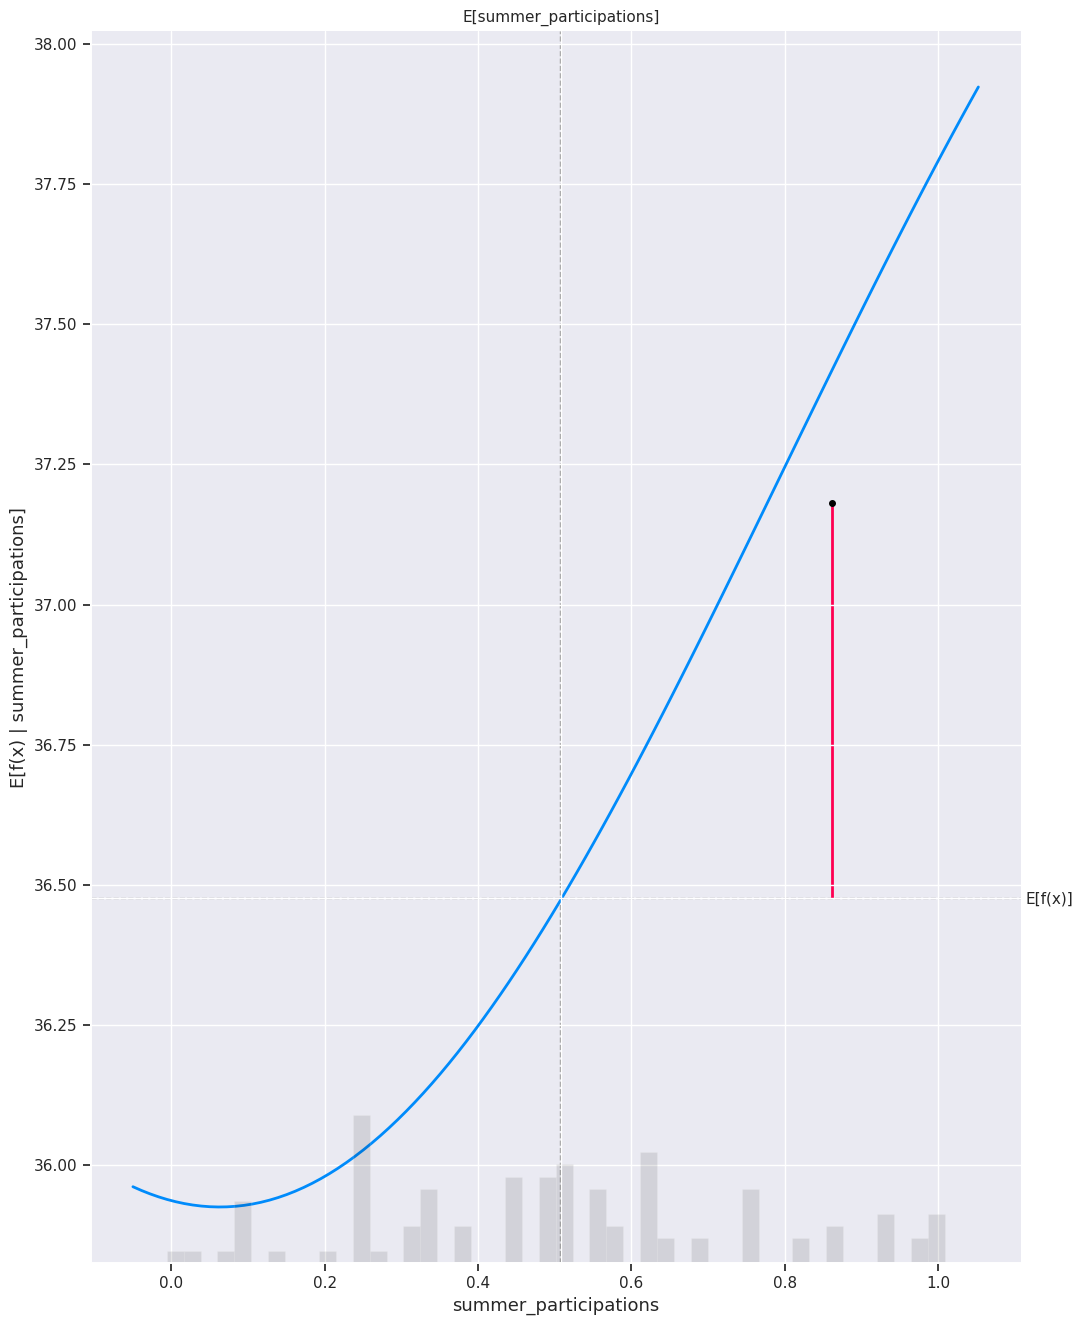

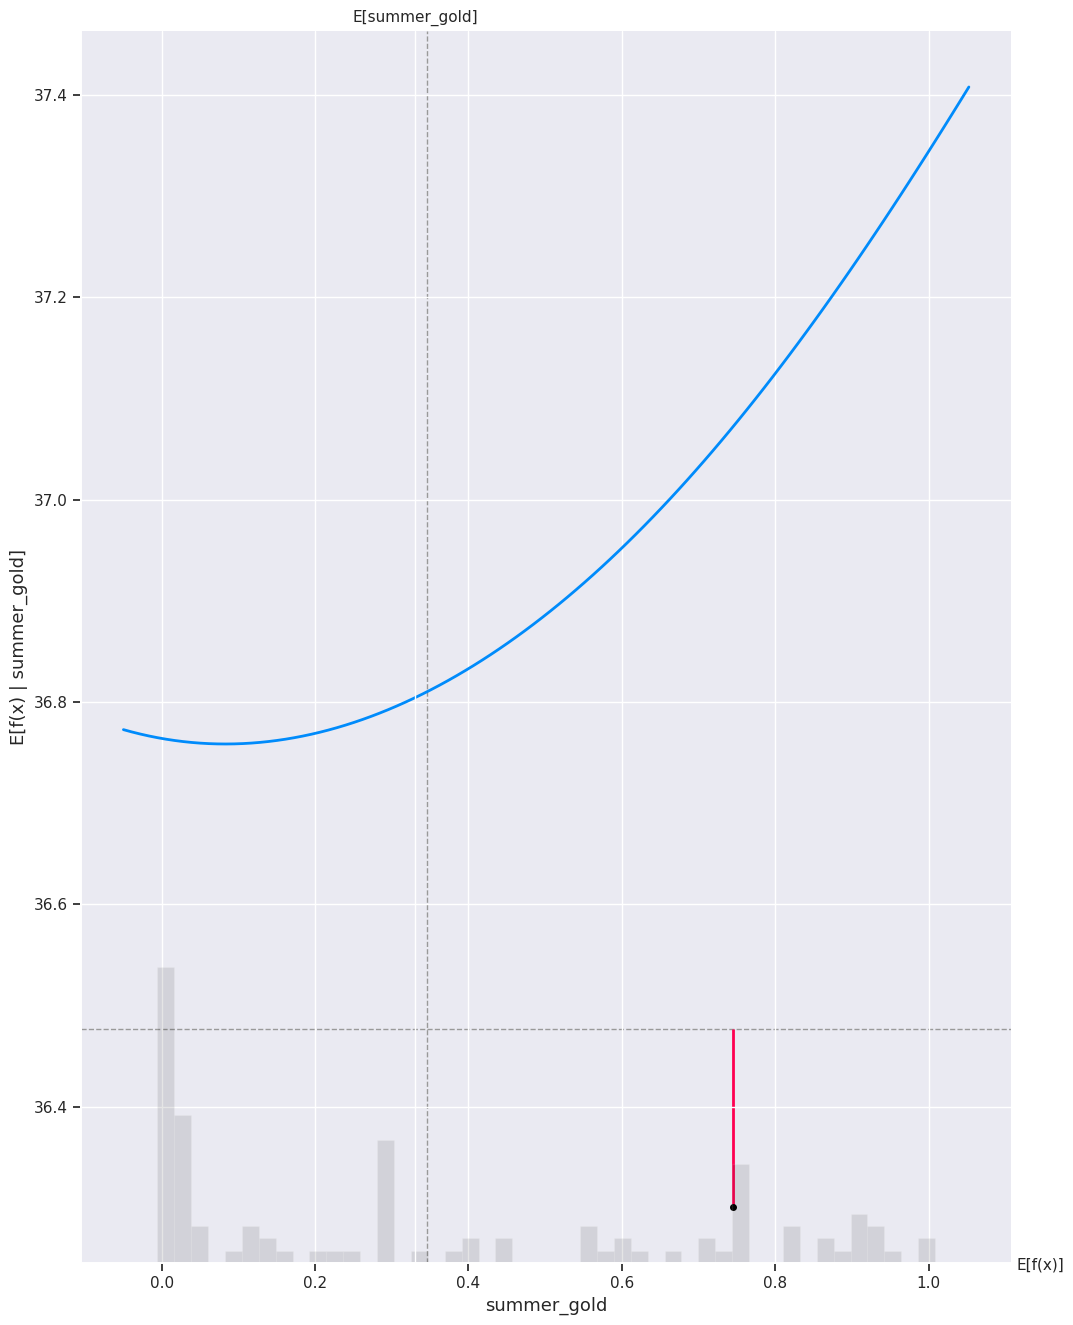

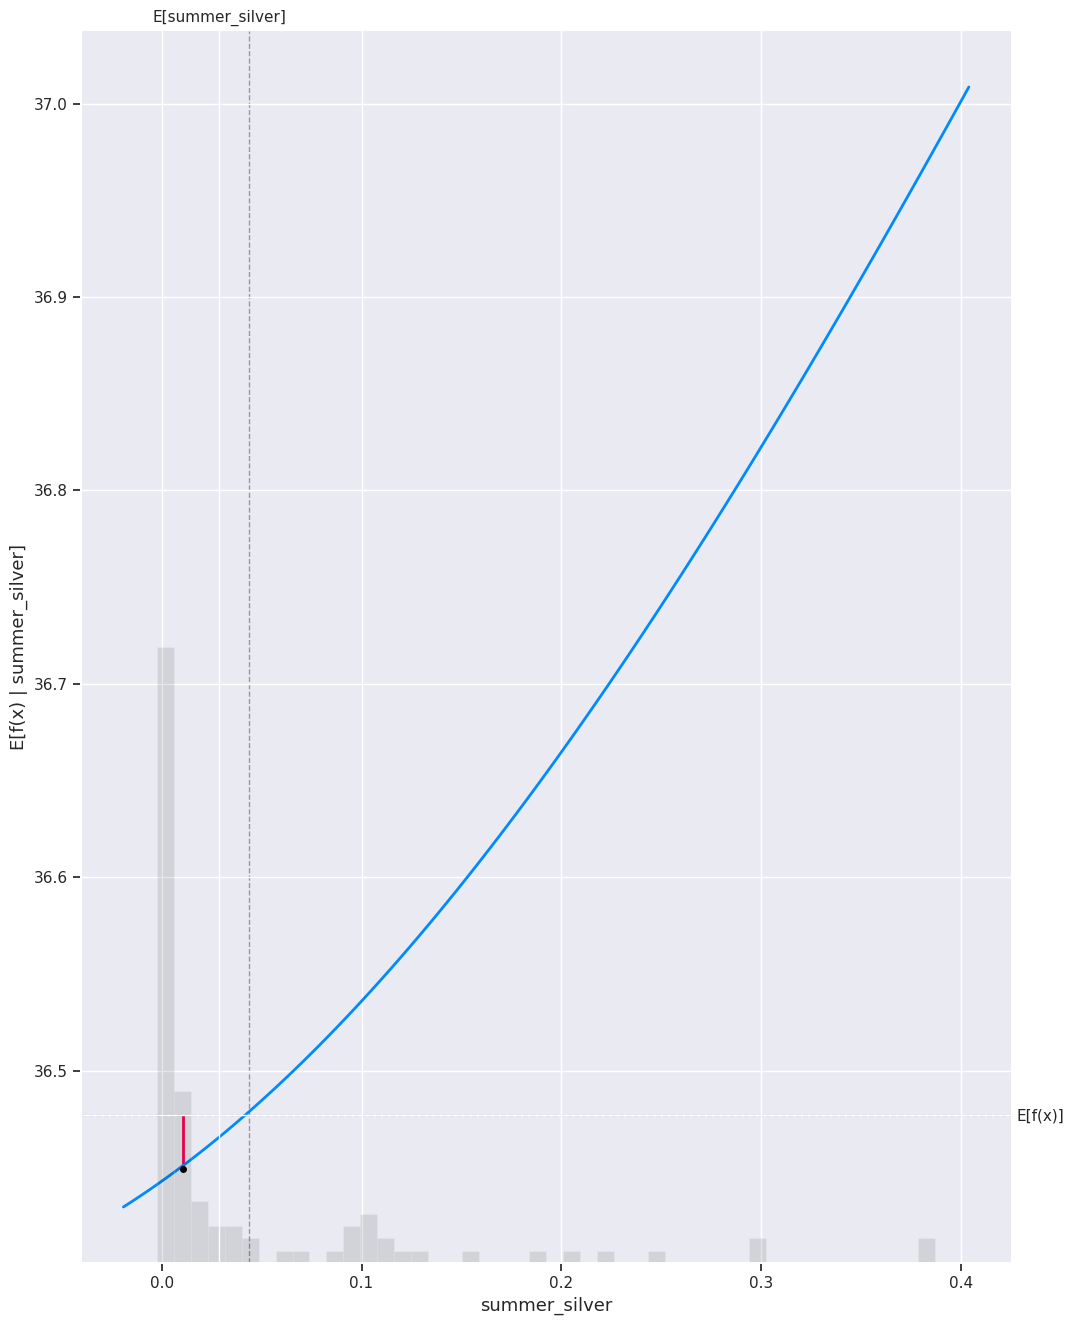

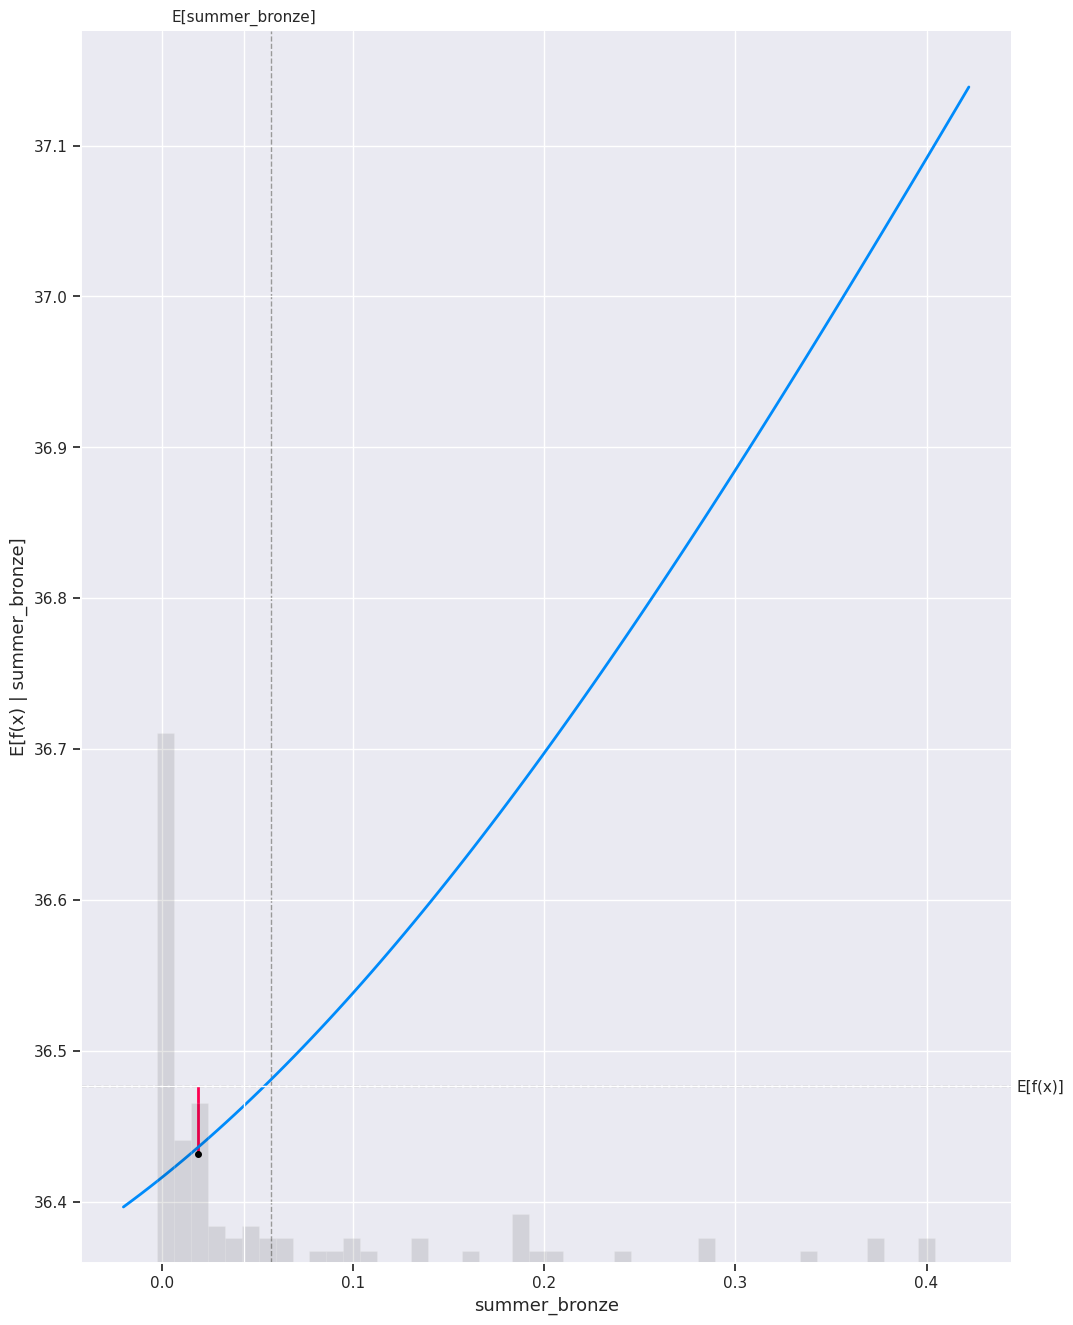

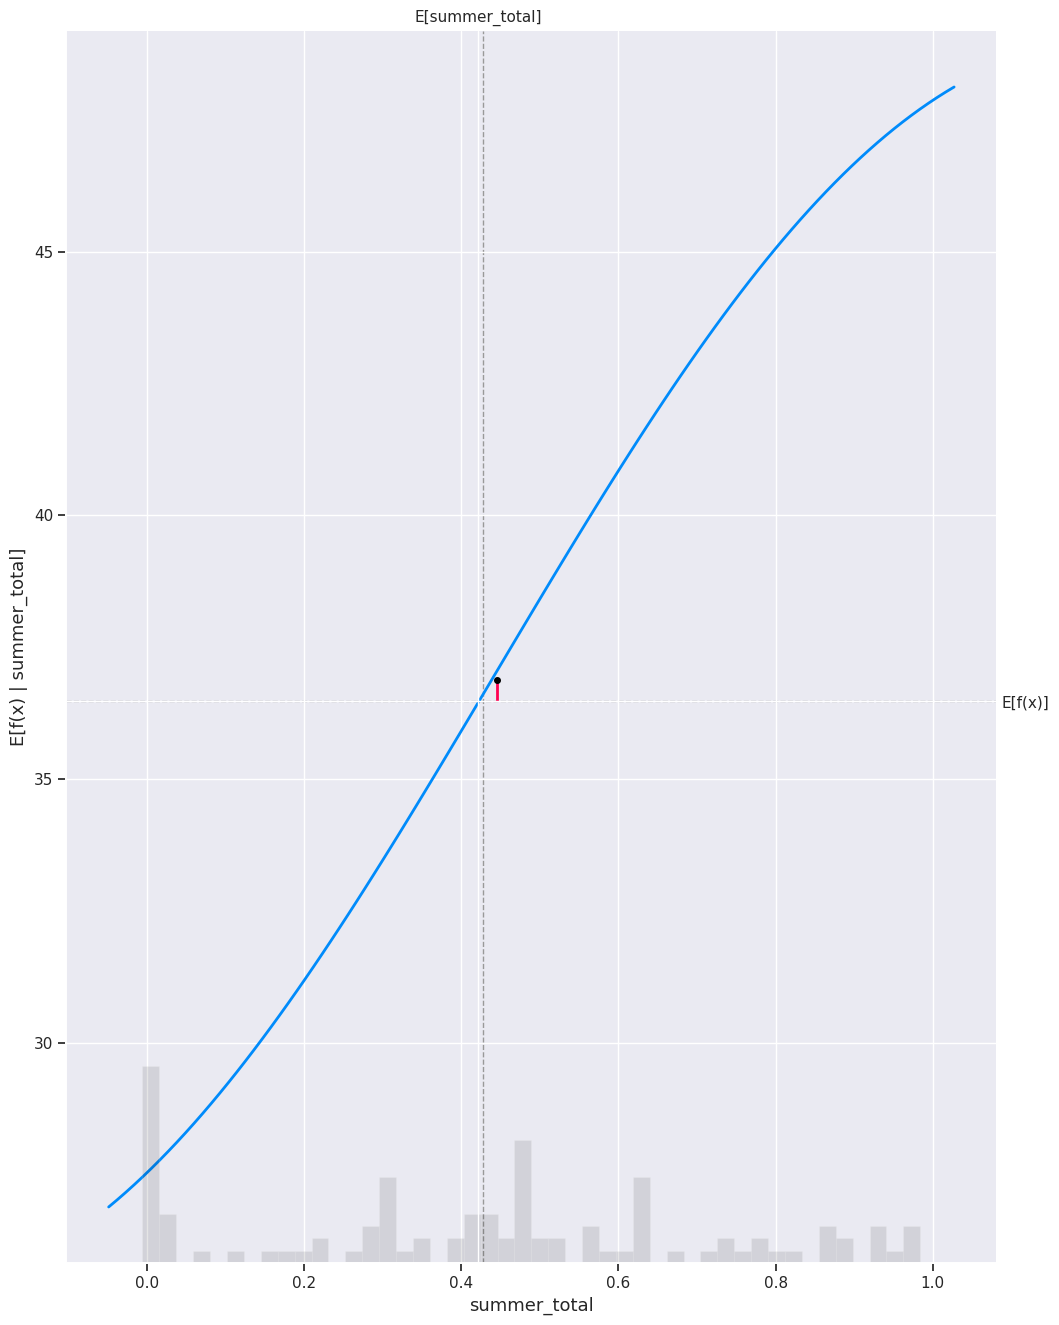

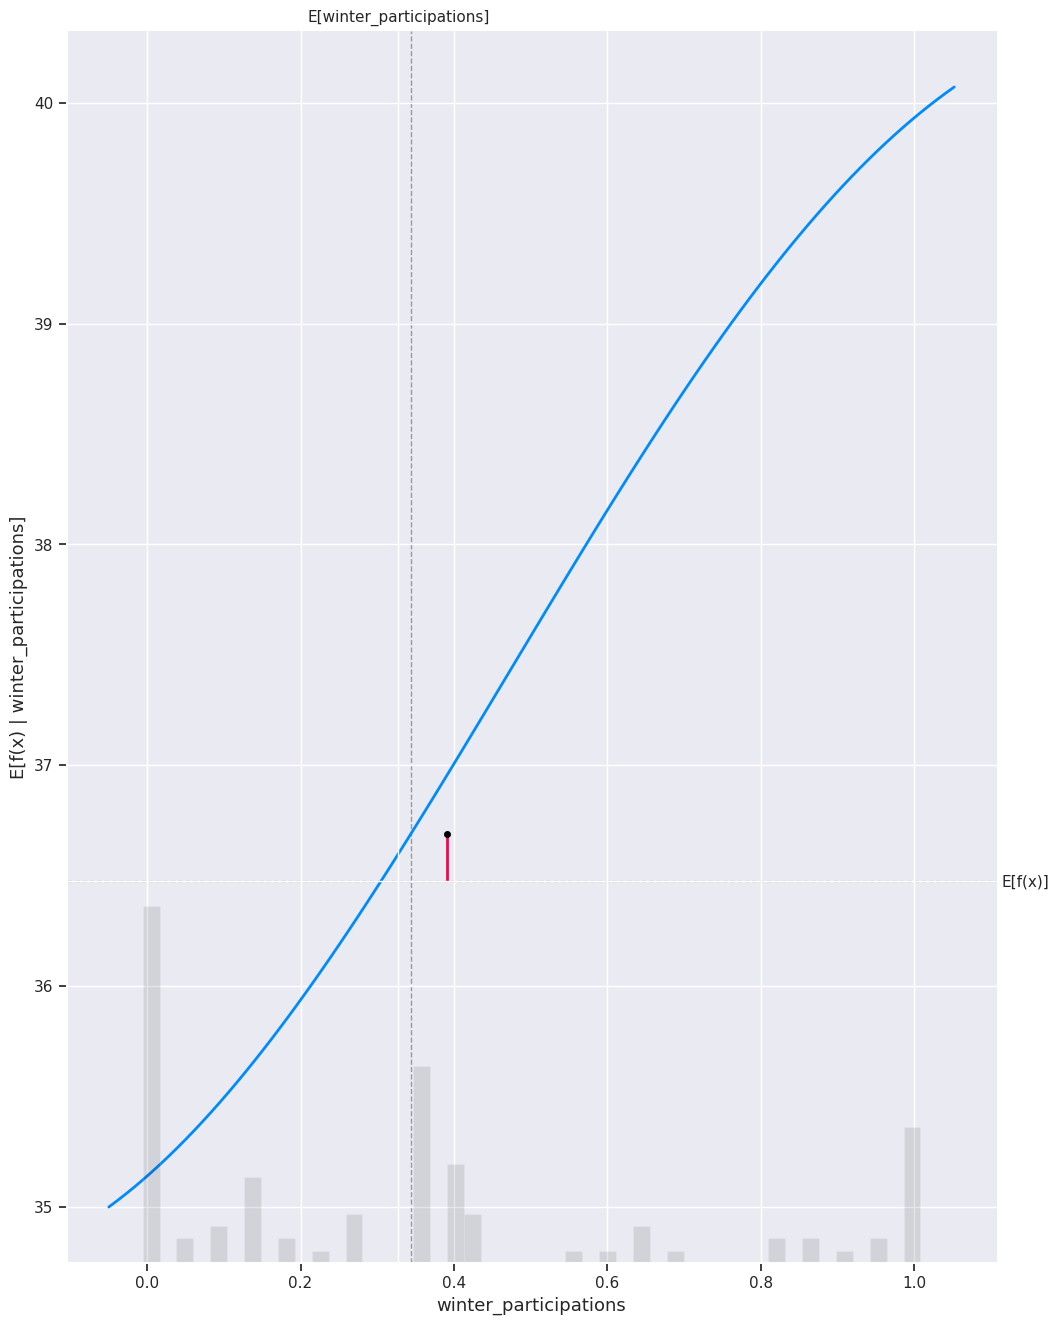

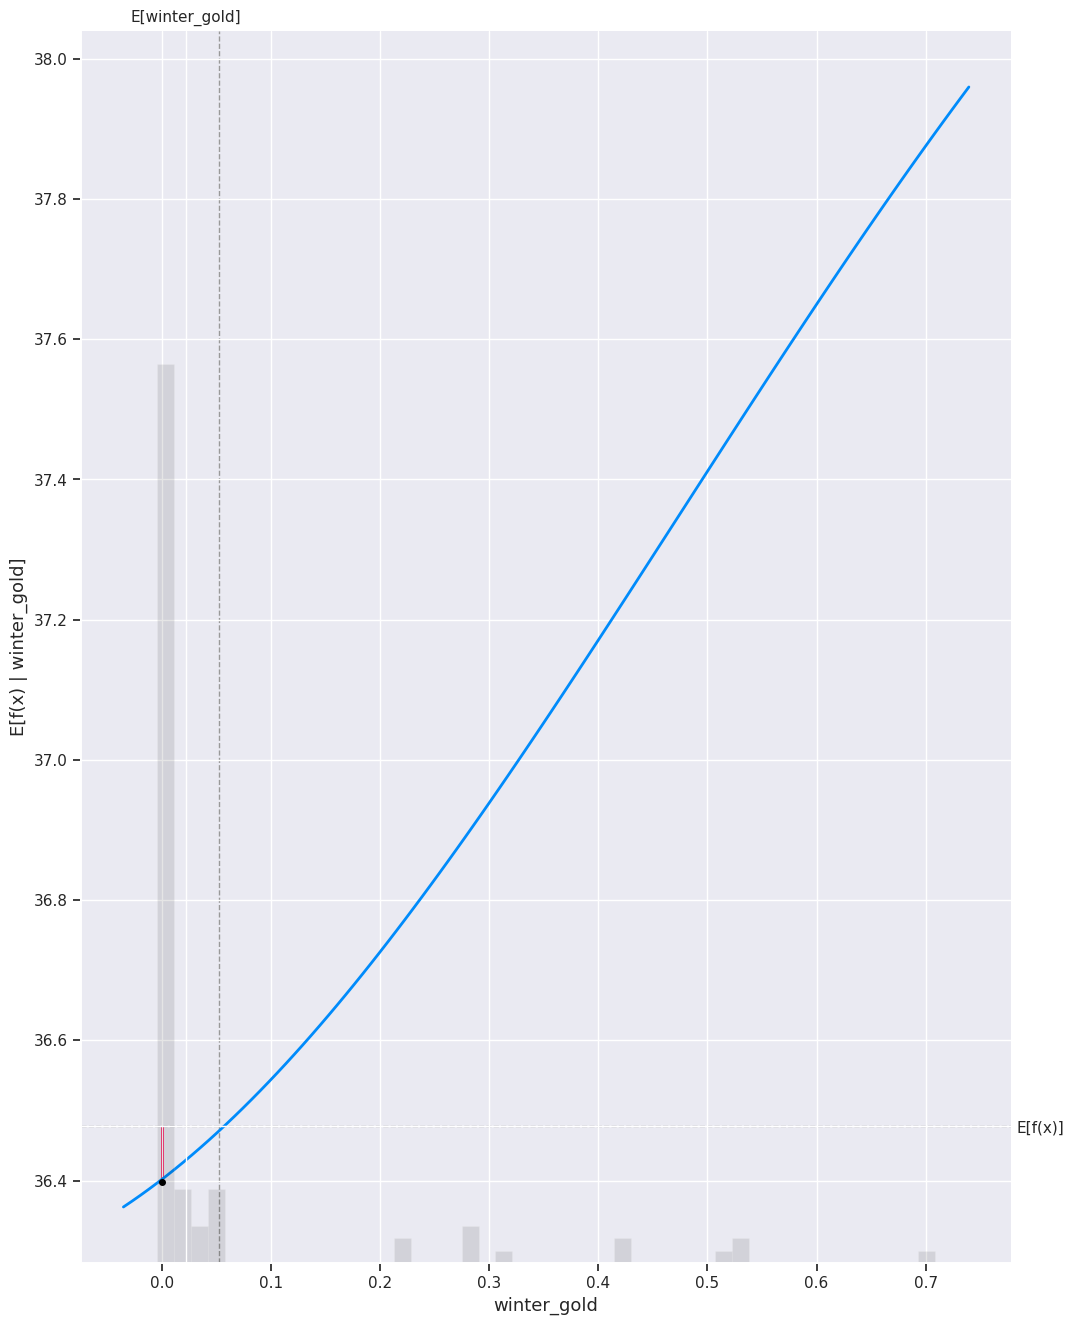

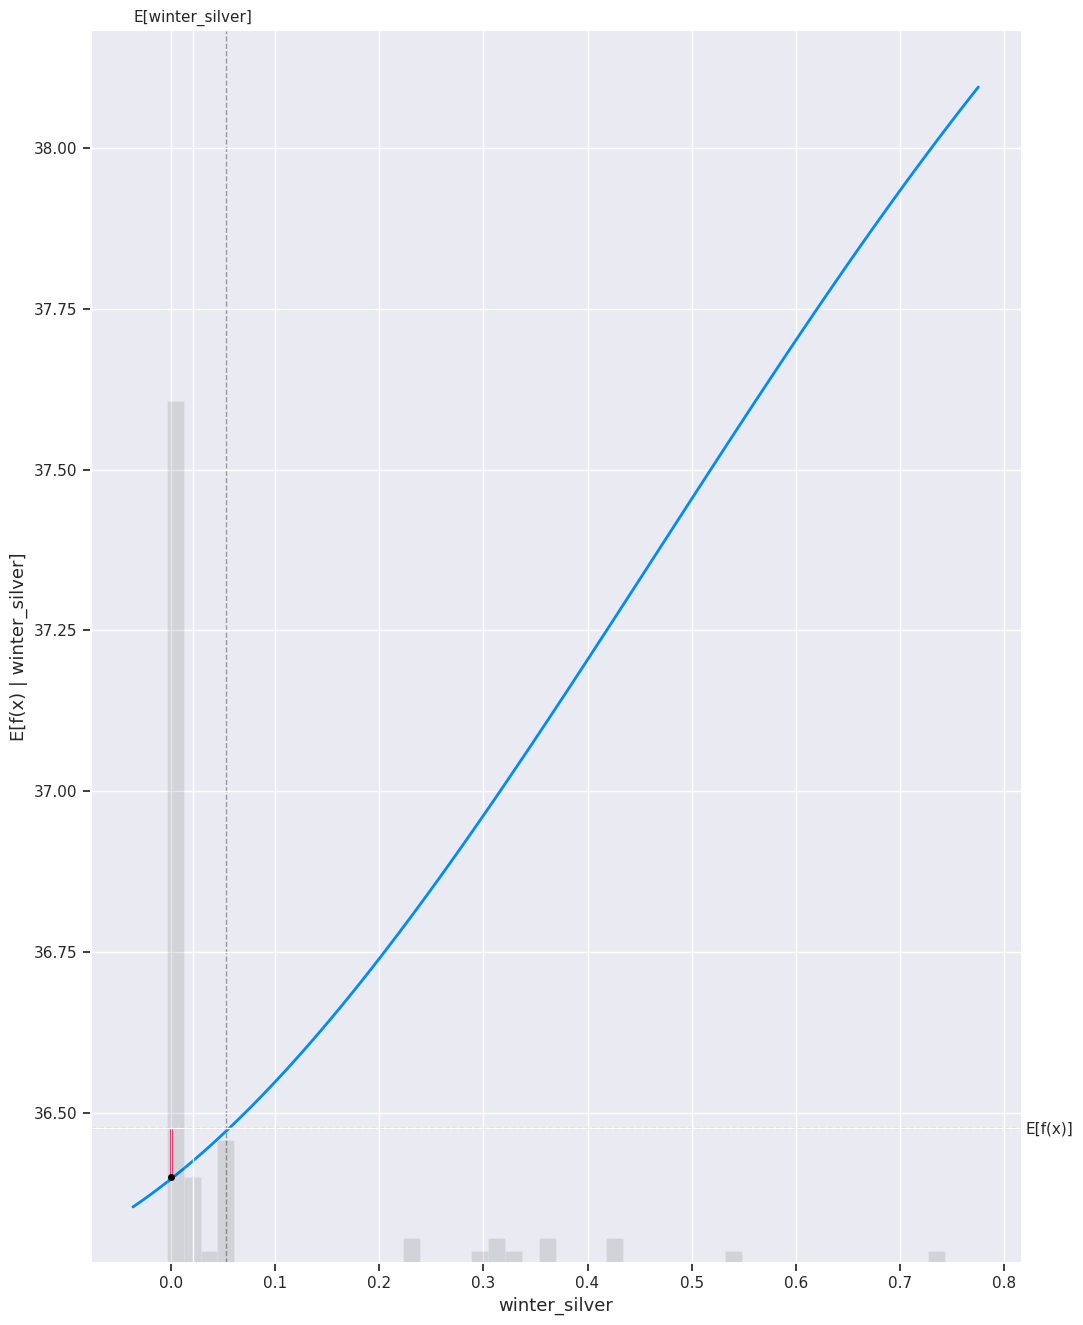

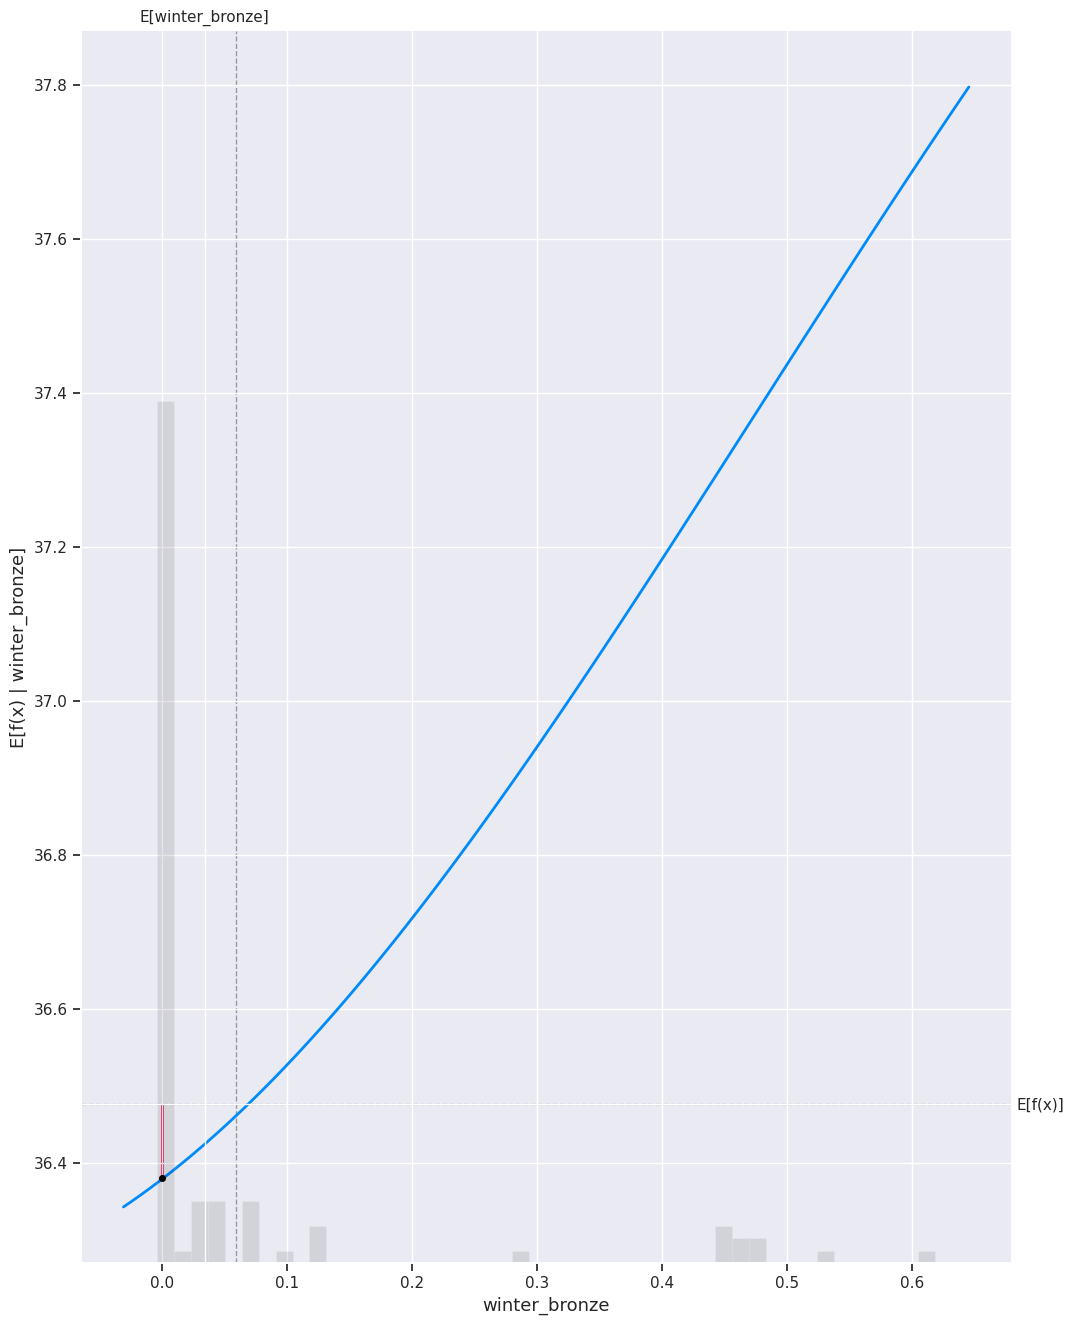

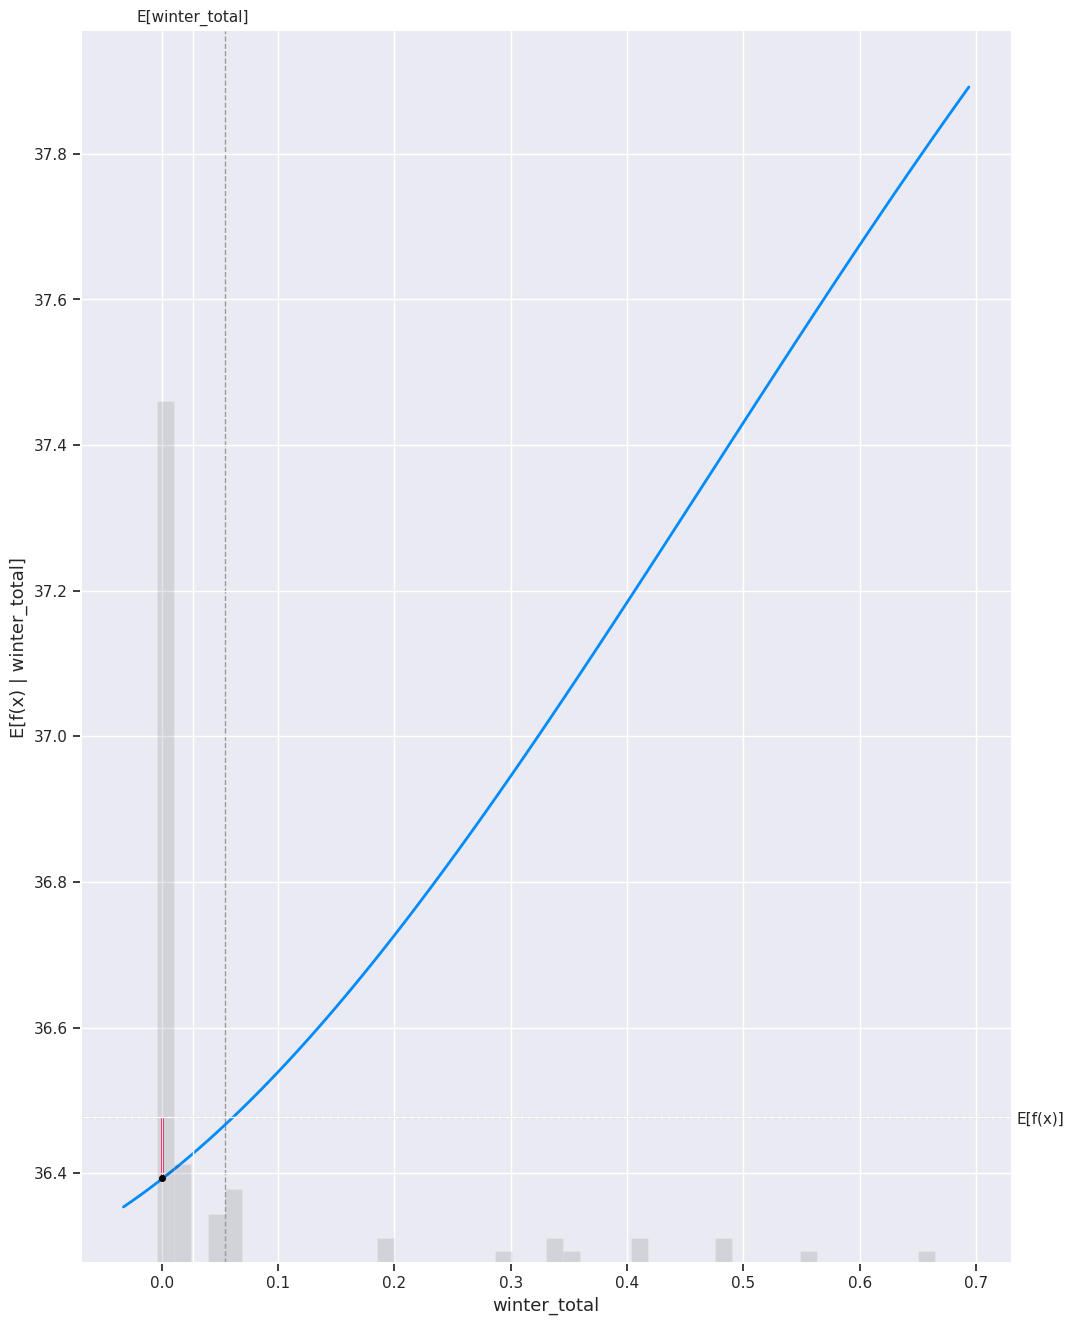

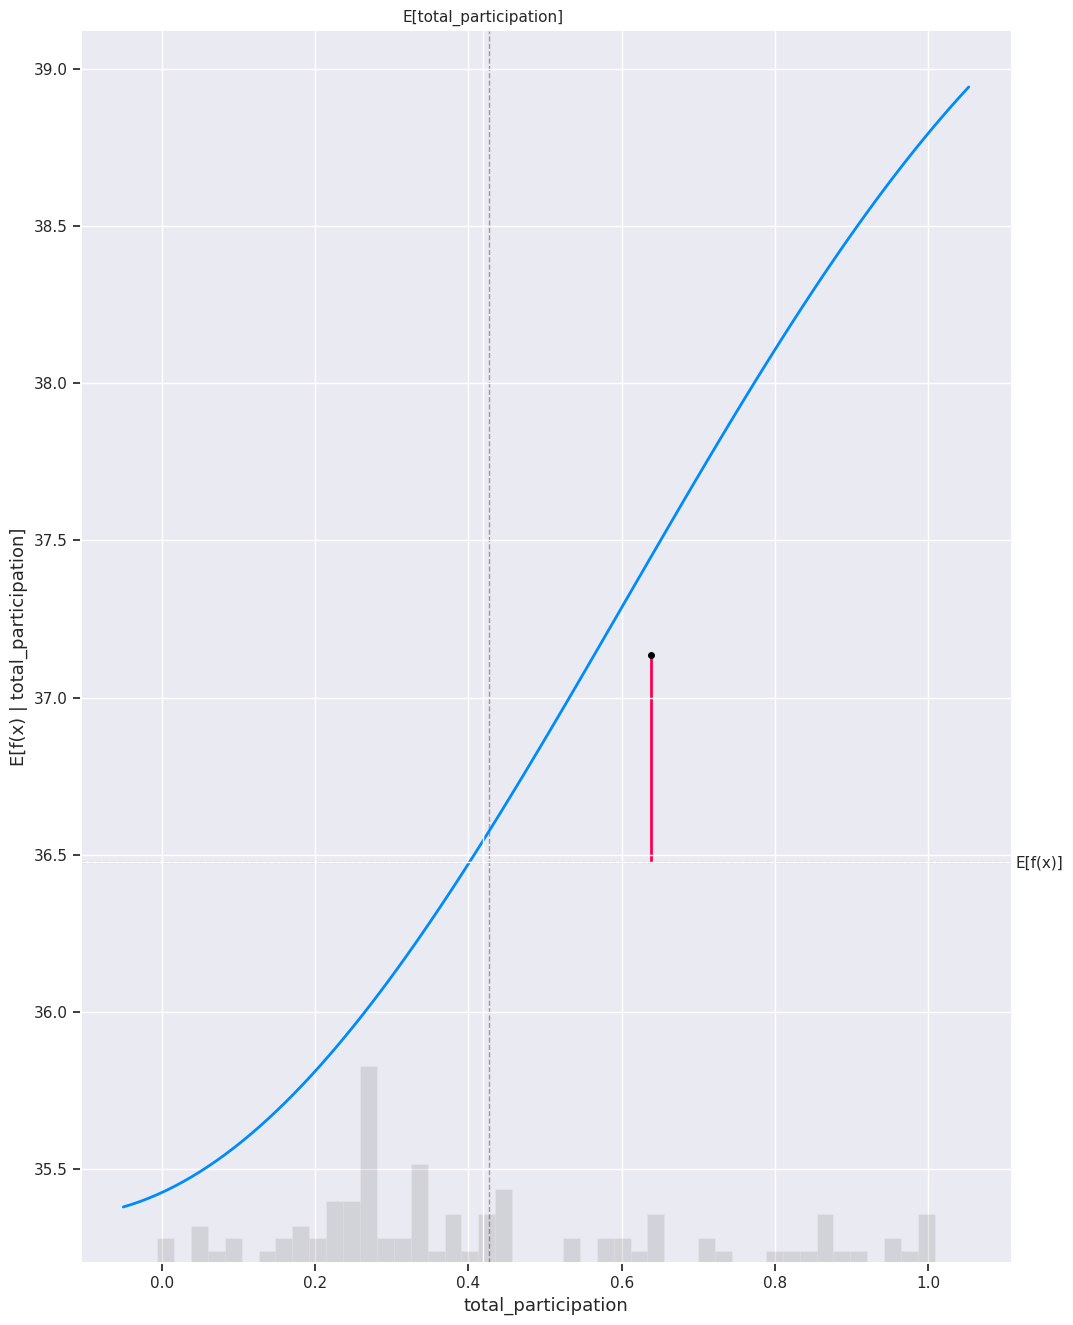

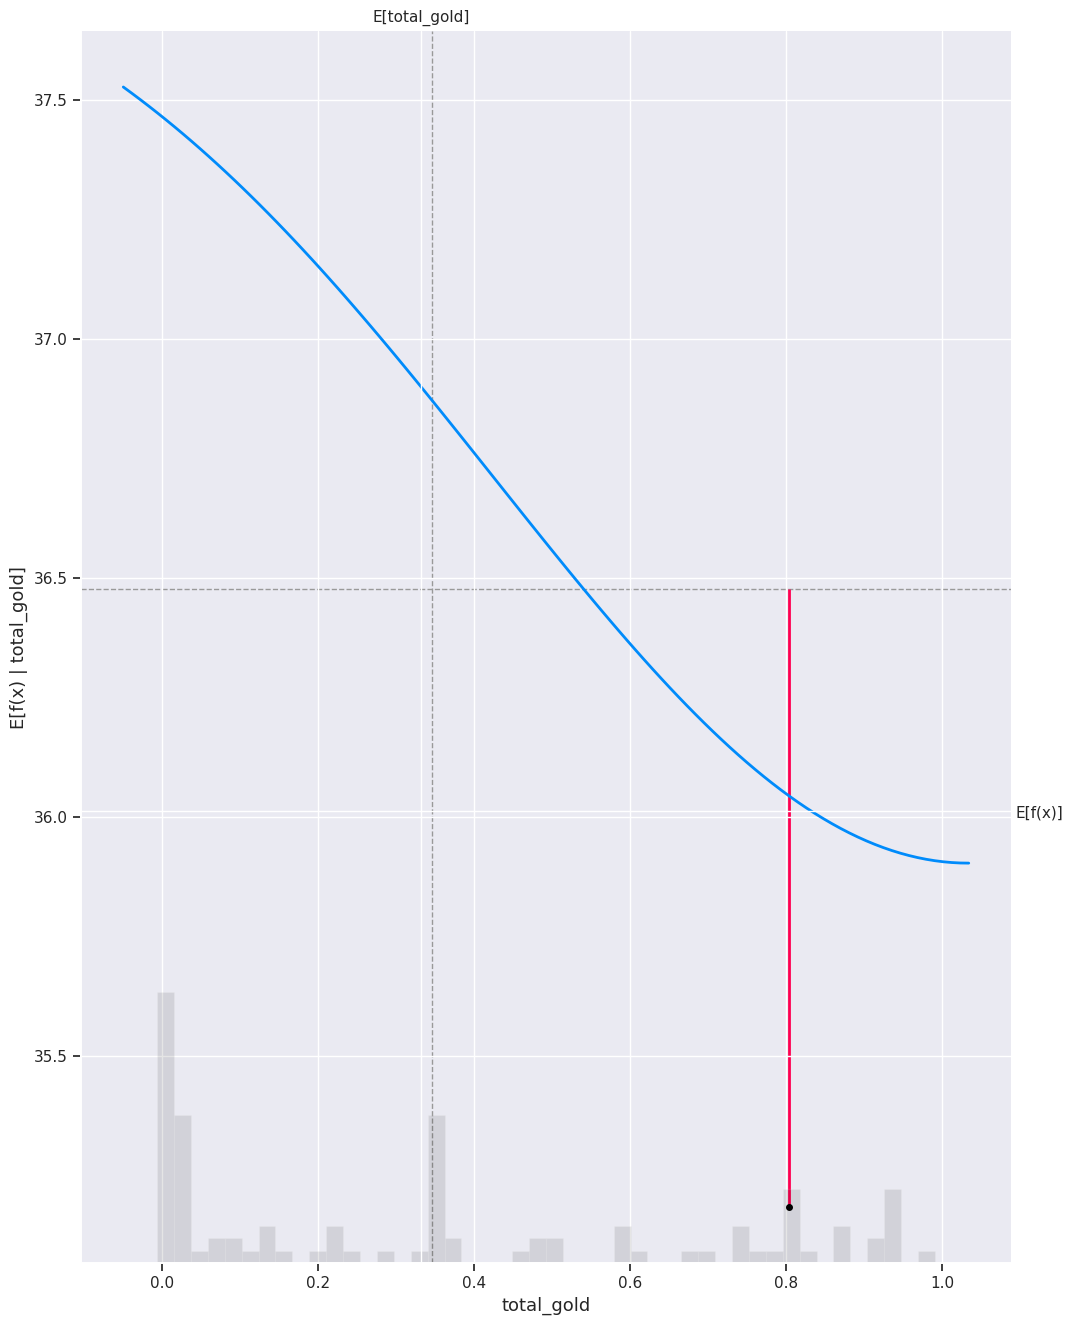

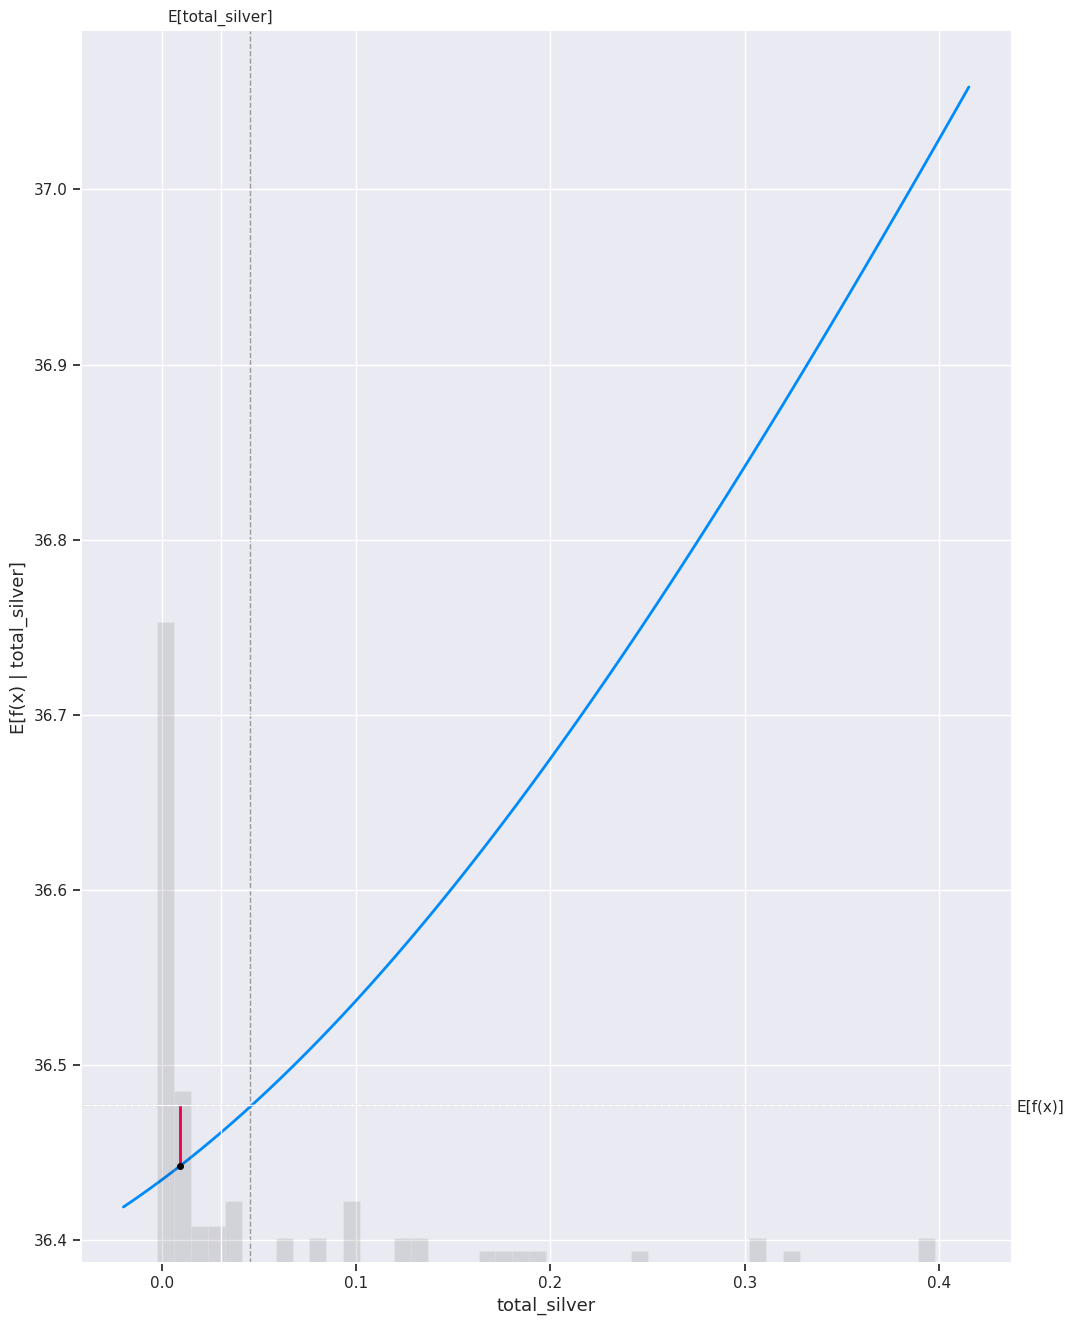

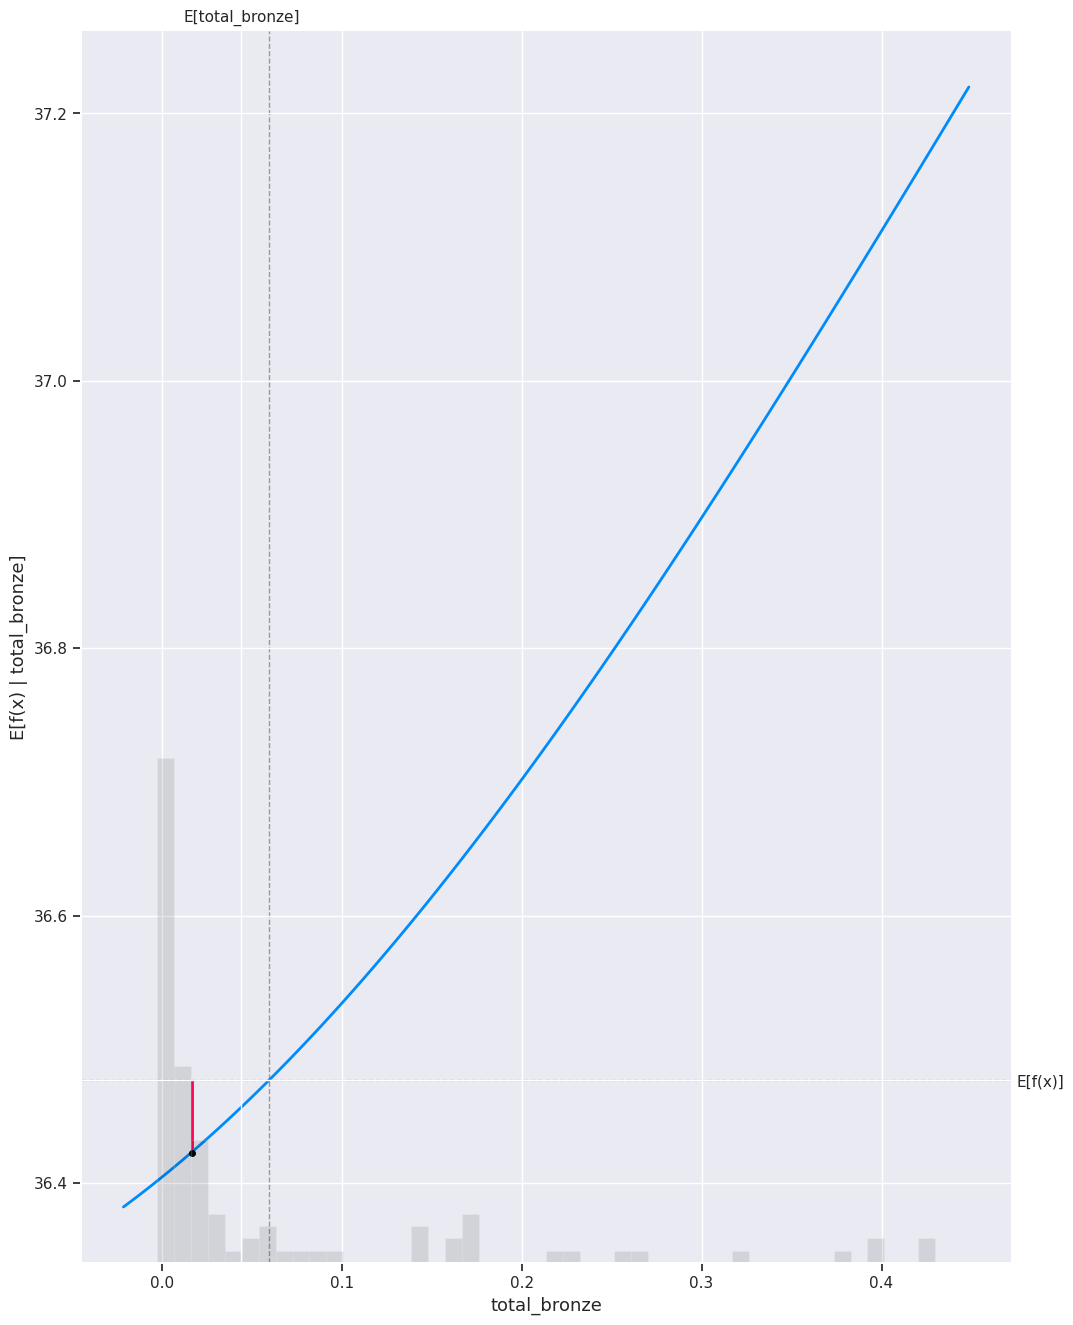

In [150]:
for i in x_train_100.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        svm_model.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=svm_shap_values[sample_ind : sample_ind + 1, :],
    )

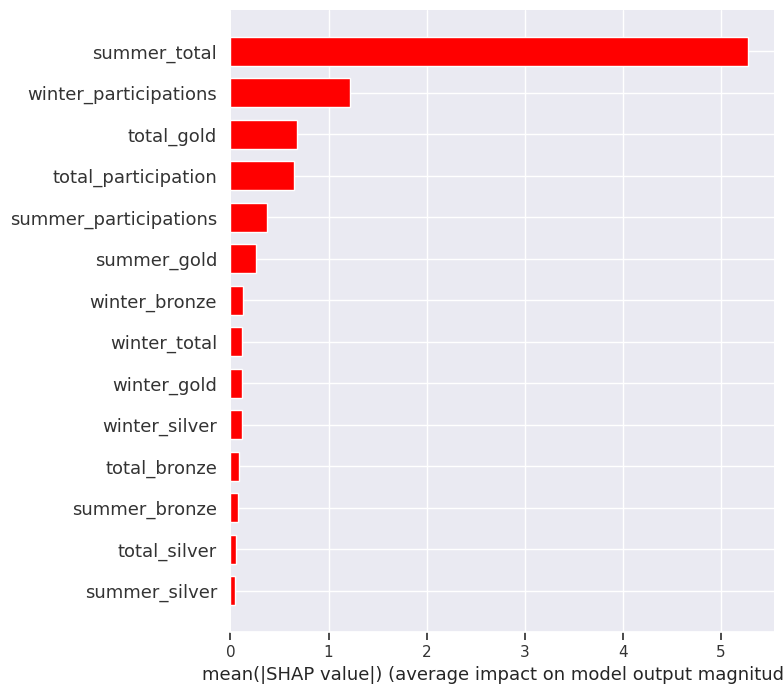

In [151]:
# SHAP variable importance for a Linear Model
shap.summary_plot(svm_shap_values, x_train, plot_type="bar", color="red")

# **Interpreting SHAP Feature Importance Plot for Linear and Tree-based model**



In [152]:
# Waterfall plot for linear model
def get_SHAP(index=18):
    shap.plots.waterfall(svm_shap_values[index], max_display=14)

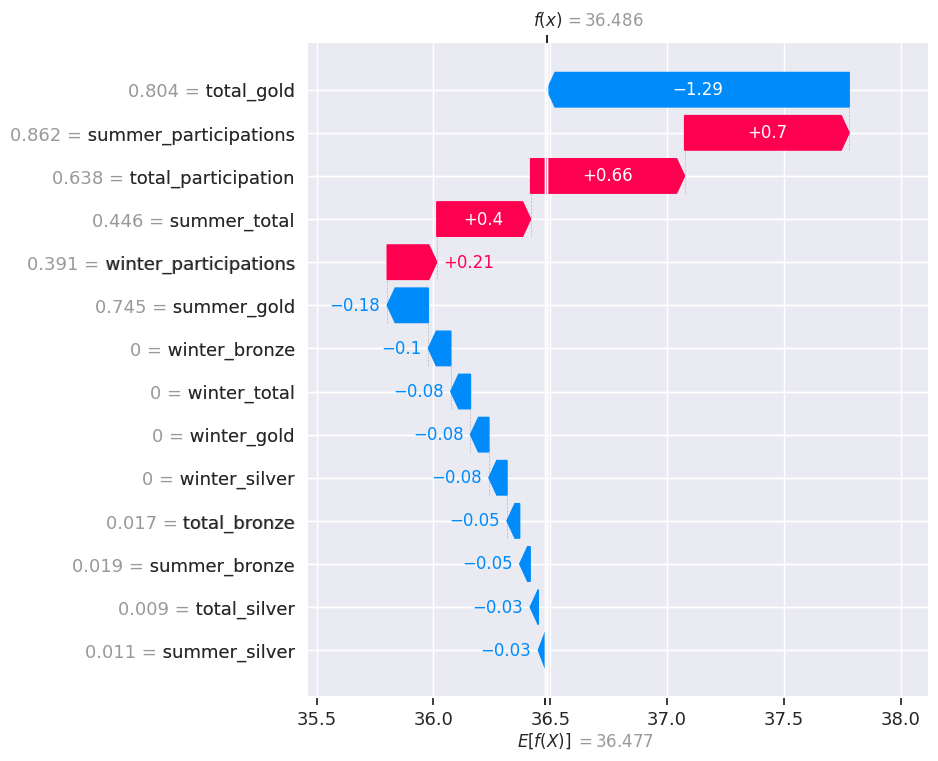

In [153]:
get_SHAP()

Interpreting Waterfall SHAP visualization
Let's consider the same sample 
It says that f(x) = 36.486 is what we got as a model output and the expected output for this sample was 36.477. We came pretty close to determining it as the difference is only 0.009. The waterfall model explains how we got the expected output, and which features contributed to what. The below graph shows that summer_participations has the biggest impact by 0.7 for this specific sample.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


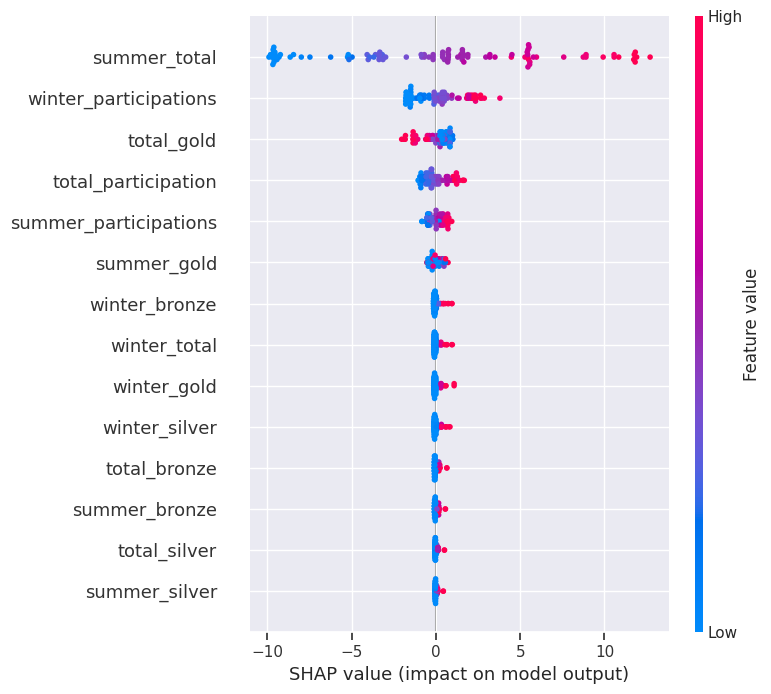

In [154]:
# SHAP summary for Linear Model
shap.summary_plot(svm_shap_values, x_train_100)

Interpret the summary plot SVM Model
Here the features are listed in descending order of their importance. This is one of the easiest ways to analyze an ML model and how the features are affecting the target and to what extent.

Each dot(both red and blue) represents a feature of a olympic medal tally for that particular season
Red color represents high values whereas blue color represents low value
If a dot(a feature of medal) is on the right side of the y-axis then it had a positive impact and if it is on the left side of the axis it had a negative impact
The position of a dot(a feature of olympic medal) on the x-axis represents the intensity of impact it had, the more it is away from the axis greater the intensity.
Let us try to understand how the features are affecting the model.


We could also interpret the intensity of impact

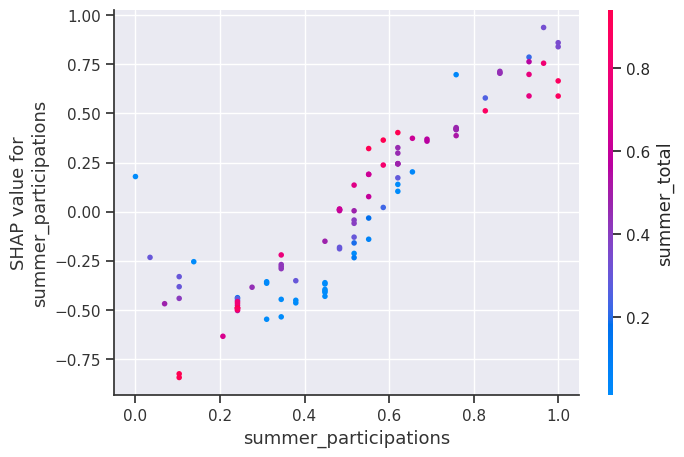

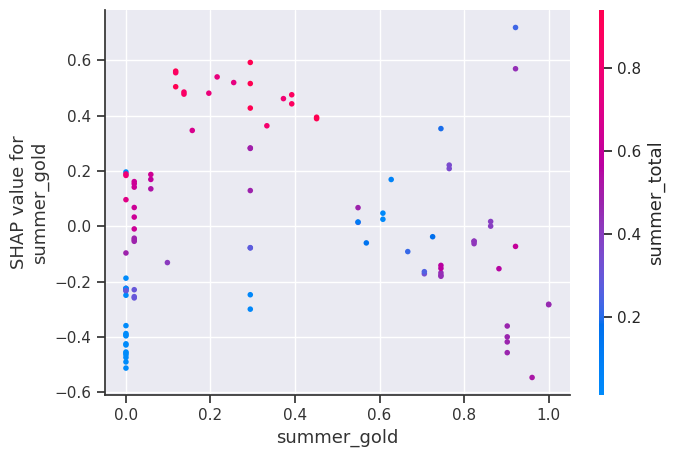

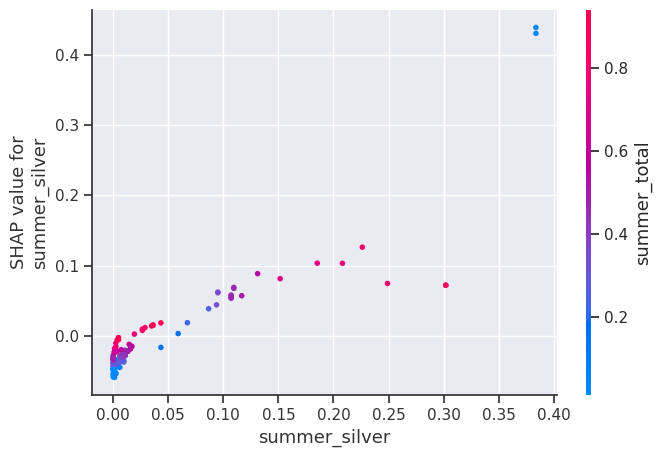

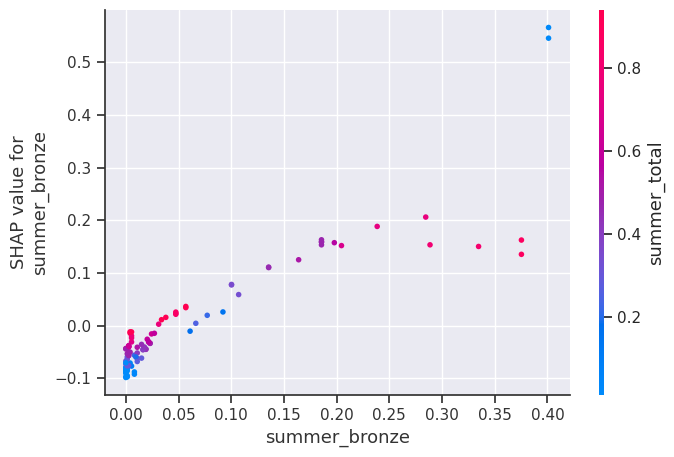

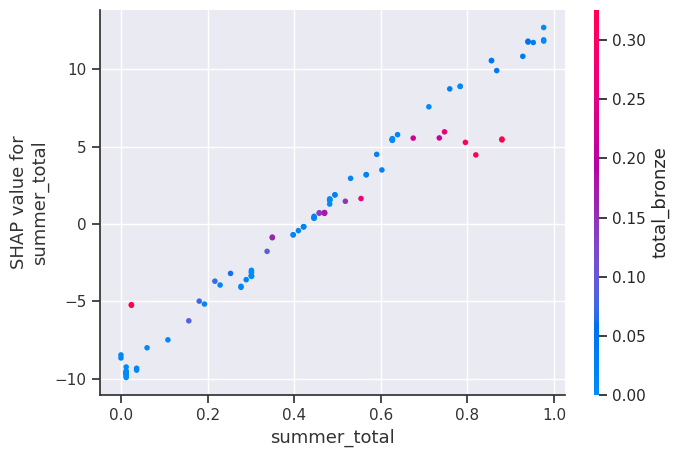

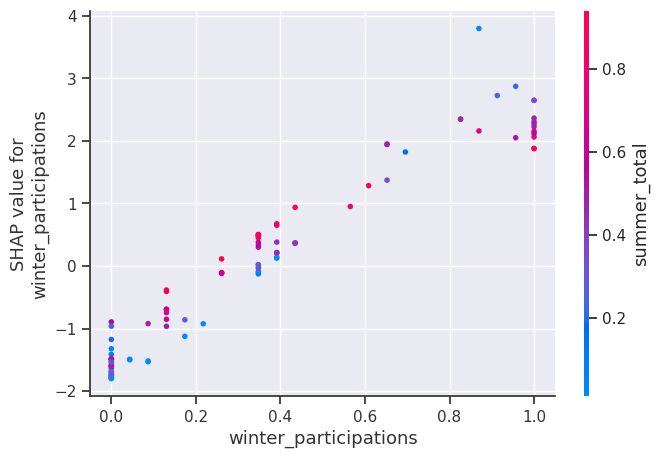

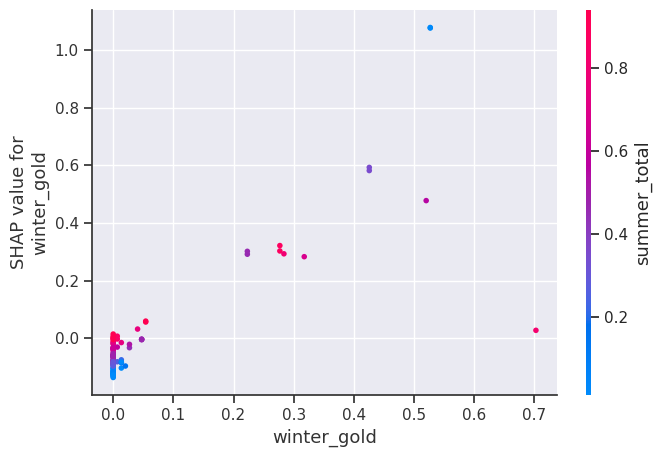

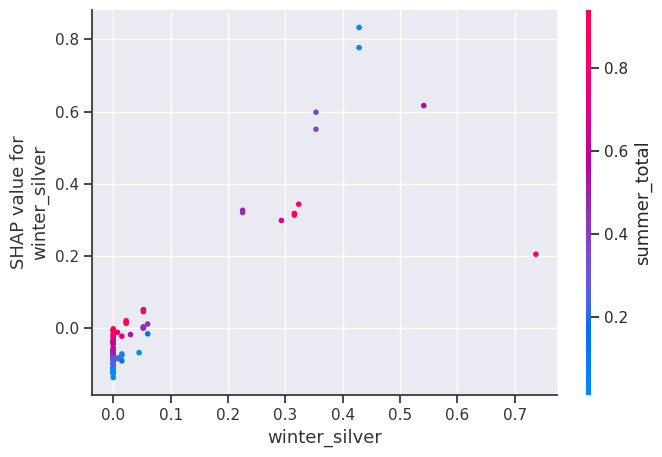

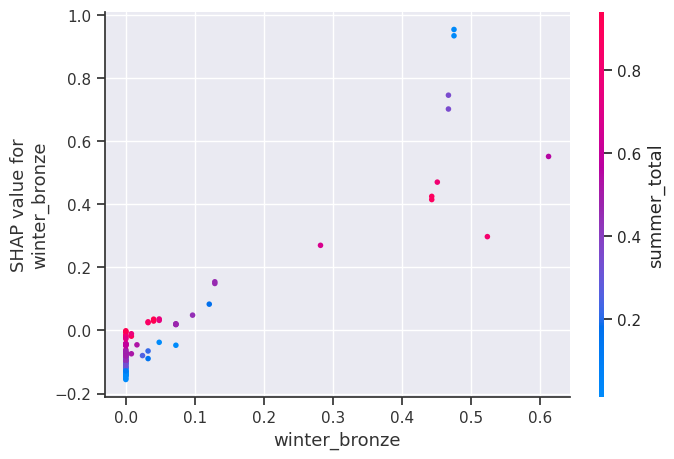

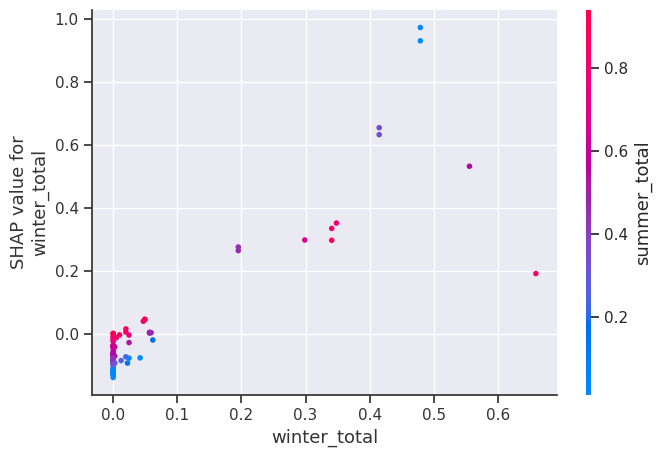

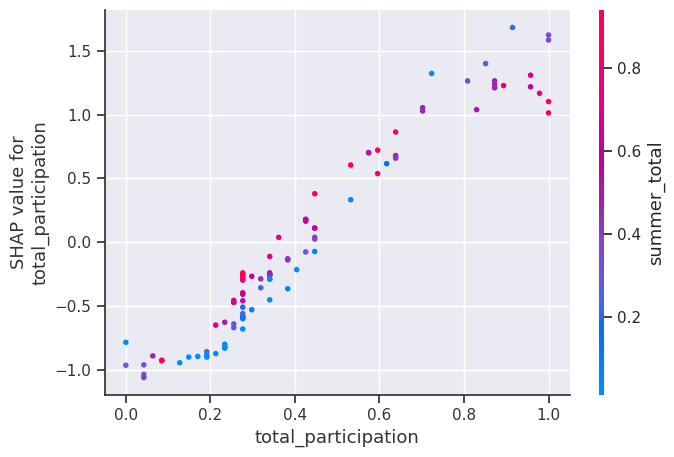

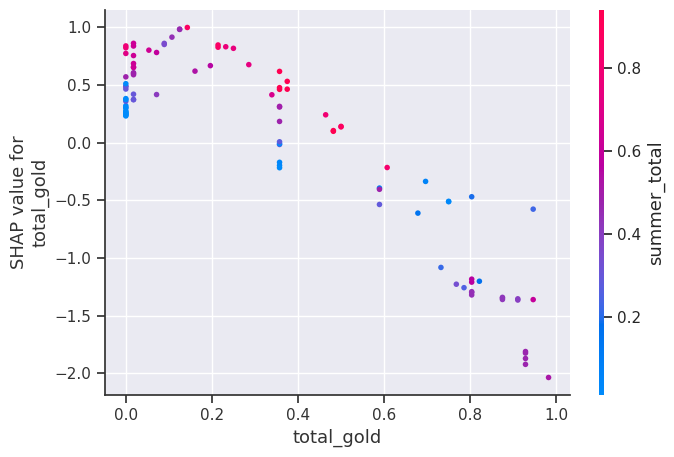

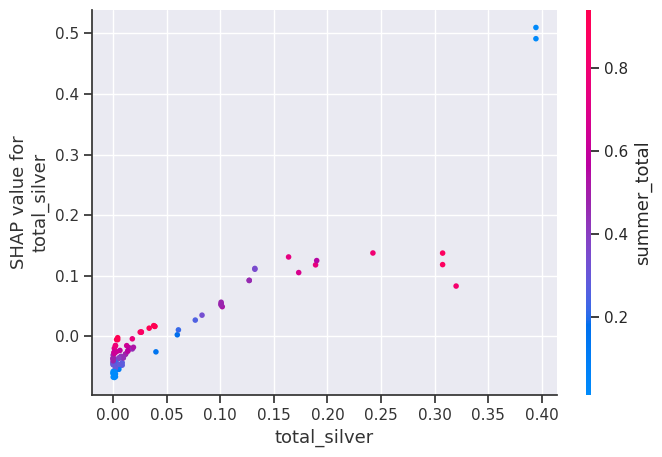

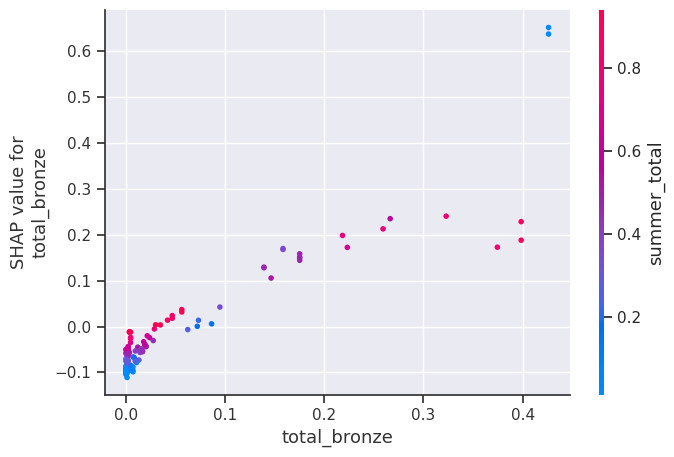

In [155]:

# SHAP partial dependence plot for a tree based model
for i in x_train.columns:
    shap.dependence_plot(i, svm_shap_values.values, x_train_100)

# **Heatmap Visualization for Linear and Tree-based model**
## **This visualization is a summarization of the entire dataset on how each data point in every feature is affecting the target(medals tally).**
Here the Y-axis is Features
and X-axis is Instance of that feature
The color of the instance defines if it had a positive effect or negative effect by its color. If the instance is red then it had a positive effect and if the instance is blue then it had a negative effect
The intensity of the color is directly proportional to the intensity of the effect. Deeper the color, the more impactful the feature is .

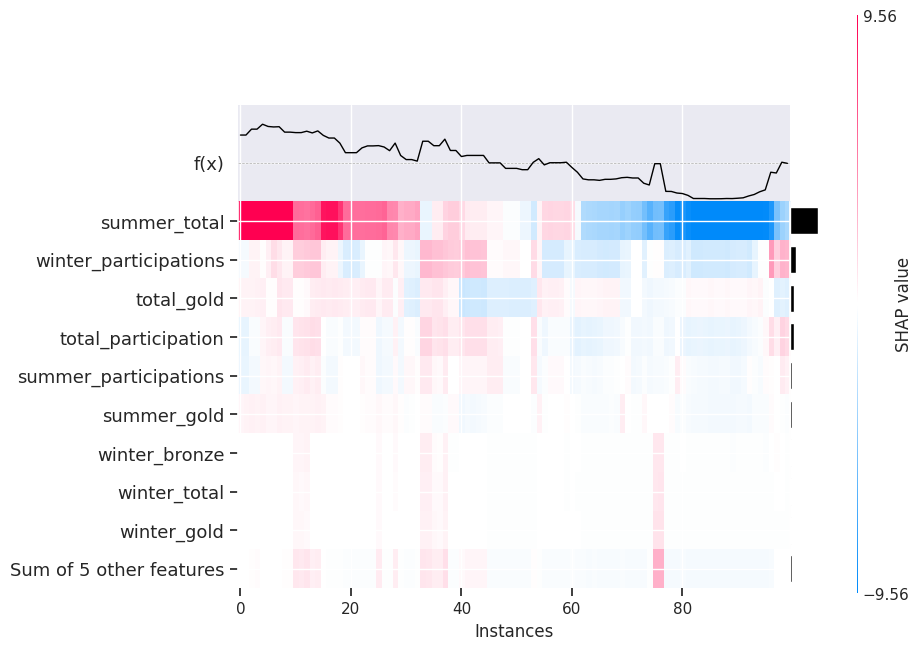

In [156]:
shap.plots.heatmap(svm_shap_values)  # SHAP HeatMap of a Tree Based Model


# `**Interpreting AutoML's best model with tuned hyperparameters**`
# **How are errors/residuals distributed and how interpretable is your model ?**
*Residual Analysis*

Here, we can see the striped lines of residuals, which is an artifact of having an integer value as a response value, instead of a real value. It can also be observed from the below graph that residuals are normally distributed. Residuals signify that residuals don't have heteroscedasticity.
Variable Importance

In the variable importance plot we can observe that the plot replicates the results which we got from the Linear Model and Tree-Based Model above. The variable importance has been scaled between 0 to 1 for ease of understanding

In [157]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [160]:
import sklearn
print(sklearn.__version__)


1.2.2


In [161]:
!pip install -U scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

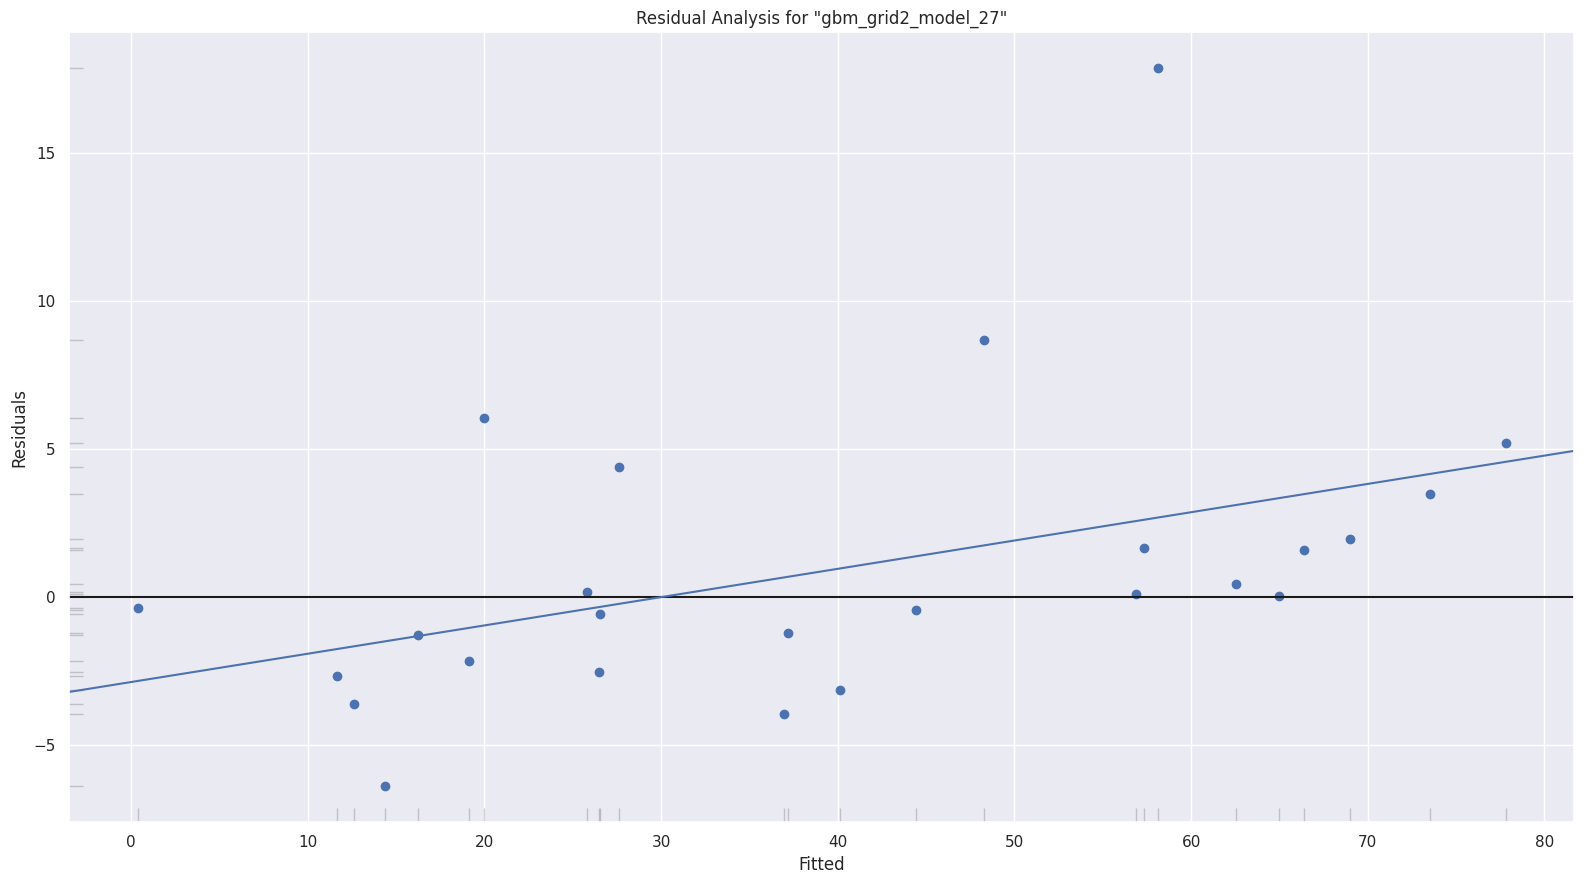

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

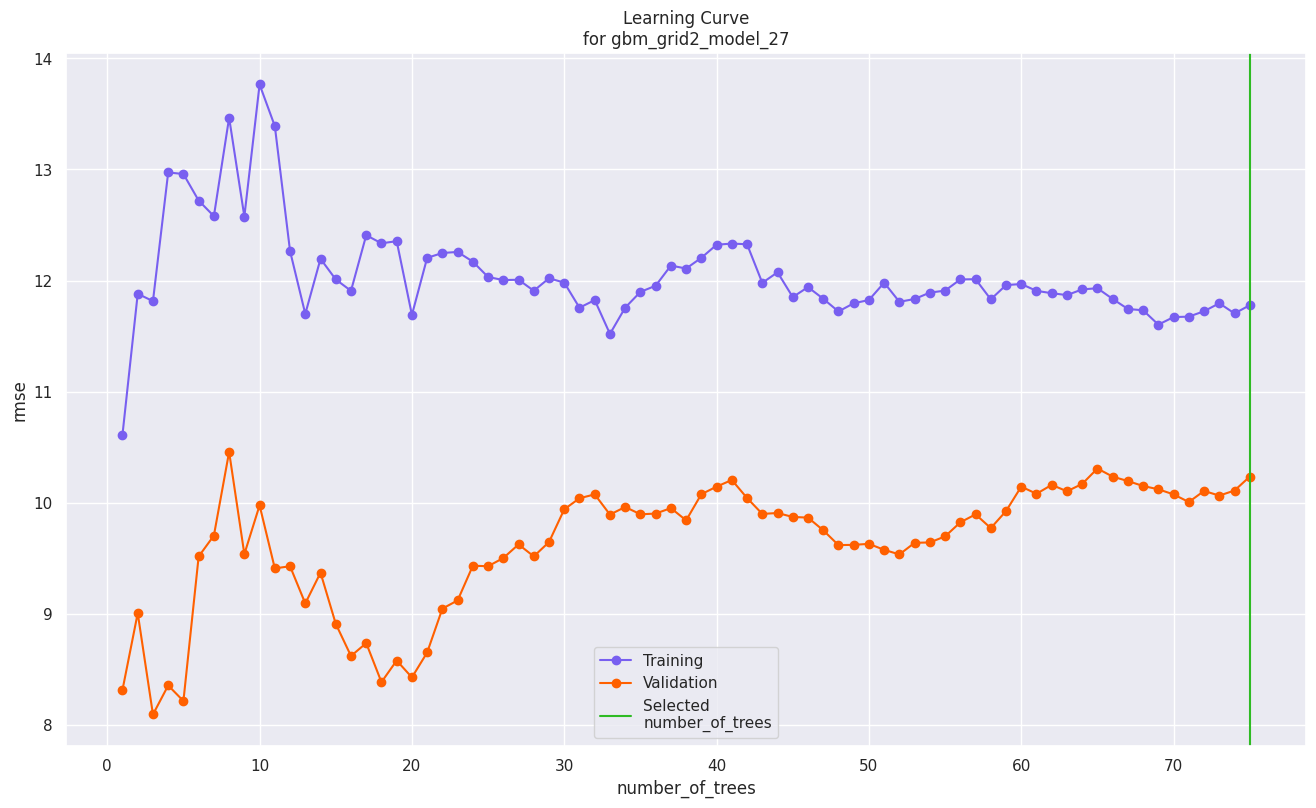

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

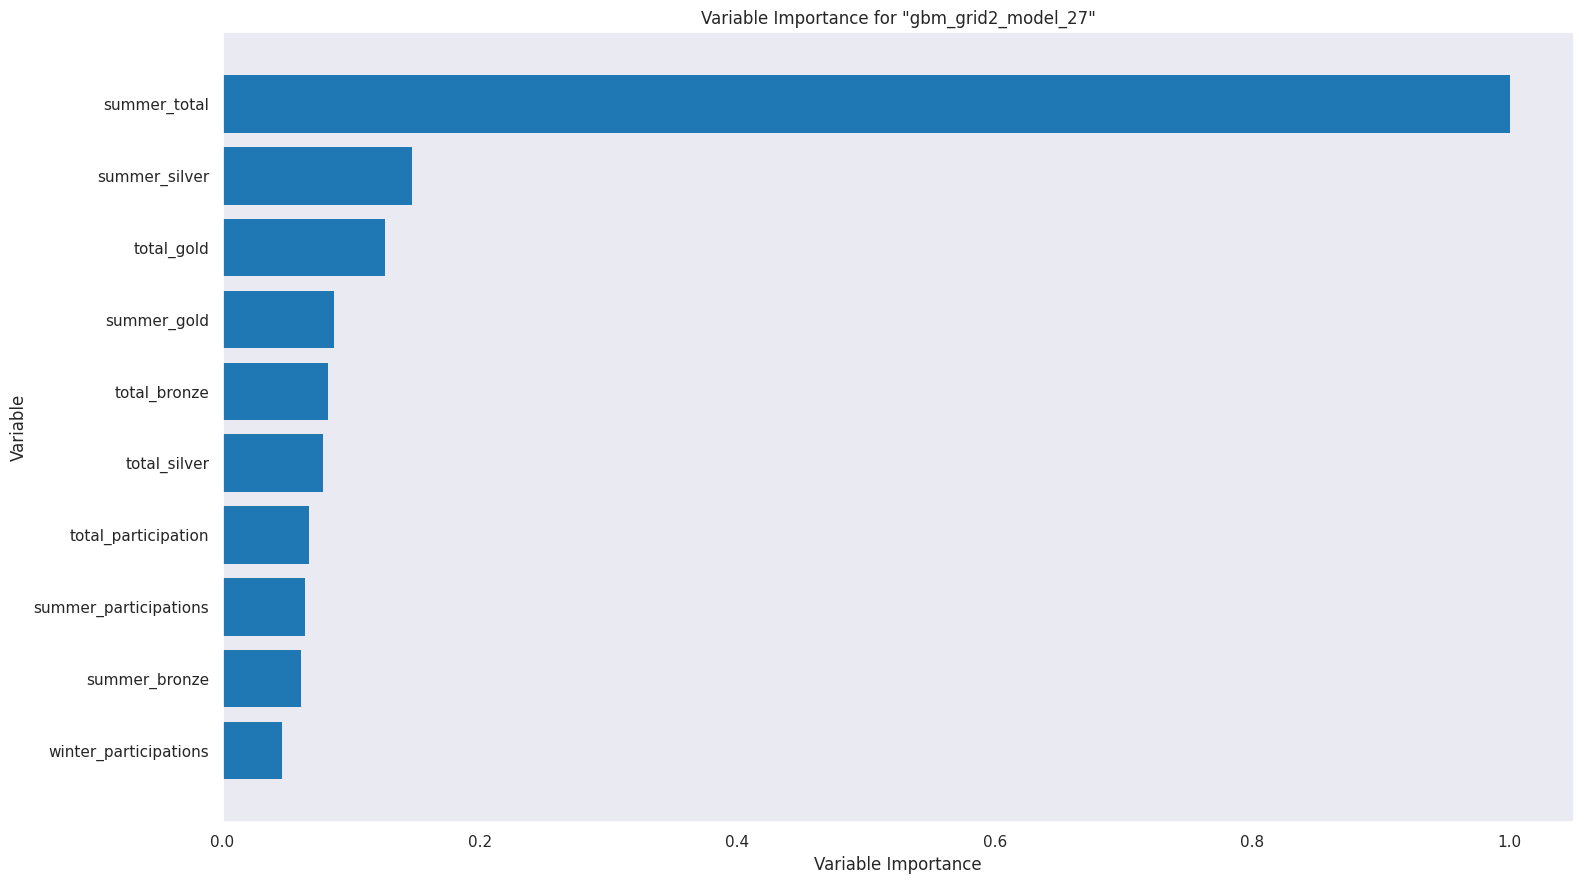

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

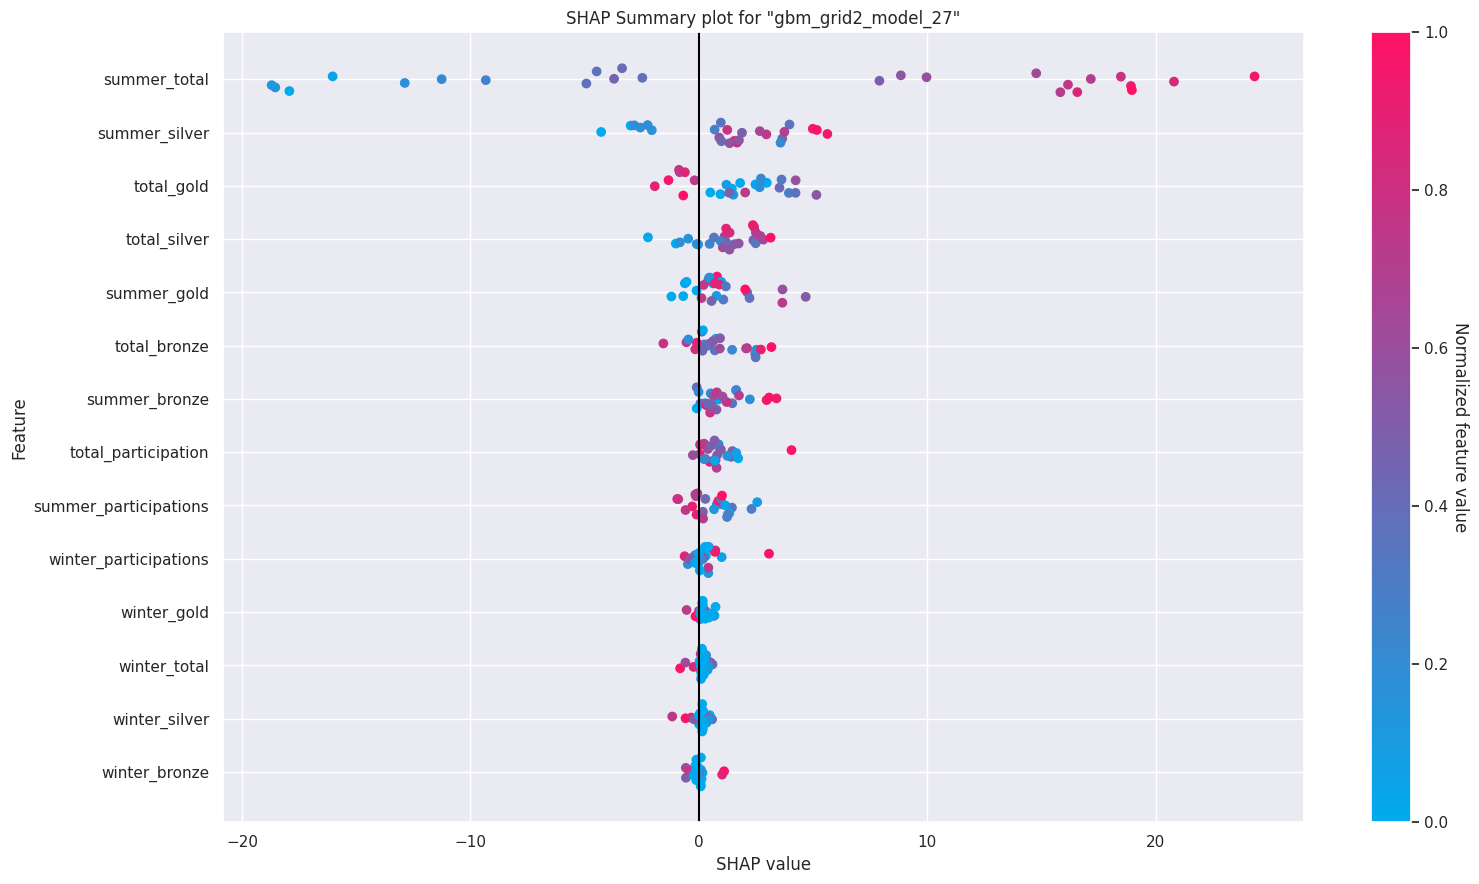

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

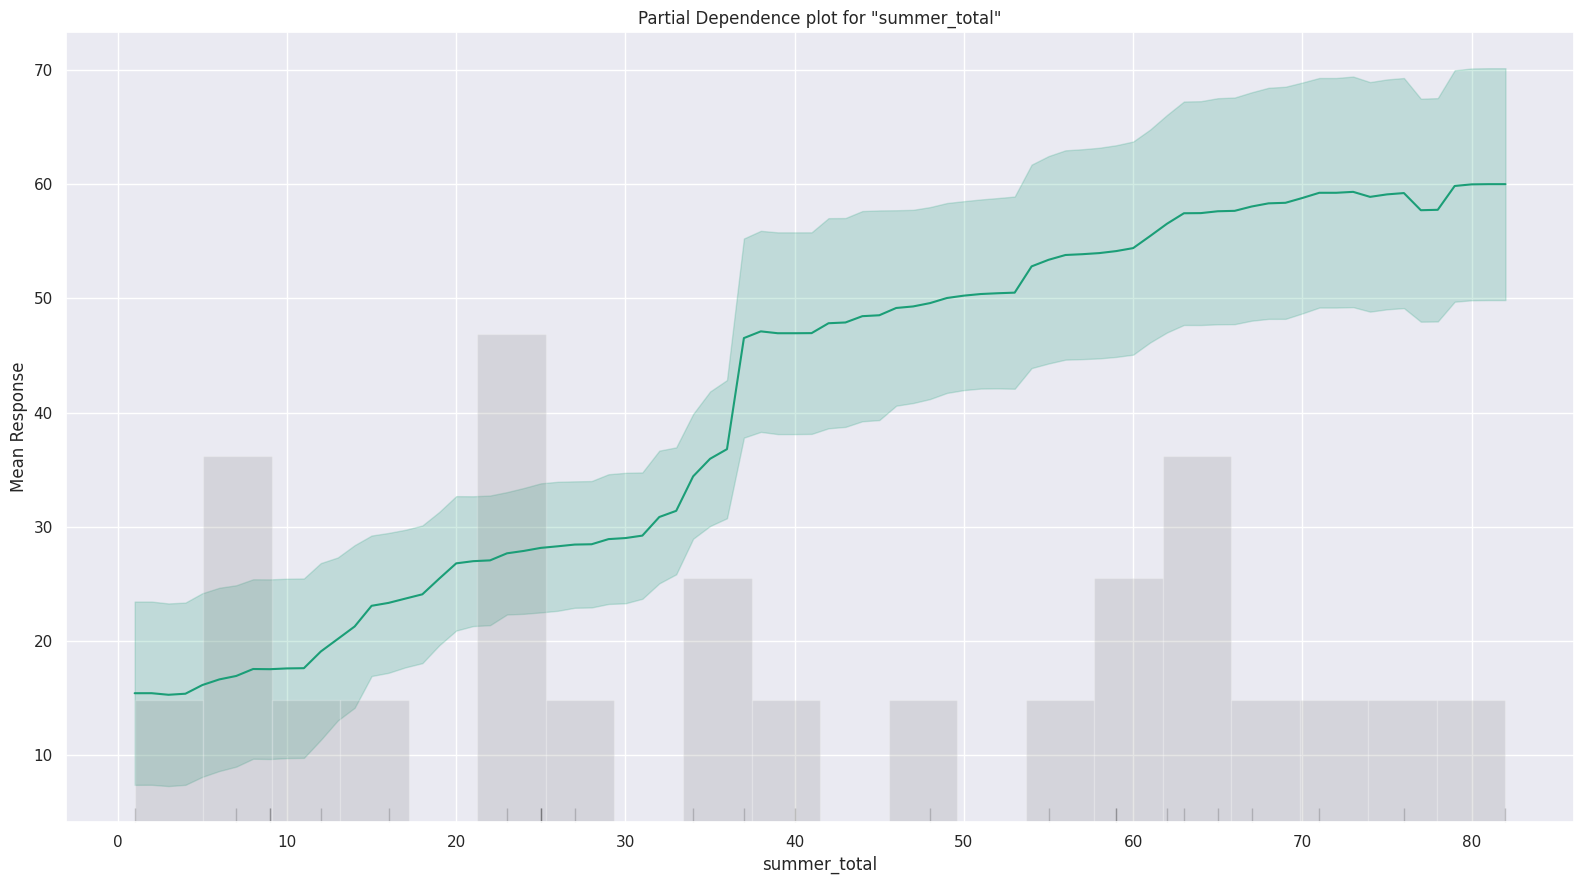

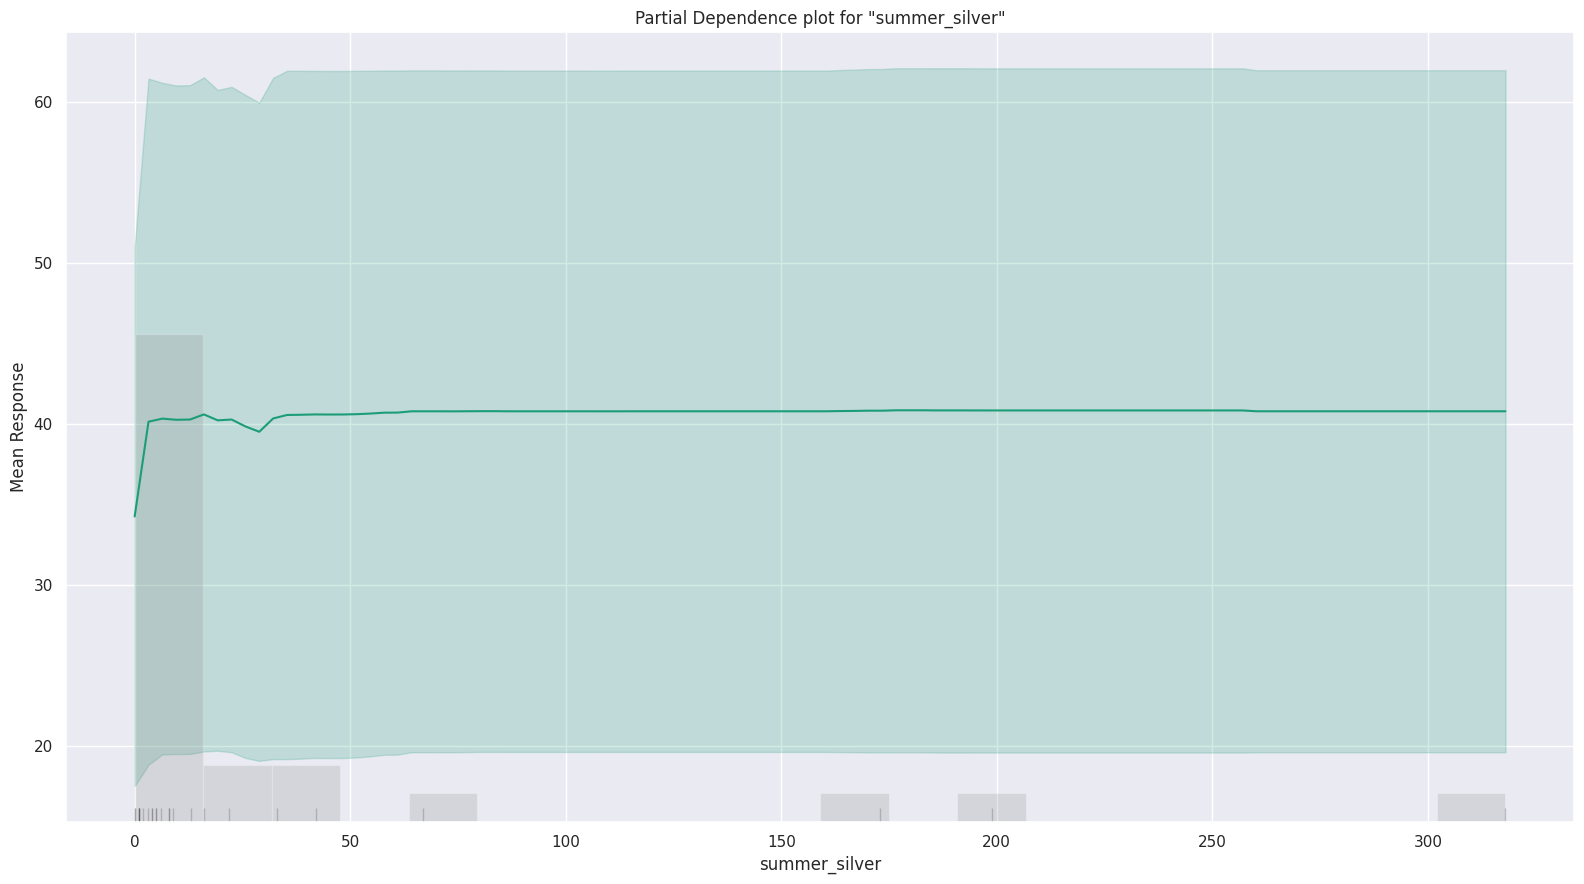

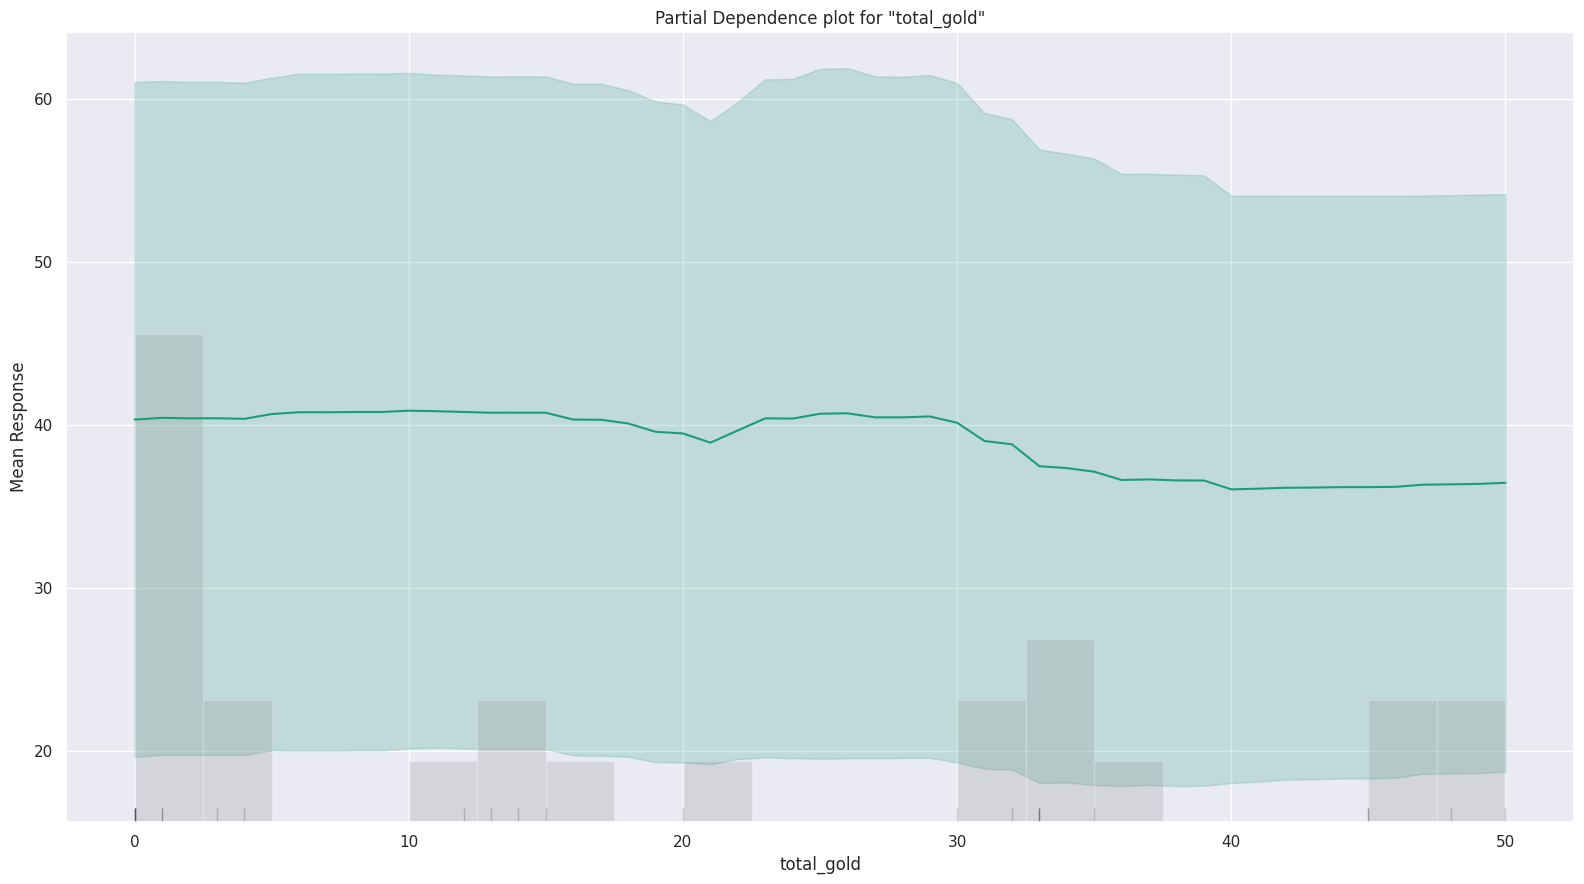

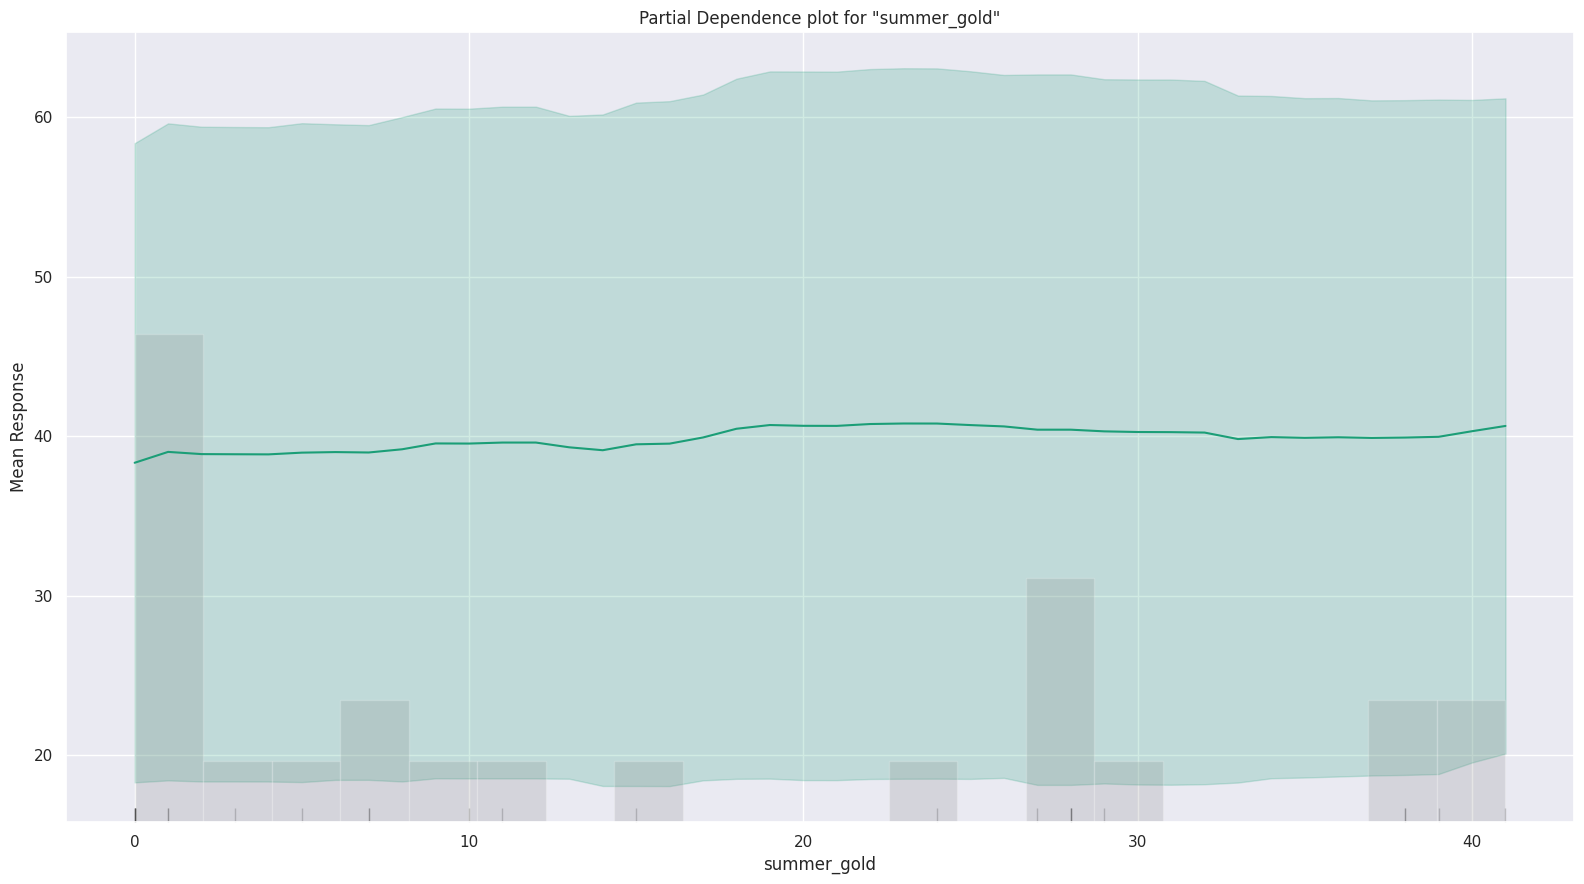

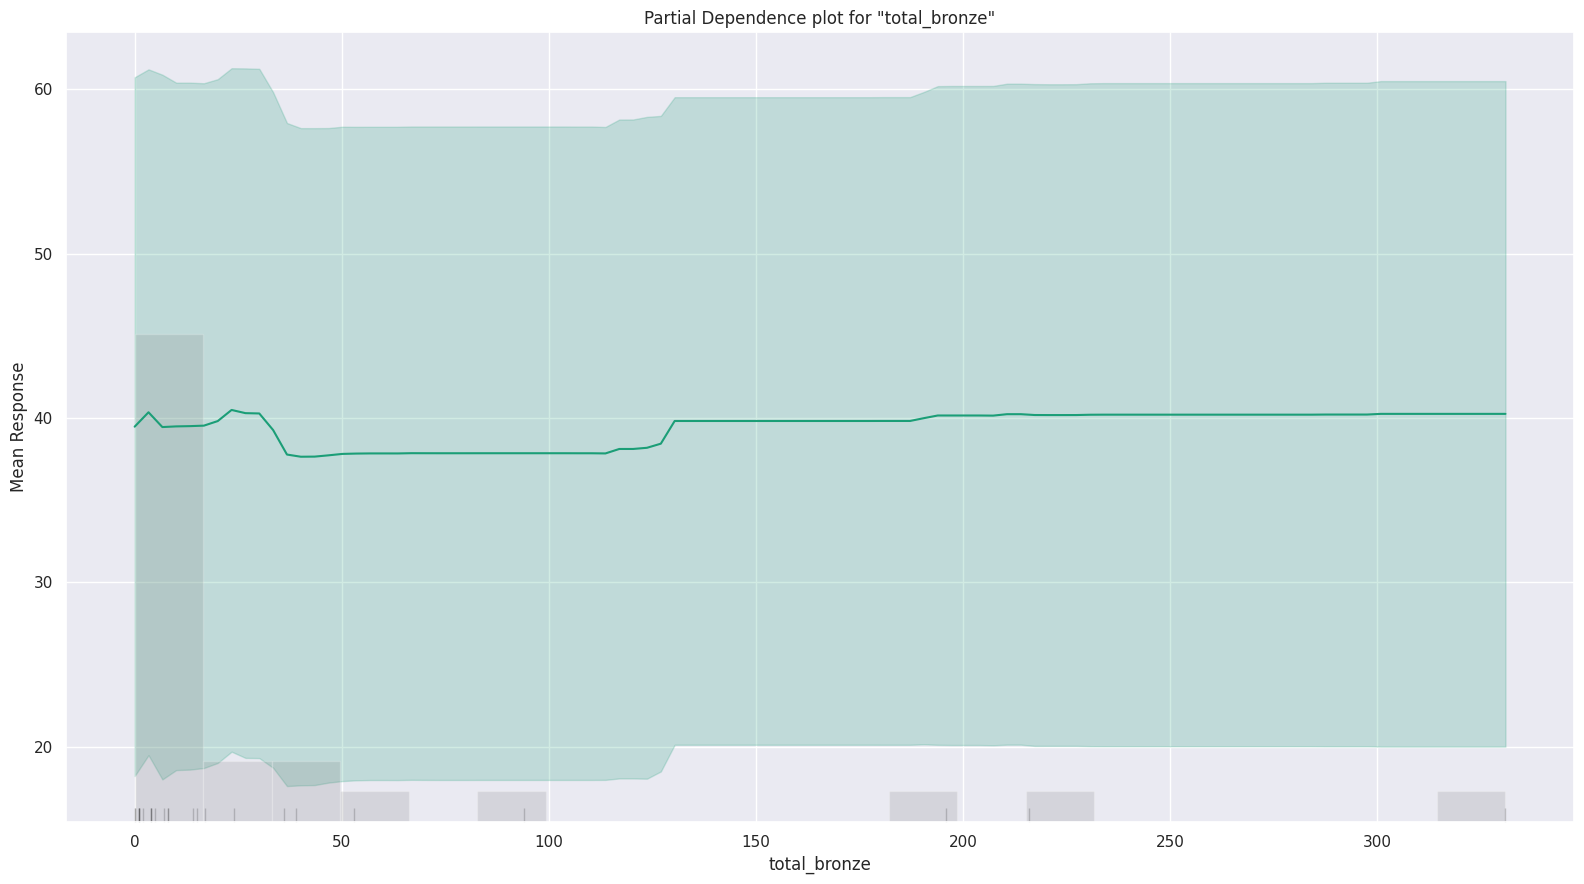

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

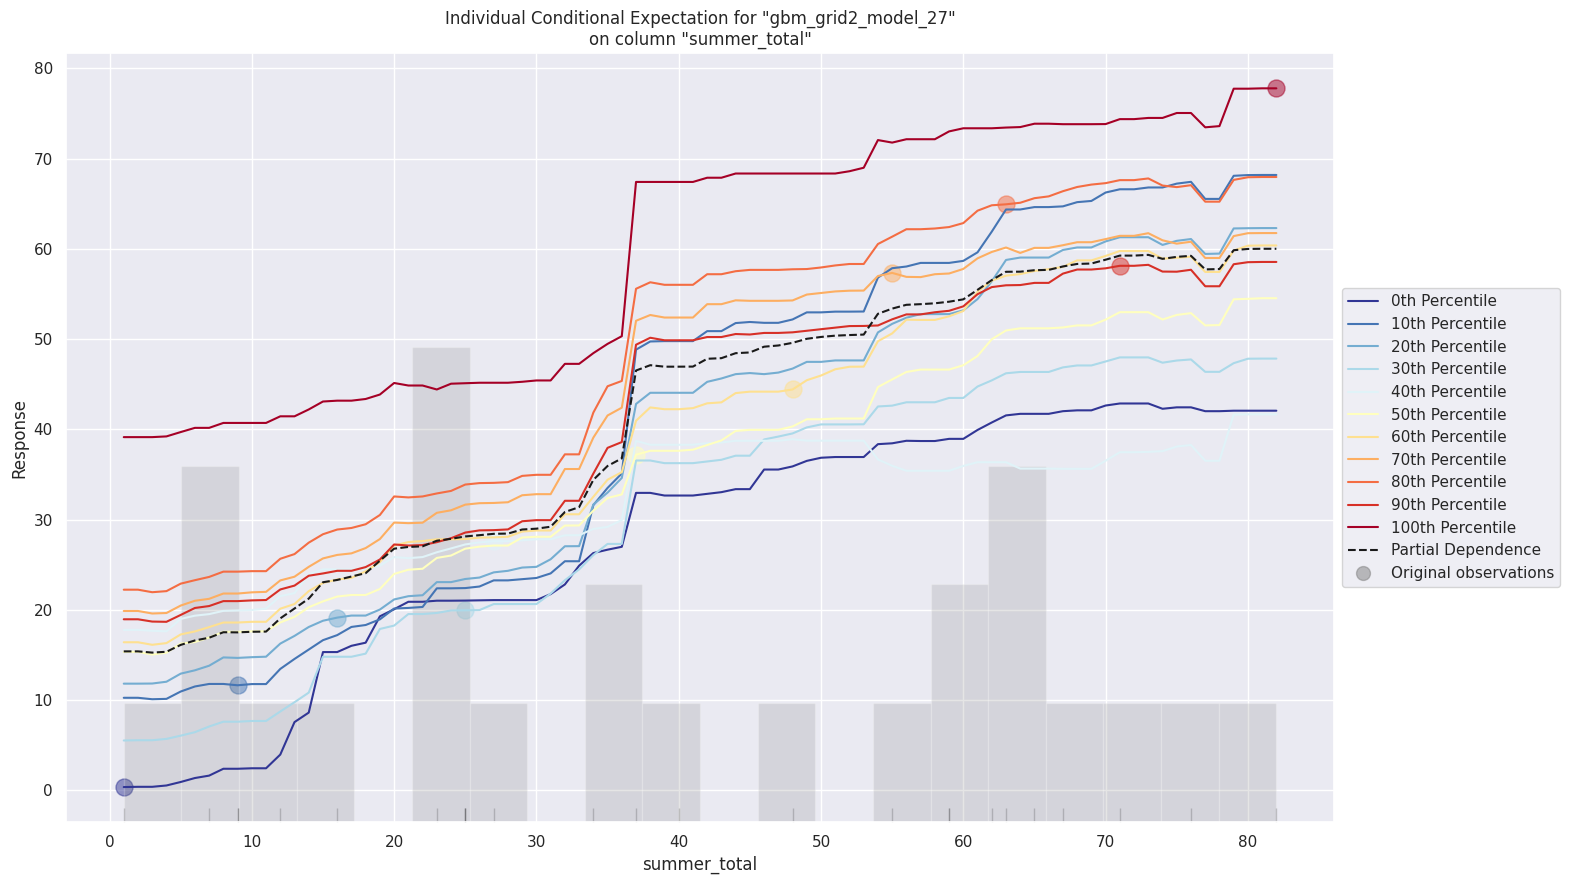

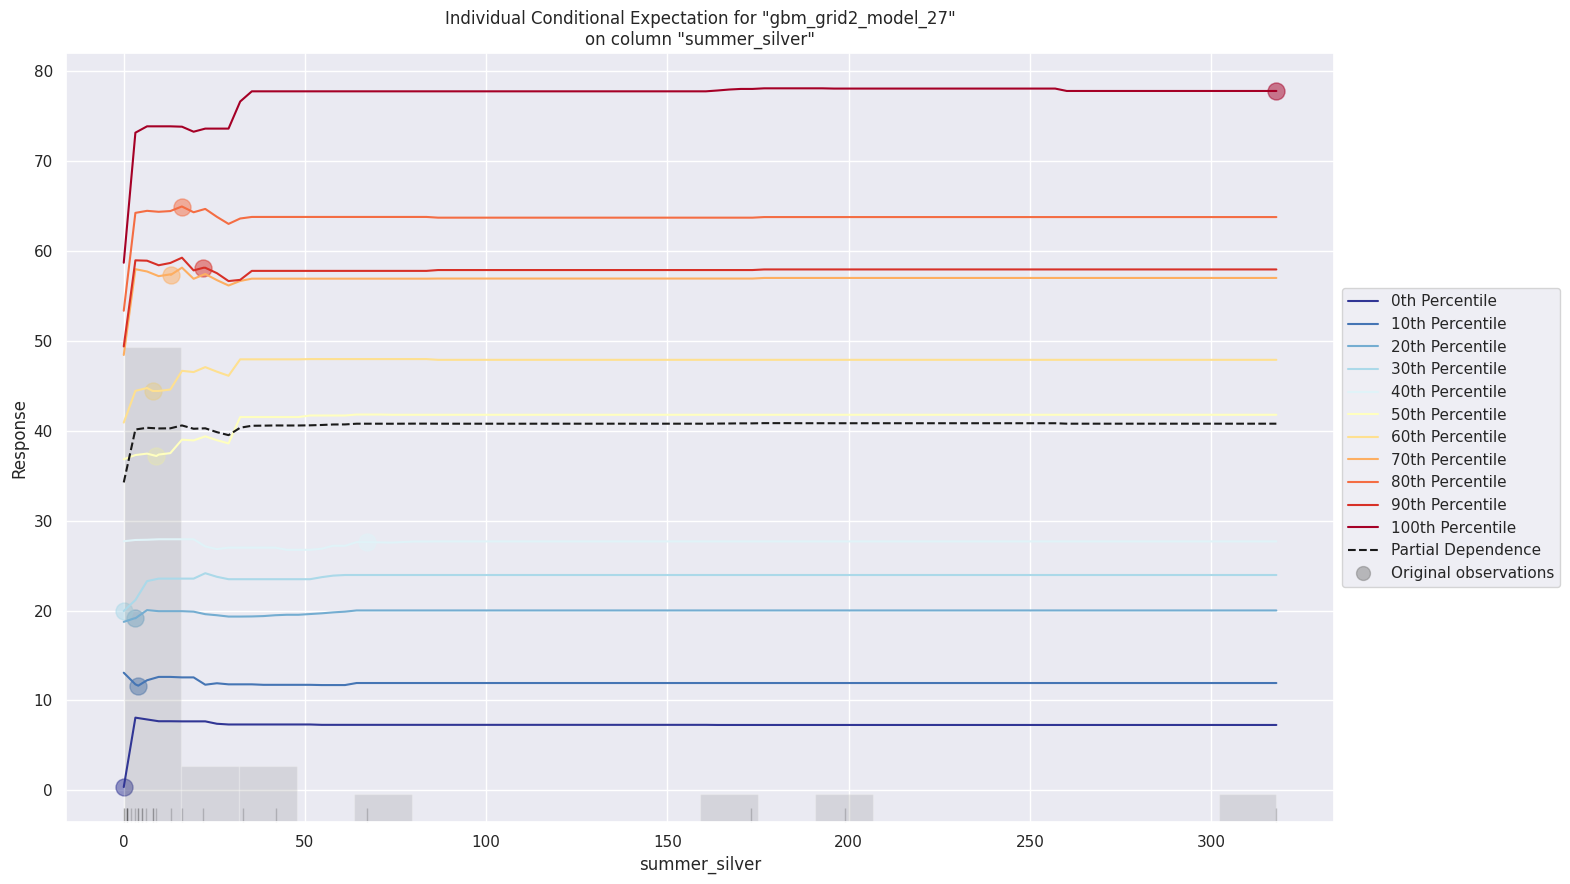

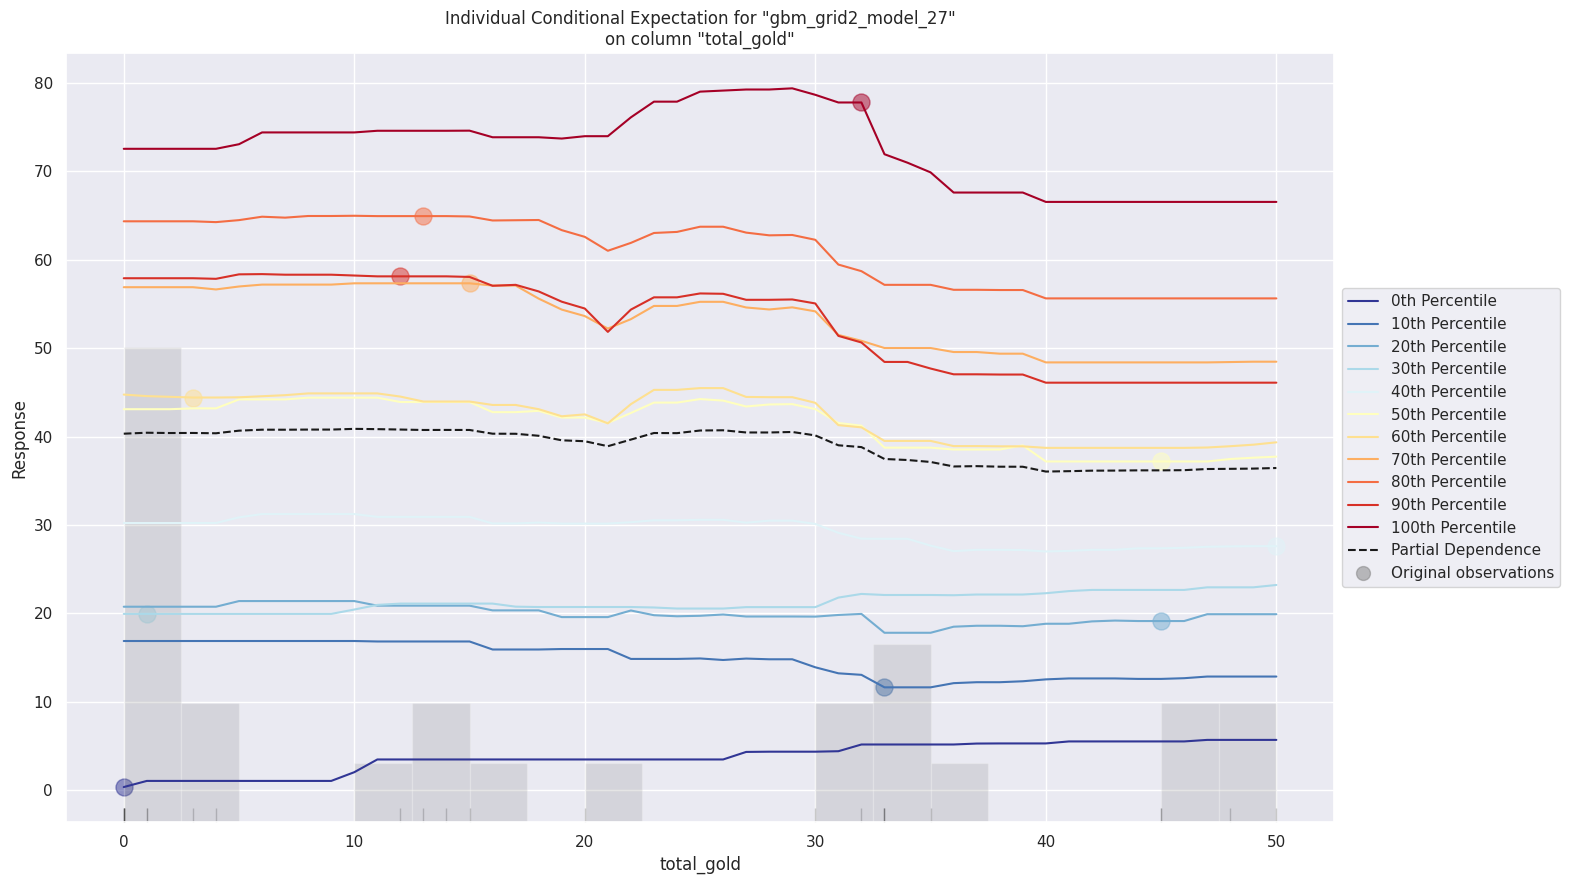

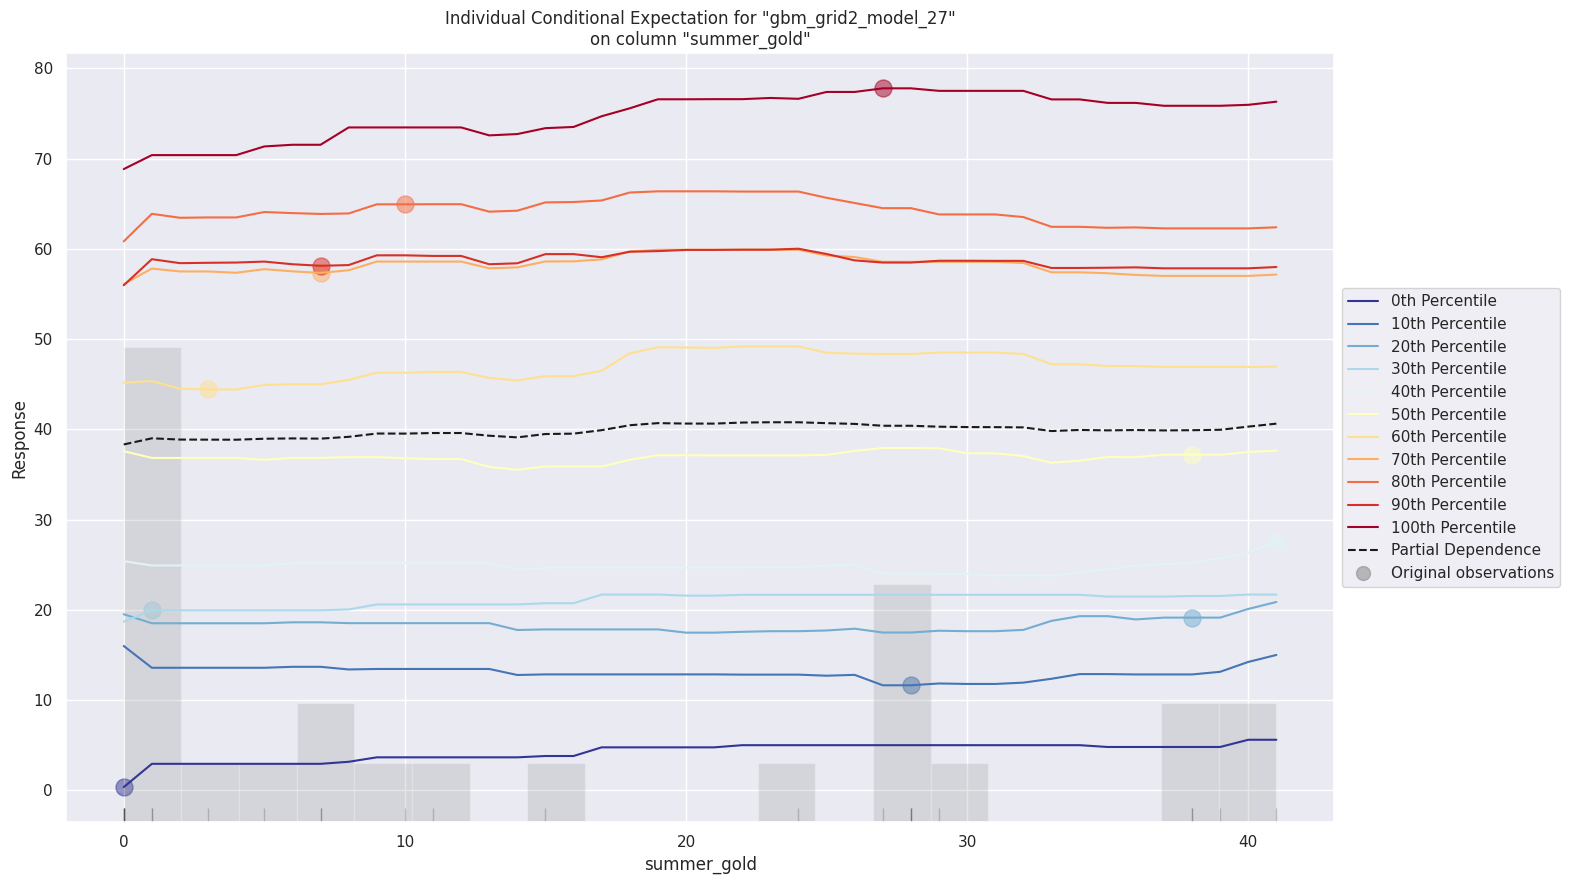

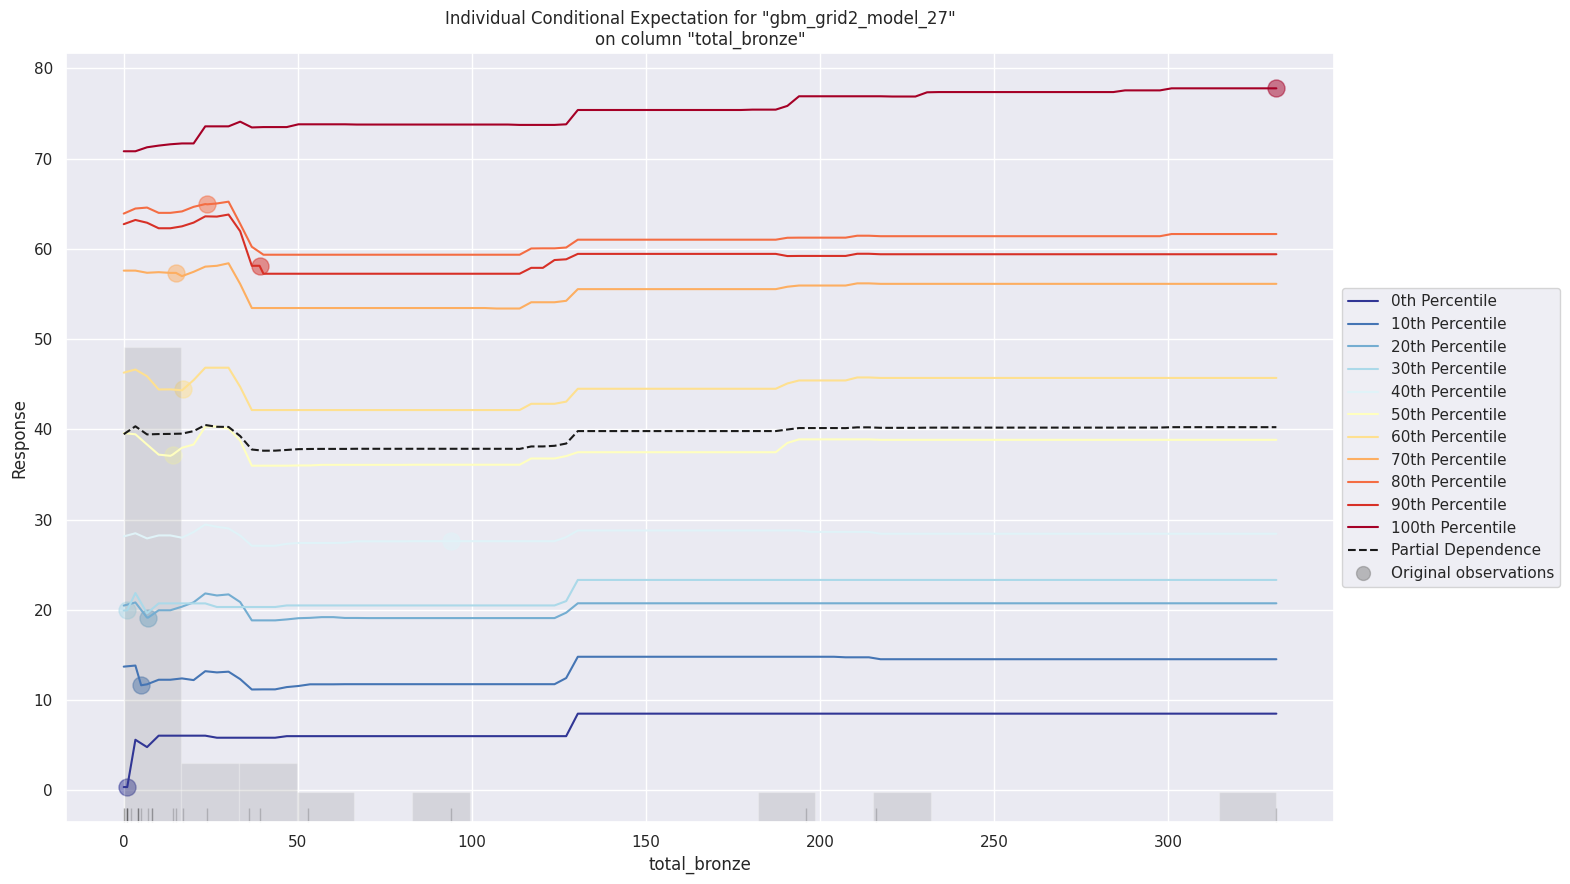

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [165]:
best_drf_model.explain(autoML[1])  # AutoML Explainability


# **Final Takeaways** 

It's important to keep in mind that the best model with the highest accuracy is not always the most interpretable model, and vice versa. AutoML may find a highly complex model that achieves very high accuracy, but this model may not be easily interpretable or explainable.

In addition, interpretability is subjective and depends on the specific requirements of the problem at hand. For some applications, interpretability may be crucial in order to build trust in the model and its predictions. In other cases, the focus may be solely on maximizing accuracy, and interpretability may not be as important.

Therefore, it's important to carefully consider the trade-offs between accuracy and interpretability when selecting a model for a specific task, and to assess the interpretability of the chosen model to ensure it meets the requirements of the application. It may be necessary to sacrifice some accuracy in order to achieve a more interpretable model, or to use additional techniques such as model-agnostic interpretability methods to understand the decision-making process of a complex model.

# **Learning outcomes**

It is a great summary of the key learnings from this project! It's true that data preparation is a critical step in the data science project lifecycle, as it can greatly impact the performance of the model. Hyperparameter tuning is also important and can lead to significant improvements in model accuracy, but it can be time-consuming.

It's also important to explore multiple models and select the best one for the task at hand, as different algorithms can perform better on different types of data and tasks.

Finally, model interpretation and explainability is an important aspect of machine learning, as it helps build trust and understanding in the model's predictions. Techniques such as SHAP, LIME, and PDP can help unpack the decision-making process of a model and provide insights into the factors that contribute to its predictions.

# **References**
https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html
https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d